# 자전거 대여 수요 예측

##  데이터 가져오기

In [1]:
import pandas as pd

train = pd.read_csv('./data/bike/train.csv')
test = pd.read_csv('./data/bike/test.csv')   # 테스트 데이터
submission = pd.read_csv('./data/bike/sampleSubmission.csv')

## 데이터 탐색

In [2]:
#데이터 구조 확인
train.shape

(10886, 12)

In [3]:
#데이터 확인
train.head(3)

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32

In [4]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
#테스트 데이터 확인
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [6]:
#답안 데이터 확인
submission.head()

datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0

## 데이터 탐색을 위한 시각화

In [7]:
# 문자열을 datetime 타입으로 변경
train['datetime'] = train.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간, 분, 초 생성
train['year'] = train.datetime.apply(lambda x : x.year)
train['month'] = train.datetime.apply(lambda x : x.month)
train['day'] = train.datetime.apply(lambda x : x.day)
train['hour'] = train.datetime.apply(lambda x: x.hour)
train['minute'] = train.datetime.apply(lambda x: x.minute)
train['second'] = train.datetime.apply(lambda x: x.second)
train['weekday'] = train.datetime.apply(lambda x : x.weekday())

train.head(3)

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81        0.0       3          13     16  2011      1    1     0   
1        80        0.0       8          32     40  2011      1    1     1   
2        80        0.0       5          27     32  2011      1    1     2   

   minute  second  weekday  
0       0       0        5  
1       0       0        5  
2       0       0        5

In [8]:
train['season'] = train['season'].map({1: 'Spring', 
                                       2: 'Summer', 
                                       3: 'Fall', 
                                       4: 'Winter' })
train['weather'] = train['weather'].map({1: 'Clear', 
                                         2: 'Mist, Few clouds', 
                                         3: 'Light Snow, Rain, Thunder', 
                                         4: 'Heavy Snow, Rain, Thunder'})

train.head(3)

datetime  season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00  Spring        0           0   Clear  9.84  14.395   
1 2011-01-01 01:00:00  Spring        0           0   Clear  9.02  13.635   
2 2011-01-01 02:00:00  Spring        0           0   Clear  9.02  13.635   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81        0.0       3          13     16  2011      1    1     0   
1        80        0.0       8          32     40  2011      1    1     1   
2        80        0.0       5          27     32  2011      1    1     2   

   minute  second  weekday  
0       0       0        5  
1       0       0        5  
2       0       0        5

In [9]:
%matplotlib inline

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import platform
from matplotlib import font_manager, rc

#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings(action='ignore')

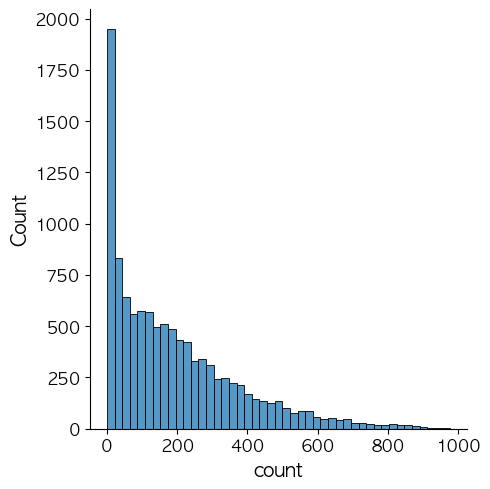

In [10]:
#타겟의 분포 확인
sns.displot(train['count']); # 분포도 출력

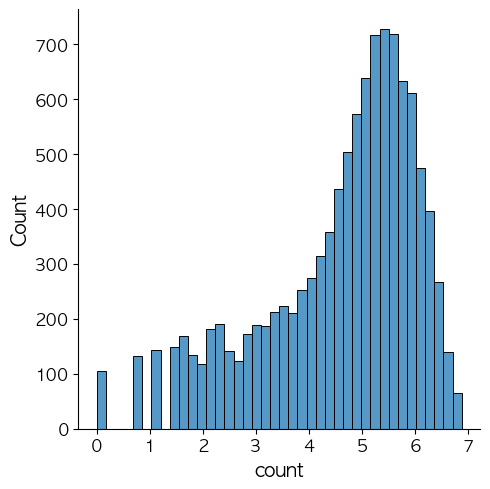

In [11]:
import numpy as np
#로그 변환 후 타깃 분포 확인
sns.displot(np.log(train['count']))

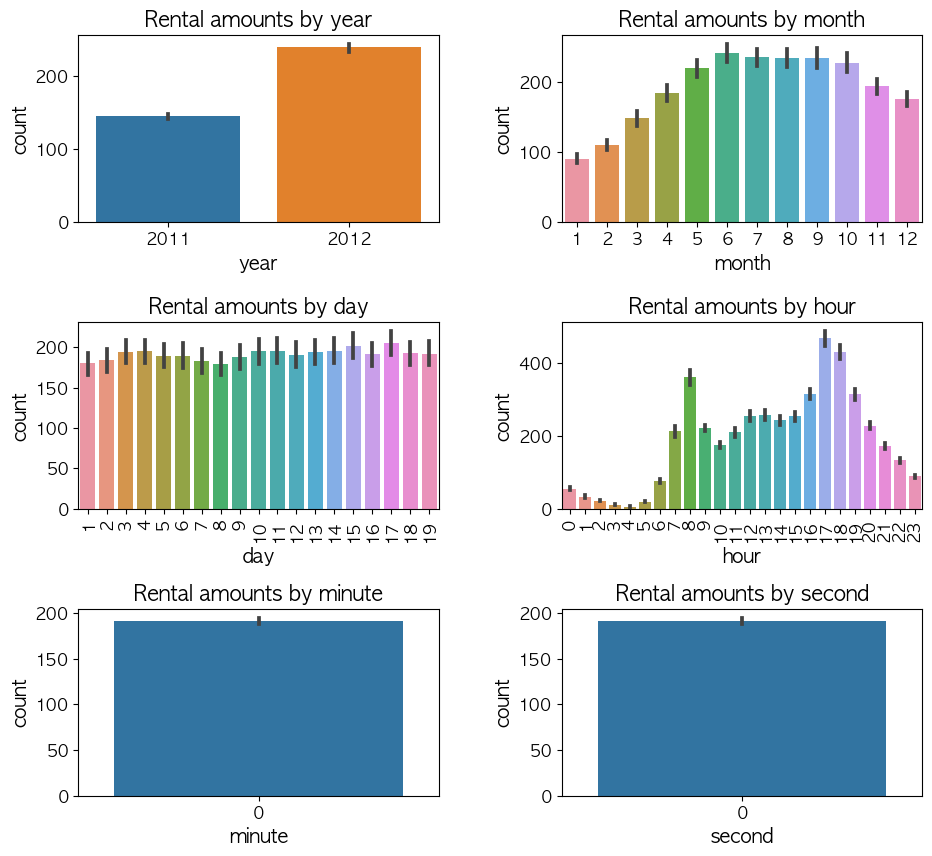

In [12]:
#날짜 및 시간에 따른 타깃 분포 확인
mpl.rc('font', size=14)       # 폰트 크기 설정
mpl.rc('axes', titlesize=15)  # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=3, ncols=2) # 3행 2열 Figure 생성 
plt.tight_layout()            # 그래프 사이에 여백 확보 
figure.set_size_inches(10, 9) # 전체 Figure 크기를 10x9인치로 설정 

#각 축에 서브플롯 할당
#각 축에 연도, 월, 일, 시간, 분, 초별 평균 대여 수량 막대 그래프 할당
sns.barplot(x='year', y='count', data=train, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2, 0])
sns.barplot(x='second', y='count', data=train, ax=axes[2, 1])

#서브플롯에 제목 달기
axes[0, 0].set(title='Rental amounts by year')
axes[0, 1].set(title='Rental amounts by month')
axes[1, 0].set(title='Rental amounts by day')
axes[1, 1].set(title='Rental amounts by hour')
axes[2, 0].set(title='Rental amounts by minute')
axes[2, 1].set(title='Rental amounts by second')

# 1행에 위치한 서브플롯들의 x축 라벨 90도 회전
axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

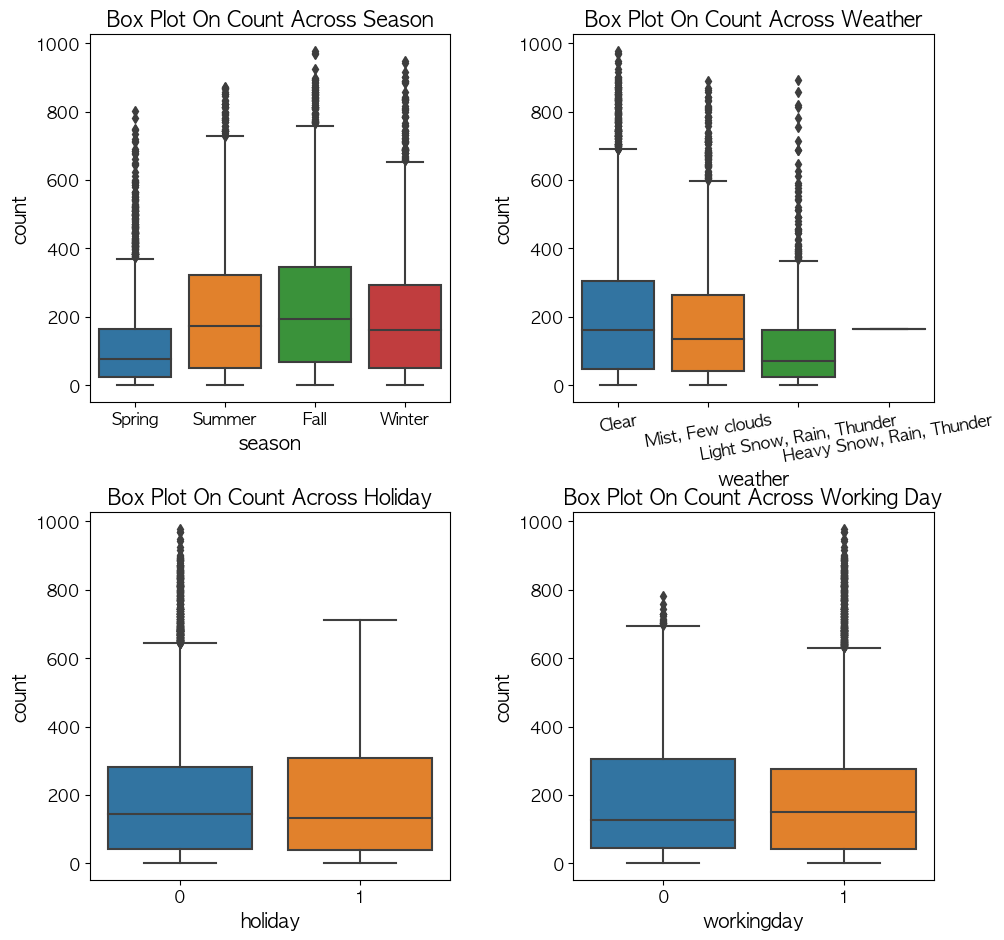

In [13]:
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(10, 10)

# 계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯
sns.boxplot(x='season', y='count', data=train, ax=axes[0, 0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0, 1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1, 0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1, 1])

axes[0, 0].set(title='Box Plot On Count Across Season')
axes[0, 1].set(title='Box Plot On Count Across Weather')
axes[1, 0].set(title='Box Plot On Count Across Holiday')
axes[1, 1].set(title='Box Plot On Count Across Working Day')

#x축 라벨 겹침 해결
axes[0, 1].tick_params('x', labelrotation=10) # 10도 회전

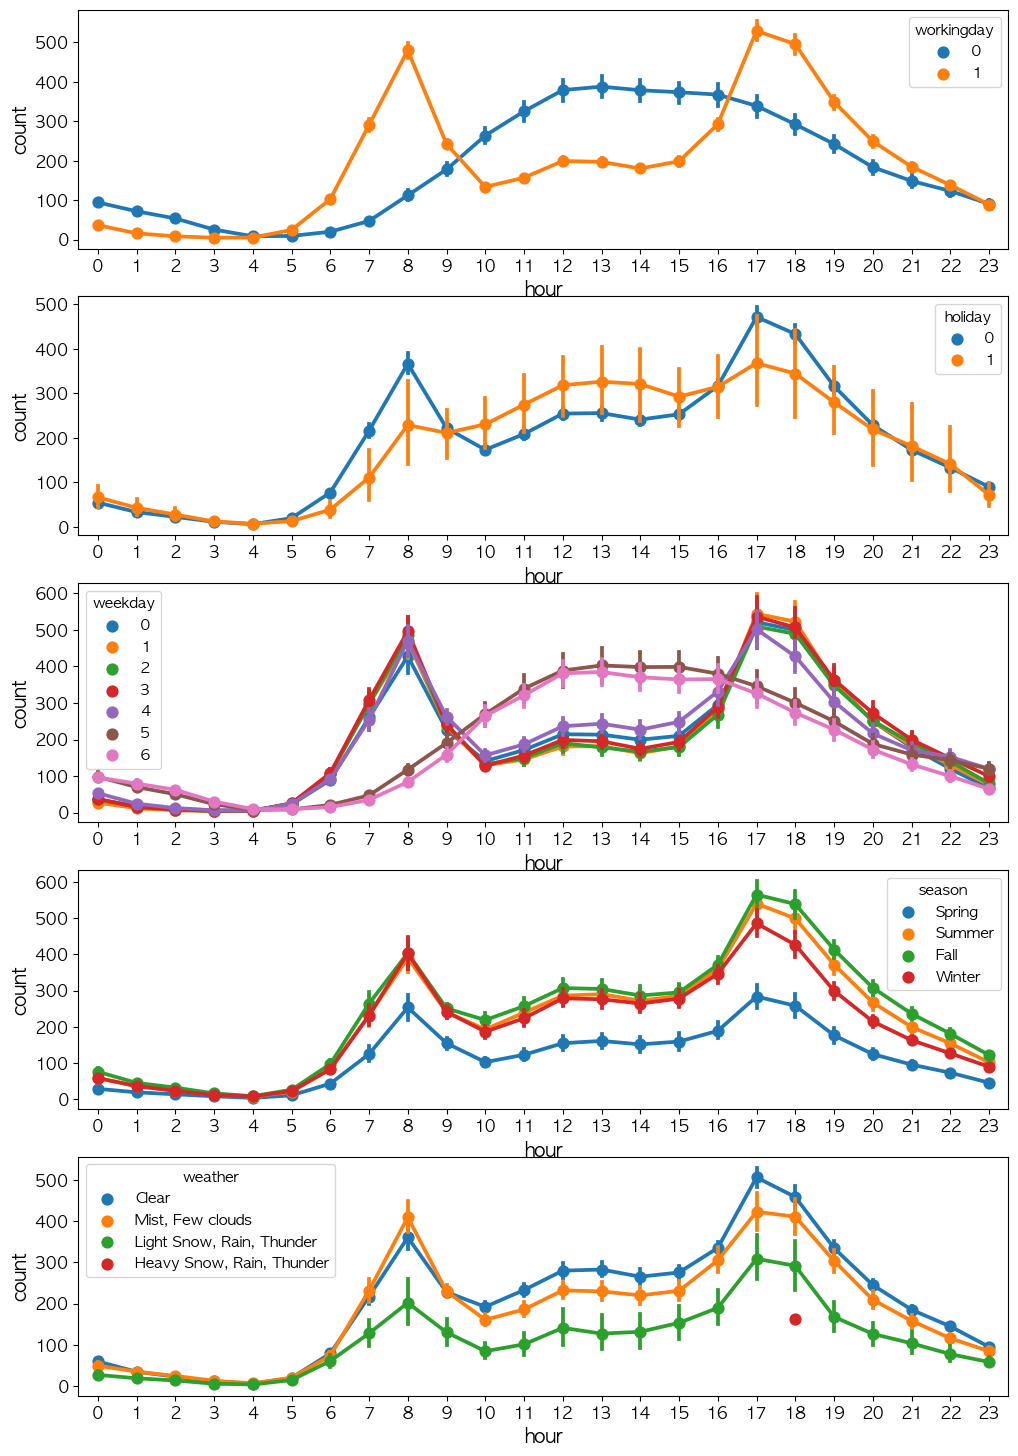

In [14]:
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5) # 5행 1열
figure.set_size_inches(12, 18)

# 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량 포인트플롯
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4]);

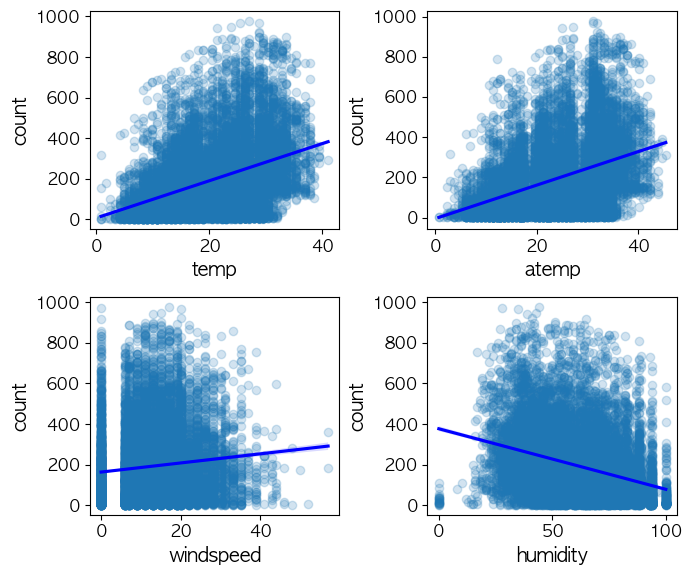

In [15]:
mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(7, 6)

# 온도, 체감 온도, 풍속, 습도 별 대여 수량 산점도 그래프
sns.regplot(x='temp', y='count', data=train, ax=axes[0, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'});

In [16]:
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

temp     atemp  humidity  windspeed     count
temp       1.000000  0.984948 -0.064949  -0.017852  0.394454
atemp      0.984948  1.000000 -0.043536  -0.057473  0.389784
humidity  -0.064949 -0.043536  1.000000  -0.318607 -0.317371
windspeed -0.017852 -0.057473 -0.318607   1.000000  0.101369
count      0.394454  0.389784 -0.317371   0.101369  1.000000

[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

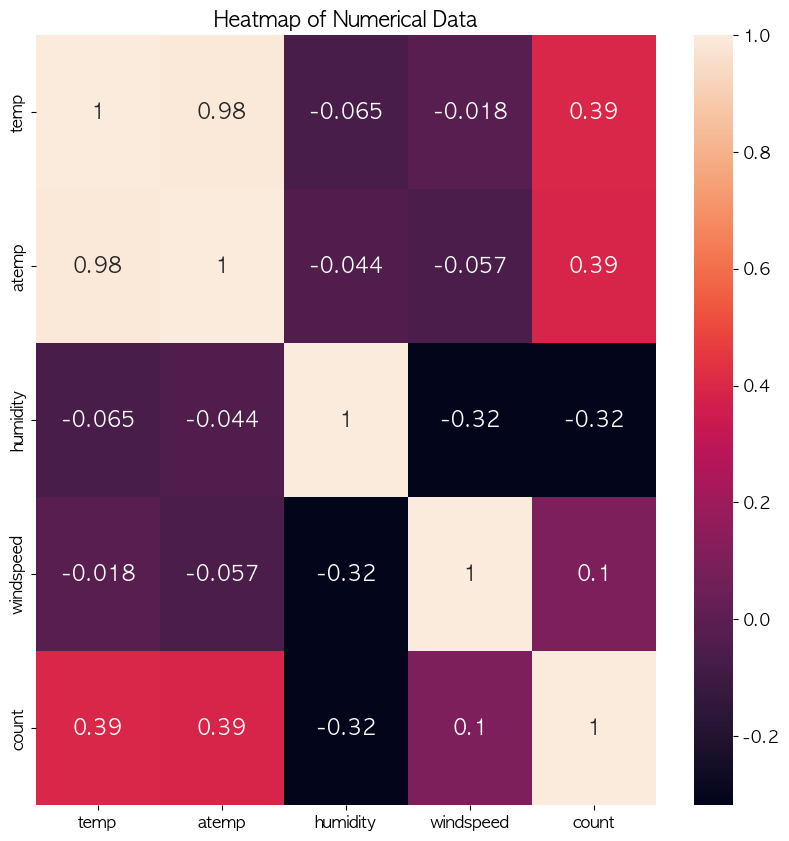

In [17]:
corrMat = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr() 
fig, ax= plt.subplots() 
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot=True) # 상관관계 히트맵 그리기
ax.set(title='Heatmap of Numerical Data')

## 기본 선형 회귀를 이용한 모델링

### 데이터 가져오기

In [18]:
import pandas as pd

train = pd.read_csv('./data/bike/train.csv')
test = pd.read_csv('./data/bike/test.csv')   # 테스트 데이터
submission = pd.read_csv('./data/bike/sampleSubmission.csv')

### 데이터 전처리 - 피처 엔지니어링

#### 이상치 제거

In [19]:
# 훈련 데이터에서 weather가 4가 아닌 데이터만 추출
train = train[train['weather'] != 4]

#### 데이터 병합

In [20]:
all_data_temp = pd.concat([train, test])
all_data_temp

datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
6488  2012-12-31 19:00:00       1        0           1        2  10.66   
6489  2012-12-31 20:00:00       1        0           1        2  10.66   
6490  2012-12-31 21:00:00       1        0           1        1  10.66   
6491  2012-12-31 22:00:00       1        0           1        1  10.66   
6492  2012-12-31 23:00:00       1        0           1        1  10.66   

       atemp  humidity  windspeed  casual  registered  count  
0     14.395        81     0.0000     3.0        13.0   16.0  
1     13.635        80     0.0000     8.0        32.0   40.0  
2     13.635        80     0.0000     5.0        27.0   32.0  
3     14.395        75     0.0000     3.0        10.0   13.0  
4     14.395        75     0.0000     0.0         1.0    1.0  
...      ...       ...        ...     ...         ...    ...  
6488  12.880        60    11.0014     NaN         NaN    NaN  
6489  12.880        60    11.0014     NaN         NaN    NaN  
6490  12.880        60    11.0014     NaN         NaN    NaN  
6491  13.635        56     8.9981     NaN         NaN    NaN  
6492  13.635        65     8.9981     NaN         NaN    NaN  

[17378 rows x 12 columns]

In [21]:
all_data = pd.concat([train, test], ignore_index=True)
all_data

datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
17373  2012-12-31 19:00:00       1        0           1        2  10.66   
17374  2012-12-31 20:00:00       1        0           1        2  10.66   
17375  2012-12-31 21:00:00       1        0           1        1  10.66   
17376  2012-12-31 22:00:00       1        0           1        1  10.66   
17377  2012-12-31 23:00:00       1        0           1        1  10.66   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000     3.0        13.0   16.0  
1      13.635        80     0.0000     8.0        32.0   40.0  
2      13.635        80     0.0000     5.0        27.0   32.0  
3      14.395        75     0.0000     3.0        10.0   13.0  
4      14.395        75     0.0000     0.0         1.0    1.0  
...       ...       ...        ...     ...         ...    ...  
17373  12.880        60    11.0014     NaN         NaN    NaN  
17374  12.880        60    11.0014     NaN         NaN    NaN  
17375  12.880        60    11.0014     NaN         NaN    NaN  
17376  13.635        56     8.9981     NaN         NaN    NaN  
17377  13.635        65     8.9981     NaN         NaN    NaN  

[17378 rows x 12 columns]

#### 피처 생성

In [22]:
from datetime import datetime

# 날짜 피처 생성
all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])
# 연도 피처 생성
all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])
# 시 피처 생성
all_data['hour'] = all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0])
# 요일 피처 생성
all_data["weekday"] = all_data['date'].apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())

#### 피처 제거

In [23]:
drop_features = ['casual', 'registered', 'datetime', 'date', 'windspeed']

all_data = all_data.drop(drop_features, axis=1)

### 모델 생성 및 훈련

#### 데이터 분할

In [24]:
# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

# 타깃값 count 제거
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

y = train['count'] # 타깃값

#### 평가지표를 위한 함수

In [25]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    # 지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

#### 모델 생성 및 훈련

In [26]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

log_y = np.log(y)  # 타깃값 로그 변환

linear_reg_model.fit(X_train, log_y) # 모델 훈련

LinearRegression()

### 모델 평가

In [27]:
preds = linear_reg_model.predict(X_train)
print (f'선형회귀의 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

선형회귀의 RMSLE 값 : 1.0205


### 답안 생성

In [28]:
linearreg_preds = linear_reg_model.predict(X_test) # 테스트 데이터로 예측

submission['count'] = np.exp(linearreg_preds)    # 지수변환
submission.to_csv('submission.csv', index=False) # 파일로 저장

## 성능 개선

### 릿지 모델

In [29]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()

# 하이퍼 파라미터 값 목록
ridge_params = {'max_iter':[3000], 'alpha':[0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}

# 교차 검증용 평가 함수(RMSLE 점수 계산)
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
# 그리드서치(with 릿지) 객체 생성
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model,   # 릿지 모델
                                      param_grid=ridge_params, # 값 목록
                                      scoring=rmsle_scorer,    # 평가지표
                                      cv=5)                    # 교차검증 분할 수
log_y = np.log(y) # 타깃값 로그변환
gridsearch_ridge_model.fit(X_train, log_y) # 훈련(그리드서치)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False, response_method='predict'))

In [30]:
print('최적 하이퍼파라미터 :', gridsearch_ridge_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 0.1, 'max_iter': 3000}


In [31]:
# 예측
preds = gridsearch_ridge_model.best_estimator_.predict(X_train) 

# 평가
print(f'릿지 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}') 

릿지 회귀 RMSLE 값 : 1.0205


### 라쏘 모델

In [32]:
from sklearn.linear_model import Lasso

# 모델 생성
lasso_model = Lasso()
# 하이퍼파라미터 값 목록
lasso_alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params = {'max_iter':[3000], 'alpha':lasso_alpha}
# 그리드서치(with 라쏘) 객체 생성
gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,
                                      param_grid=lasso_params,
                                      scoring=rmsle_scorer,
                                      cv=5)
# 그리드서치 수행
log_y = np.log(y)
gridsearch_lasso_model.fit(X_train, log_y)

print('최적 하이퍼파라미터 :', gridsearch_lasso_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 0.00125, 'max_iter': 3000}


In [33]:
# 예측
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)

# 평가
print(f'라쏘 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

라쏘 회귀 RMSLE 값 : 1.0205


### 부스팅 모델

In [35]:
%%time
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


# model 별로 평가 수행
rf_reg = RandomForestRegressor()
gbm_reg = GradientBoostingRegressor(n_estimators=500)
hgbm_reg = HistGradientBoostingRegressor(max_iter=500)

xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)
cgbm_reg = LGBMRegressor(iterations=500)
    
params = {'random_state':[42], 'n_estimators':[100, 300, 500]}
hgbm_params = {'random_state':[42], 'max_iter':[100, 300, 500]}
cgbm_params = {'random_state':[42], 'iterations':[100, 300, 500]}

log_y = np.log(y)
    
gridsearch_random_forest_model = GridSearchCV(estimator=rf_reg,
                                              param_grid=params,
                                              scoring=rmsle_scorer,
                                              cv=5)
gridsearch_random_forest_model.fit(X_train, log_y)
print('랜덤 포레스트 최적 하이퍼파라미터 :', gridsearch_random_forest_model.best_params_)

gridsearch_gbm_model = GridSearchCV(estimator=gbm_reg,
                                              param_grid=params,
                                              scoring=rmsle_scorer,
                                              cv=5)
gridsearch_gbm_model.fit(X_train, log_y)
print('그라디언트 부스팅 최적 하이퍼파라미터 :', gridsearch_gbm_model.best_params_)

gridsearch_hgbm_model = GridSearchCV(estimator=hgbm_reg,
                                              param_grid=hgbm_params,
                                              scoring=rmsle_scorer,
                                              cv=5)
gridsearch_hgbm_model.fit(X_train, log_y)
print('히스트 그라디언트 부스팅 최적 하이퍼파라미터 :', gridsearch_hgbm_model.best_params_)


gridsearch_xgb_model = GridSearchCV(estimator=xgb_reg,
                                              param_grid=params,
                                              scoring=rmsle_scorer,
                                              cv=5)
gridsearch_xgb_model.fit(X_train.values, log_y.values)
print('엑스트라 그라디언트 부스팅 최적 하이퍼파라미터 :', gridsearch_xgb_model.best_params_)

gridsearch_lgbm_model = GridSearchCV(estimator=lgbm_reg,
                                              param_grid=params,
                                              scoring=rmsle_scorer,
                                              cv=5)
gridsearch_lgbm_model.fit(X_train.values, log_y.values)
print('라이트 그라디언트 부스팅 최적 하이퍼파라미터 :', gridsearch_lgbm_model.best_params_)

gridsearch_cgbm_model = GridSearchCV(estimator=lgbm_reg,
                                              param_grid=cgbm_params,
                                              scoring=rmsle_scorer,
                                              cv=5)
gridsearch_cgbm_model.fit(X_train.values, log_y.values)
print("캣 그라디언트 부스팅 최적 하이퍼파라미터 :", gridsearch_cgbm_model.best_params_)

랜덤 포레스트 최적 하이퍼파라미터 : {'n_estimators': 500, 'random_state': 42}
그라디언트 부스팅 최적 하이퍼파라미터 : {'n_estimators': 500, 'random_state': 42}
히스트 그라디언트 부스팅 최적 하이퍼파라미터 : {'max_iter': 300, 'random_state': 42}
엑스트라 그라디언트 부스팅 최적 하이퍼파라미터 : {'n_estimators': 100, 'random_state': 42}
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 234
[LightGBM] [Info] Number of data points in the train set: 8708, number of used features: 10
[LightGBM] [Info] Start training from score 4.721909
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 239
[LightGBM] [Info] Number of data points in the train set: 8708, number of 

[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 234
[LightGBM] [Info] Number of data points in the train set: 8708, number of used features: 10
[LightGBM] [Info] Start training from score 4.450264
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 238
[LightGBM] [Info] Number of dat

In [37]:
# 예측
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)
# 평가
print(f'랜덤 포레스트 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

# 예측
preds = gridsearch_gbm_model.best_estimator_.predict(X_train)
# 평가
print(f'그라디언트 부스팅 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

# 예측
preds = gridsearch_hgbm_model.best_estimator_.predict(X_train)
# 평가
print(f'히스트 그라디언트 부스팅 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

# 예측
preds = gridsearch_xgb_model.best_estimator_.predict(X_train.values)
# 평가
print(f'엑스트라 그라디언트 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

# 예측
preds = gridsearch_lgbm_model.best_estimator_.predict(X_train.values)
# 평가
print(f'라이트 그라디언트 부스팅 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

# 예측
preds = gridsearch_cgbm_model.best_estimator_.predict(X_train.values)
# 평가
print(f'캣 그라디언트 부스팅 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

랜덤 포레스트 회귀 RMSLE 값 : 0.1112
그라디언트 부스팅 회귀 RMSLE 값 : 0.2779
히스트 그라디언트 부스팅 회귀 RMSLE 값 : 0.2325
엑스트라 그라디언트 회귀 RMSLE 값 : 0.1963
라이트 그라디언트 부스팅 회귀 RMSLE 값 : 0.2577
[LightGBM] [Warning] Unknown parameter: iterations
캣 그라디언트 부스팅 회귀 RMSLE 값 : 0.1871


### 가장 좋은 모델을 가지고 예측 및 답안 생성

#### 가장 좋은 모델을 가지고 결과 예측

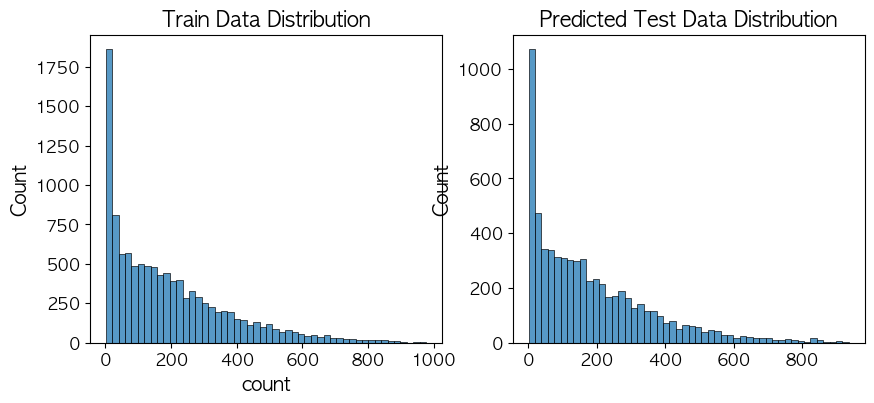

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)

figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10, 4)

sns.histplot(y, bins=50, ax=axes[0])
axes[0].set_title('Train Data Distribution')
sns.histplot(np.exp(randomforest_preds), bins=50, ax=axes[1])
axes[1].set_title('Predicted Test Data Distribution');

#### 답안 생성

In [39]:
submission['count'] = np.exp(randomforest_preds) # 지수변환
submission.to_csv('submission.csv', index=False)

# 범주형 데이터 이진 분류

## 데이터 탐색적 분석

In [40]:
#데이터 가져오기
import pandas as pd
# 데이터 경로
data_path = './data/cfec/'

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')
print(type(submission))

<class 'pandas.core.frame.DataFrame'>


In [41]:
#데이터 구조 확인
train.shape, test.shape

((300000, 24), (200000, 23))

In [42]:
#훈련 데이터 확인
train.head()

bin_0  bin_1  bin_2 bin_3 bin_4  nom_0      nom_1    nom_2    nom_3  \
id                                                                        
0       0      0      0     T     Y  Green   Triangle    Snake  Finland   
1       0      1      0     T     Y  Green  Trapezoid  Hamster   Russia   
2       0      0      0     F     Y   Blue  Trapezoid     Lion   Russia   
3       0      1      0     F     Y    Red  Trapezoid    Snake   Canada   
4       0      0      0     F     N    Red  Trapezoid     Lion   Canada   

       nom_4  ...      nom_9 ord_0        ord_1        ord_2 ord_3  ord_4  \
id            ...                                                           
0    Bassoon  ...  2f4cb3d51     2  Grandmaster         Cold     h      D   
1      Piano  ...  f83c56c21     1  Grandmaster          Hot     a      A   
2   Theremin  ...  ae6800dd0     1       Expert     Lava Hot     h      R   
3       Oboe  ...  8270f0d71     1  Grandmaster  Boiling Hot     i      D   
4       Oboe  ...  b164b72a7     1  Grandmaster     Freezing     a      R   

   ord_5 day month target  
id                         
0     kr   2     2      0  
1     bF   7     8      0  
2     Jc   7     2      0  
3     kW   2     1      1  
4     qP   7     8      0  

[5 rows x 24 columns]

In [43]:
submission.head()

target
id            
300000     0.5
300001     0.5
300002     0.5
300003     0.5
300004     0.5

In [44]:
#피처의 정보를 요약
def resumetable(df):
    print(f'데이터 세트 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values
    
    return summary

resumetable(train)

데이터 세트 형상: (300000, 24)


피처  데이터 타입  결측값 개수  고윳값 개수       첫 번째 값       두 번째 값     세 번째 값
0    bin_0   int64       0       2            0            0          0
1    bin_1   int64       0       2            0            1          0
2    bin_2   int64       0       2            0            0          0
3    bin_3  object       0       2            T            T          F
4    bin_4  object       0       2            Y            Y          Y
5    nom_0  object       0       3        Green        Green       Blue
6    nom_1  object       0       6     Triangle    Trapezoid  Trapezoid
7    nom_2  object       0       6        Snake      Hamster       Lion
8    nom_3  object       0       6      Finland       Russia     Russia
9    nom_4  object       0       4      Bassoon        Piano   Theremin
10   nom_5  object       0     222    50f116bcf    b3b4d25d0  3263bdce5
11   nom_6  object       0     522    3ac1b8814    fbcb50fc1  0922e3cb8
12   nom_7  object       0    1220    68f6ad3e9    3b6dd5612  a6a36f527
13   nom_8  object       0    2215    c389000ab    4cd920251  de9c9f684
14   nom_9  object       0   11981    2f4cb3d51    f83c56c21  ae6800dd0
15   ord_0   int64       0       3            2            1          1
16   ord_1  object       0       5  Grandmaster  Grandmaster     Expert
17   ord_2  object       0       6         Cold          Hot   Lava Hot
18   ord_3  object       0      15            h            a          h
19   ord_4  object       0      26            D            A          R
20   ord_5  object       0     192           kr           bF         Jc
21     day   int64       0       7            2            7          7
22   month   int64       0      12            2            8          2
23  target   int64       0       2            0            0          0

In [45]:
#고유값 확인
for i in range(3):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값: {train[feature].unique()}')

ord_0 고윳값: [2 1 3]
ord_1 고윳값: ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고윳값: ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [46]:
for i in range(3, 6):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값: {train[feature].unique()}')

ord_3 고윳값: ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 고윳값: ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 고윳값: ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'
 'Kf' 'ck' 'mb' '

In [47]:
print('day 고윳값:', train['day'].unique())
print('month 고윳값:', train['month'].unique())
print('target 고윳값:', train['target'].unique())

day 고윳값: [2 7 5 4 3 1 6]
month 고윳값: [ 2  8  1  4 10  3  7  9 12 11  5  6]
target 고윳값: [0 1]


## 시각화를 이용한 데이터 탐색

In [48]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

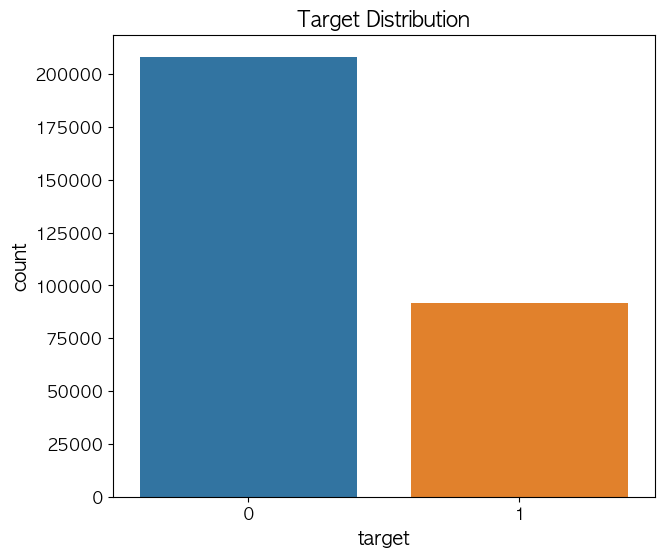

In [49]:
#타겟 분포 확인
mpl.rc('font', size=15) # 폰트 크기 설정
plt.figure(figsize=(7, 6)) # Figure 크기 설정

# 타깃값 분포 카운트플롯
ax = sns.countplot(x='target', data=train)
ax.set(title='Target Distribution');

In [50]:
#텍스트 출력 위치를 설정하기 위해 현재 그래프의 정보 확인
rectangle = ax.patches[0] # 첫 번째 Rectangle 객체
print('사각형 높이:', rectangle.get_height())
print('사각형 너비:', rectangle.get_width())
print('사각형 왼쪽 테두리의 x축 위치:', rectangle.get_x())

사각형 높이: 208236.0
사각형 너비: 0.8
사각형 왼쪽 테두리의 x축 위치: -0.4


In [51]:
#텍스트 출력 위치 확인
print('텍스트 위치의 x좌표:', rectangle.get_x() + rectangle.get_width()/2.0)
print('텍스트 위치의 y좌표:', rectangle.get_height() + len(train)*0.001)

텍스트 위치의 x좌표: 0.0
텍스트 위치의 y좌표: 208536.0


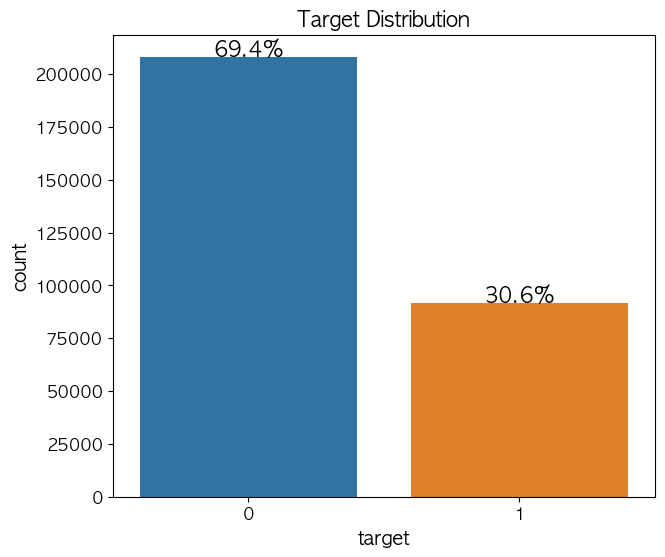

In [52]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()     # 도형 높이(데이터 개수)
        width = patch.get_width()       # 도형 너비
        left_coord = patch.get_x()      # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율
        
        # (x, y) 좌표에 텍스트 입력 
        ax.text(x=left_coord + width/2.0,    # x축 위치
                y=height + total_size*0.001, # y축 위치
                s=f'{percent:1.1f}%',        # 입력 텍스트
                ha='center')                 # 가운데 정렬

plt.figure(figsize=(7, 6))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train)) # 비율 표시
ax.set_title('Target Distribution');


### 타켓별 이진 분류 변수 분포 확인

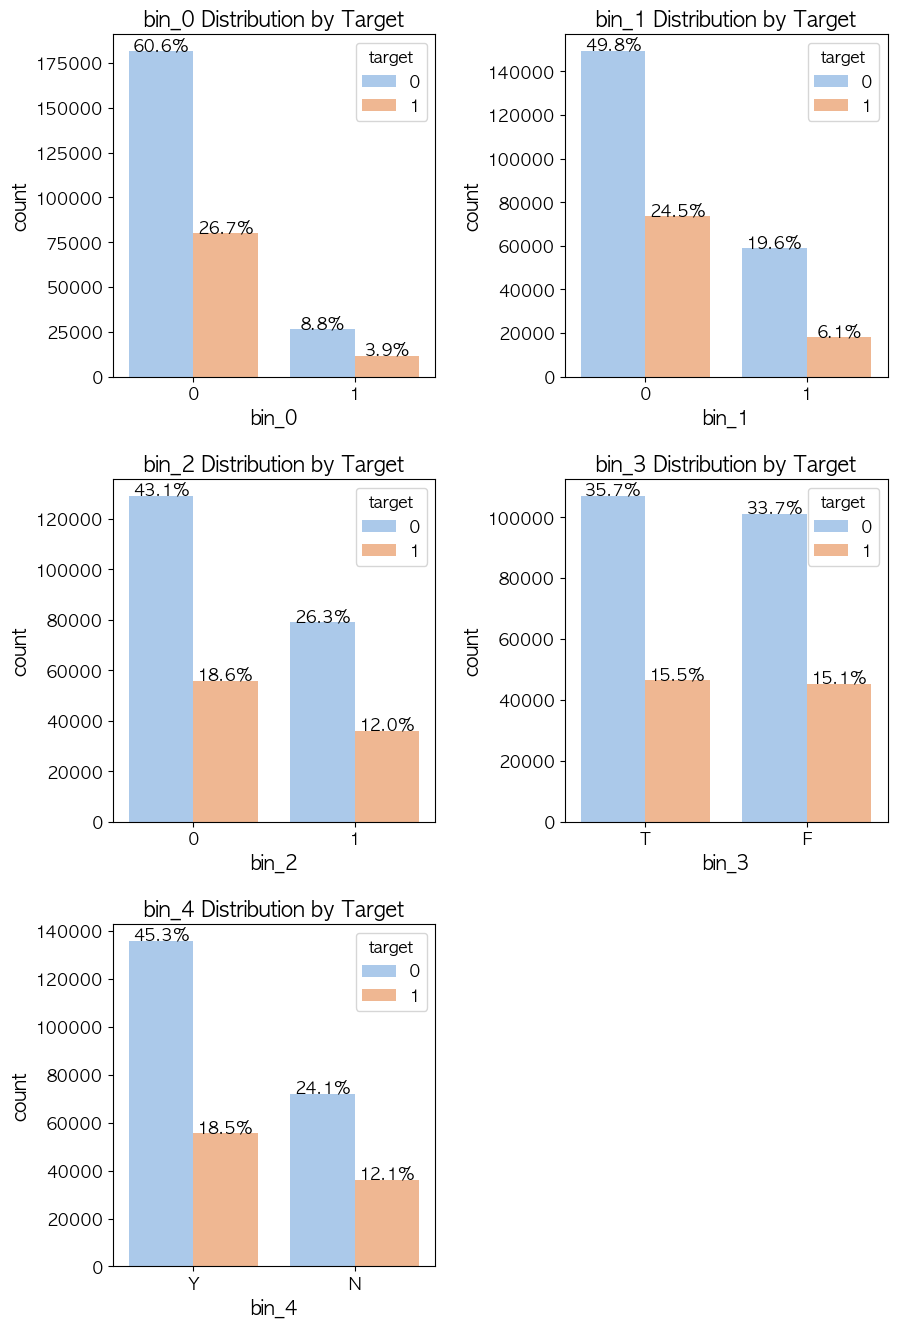

In [53]:
import matplotlib.gridspec as gridspec # 여러 그래프를 격자 형태로 배치

# 3행 2열 틀(Figure) 준비
mpl.rc('font', size=12)
grid = gridspec.GridSpec(3, 2) # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize=(10, 16))   # 전체 Figure 크기 설정
plt.subplots_adjust(wspace=0.4, hspace=0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기
bin_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4'] # 피처 목록

for idx, feature in enumerate(bin_features): 
    ax = plt.subplot(grid[idx]) 
    
    # ax축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature,
                  data=train,
                  hue='target',
                  palette='pastel', # 그래프 색상 설정
                  ax=ax)
    
    ax.set_title(f'{feature} Distribution by Target') # 그래프 제목 설정
    write_percent(ax, len(train))                     # 비율 표시

### 명목형 변수의 분포 확인

In [54]:
#교차 분석표 이용
pd.crosstab(train['nom_0'], train['target'])

target      0      1
nom_0               
Blue    72914  23252
Green   85682  41659
Red     49640  26853

In [55]:
# 정규화 후 비율을 백분율로 표현
crosstab = pd.crosstab(train['nom_0'], train['target'], normalize='index')*100
crosstab

target          0          1
nom_0                       
Blue    75.820976  24.179024
Green   67.285478  32.714522
Red     64.894827  35.105173

In [56]:
crosstab = crosstab.reset_index() # 인덱스 재설정
crosstab

target  nom_0          0          1
0        Blue  75.820976  24.179024
1       Green  67.285478  32.714522
2         Red  64.894827  35.105173

In [57]:
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index')*100
    crosstab = crosstab.reset_index()
    return crosstab

In [58]:
crosstab = get_crosstab(train, 'nom_0')
crosstab

target  nom_0          0          1
0        Blue  75.820976  24.179024
1       Green  67.285478  32.714522
2         Red  64.894827  35.105173

In [59]:
crosstab[1]

0    24.179024
1    32.714522
2    35.105173
Name: 1, dtype: float64

In [60]:
#교차 분석표를 이용한 포인트 플롯 출력

#포인트 플롯 생성 함수
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx() # x축은 공유하고 y축은 공유하지 않는 새로운 축 생성
    # 새로운 축에 포인트플롯 그리기
    ax2 = sns.pointplot(x=feature, y=1, data=crosstab,
                        order=crosstab[feature].values, # 포인트플롯 순서
                        color='black')
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1) # y축 범위 설정
    ax2.set_ylabel('Target 1 Ratio(%)')

In [61]:
#피처 분포도 및 피처별 타깃값 1의 비율 포인트플롯 생성 함수
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, 
                                  size=(15, 20)):
    plt.figure(figsize=size)  # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace=0.45, hspace=0.3) # 서브플롯 좌우/상하 여백 설정
    
    for idx, feature in enumerate(features): 
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature) # 교차분석표 생성

        # ax축에 타깃값 분포 카운트플롯 그리기
        sns.countplot(x=feature, data=df,
                      order=crosstab[feature].values,
                      color='skyblue',
                      ax=ax)

        write_percent(ax, len(df)) # 비율 표시
       
        plot_pointplot(ax, feature, crosstab) # 포인트플롯 그리기
        
        ax.set_title(f'{feature} Distribution') # 그래프 제목 설정

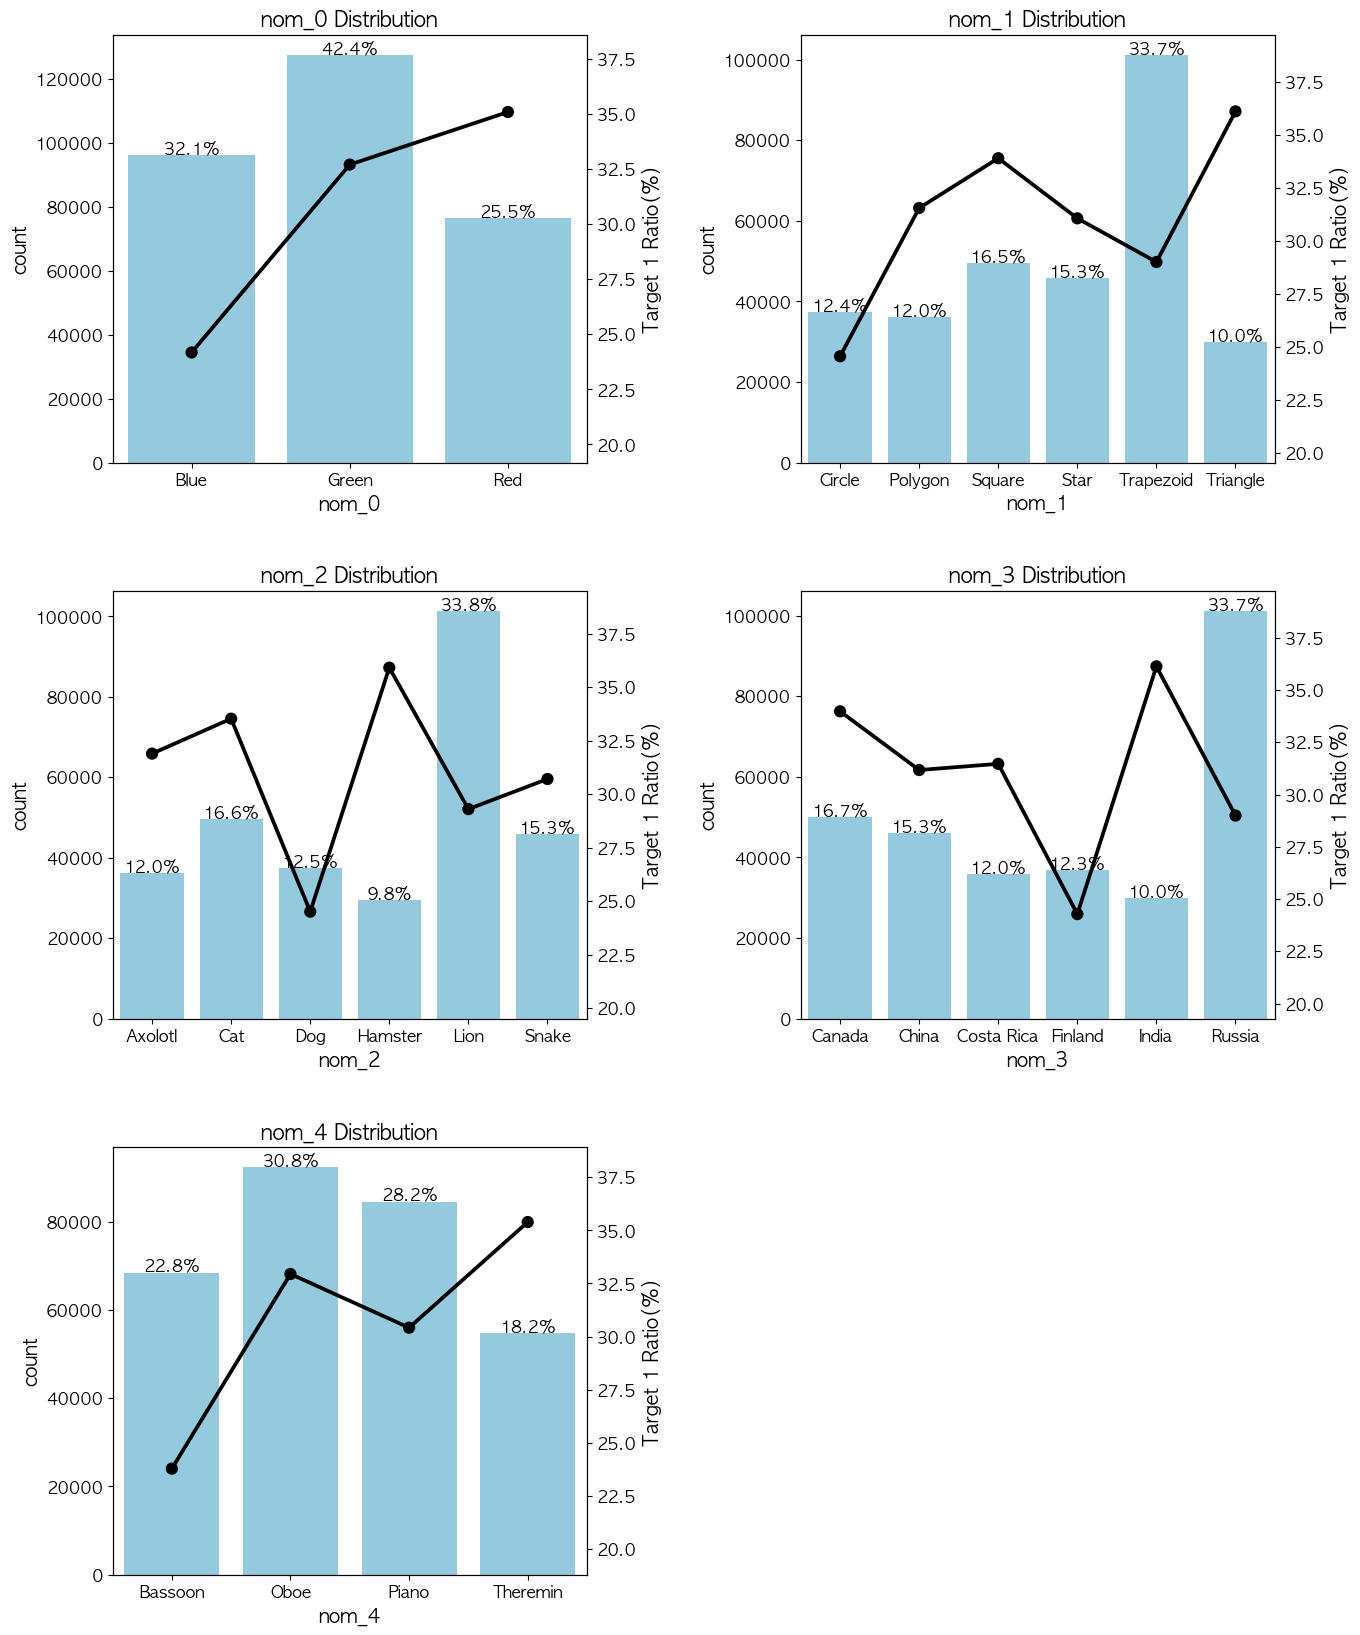

In [62]:
nom_features = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4'] # 명목형 피처
plot_cat_dist_with_true_ratio(train, nom_features, num_rows=3, num_cols=2)

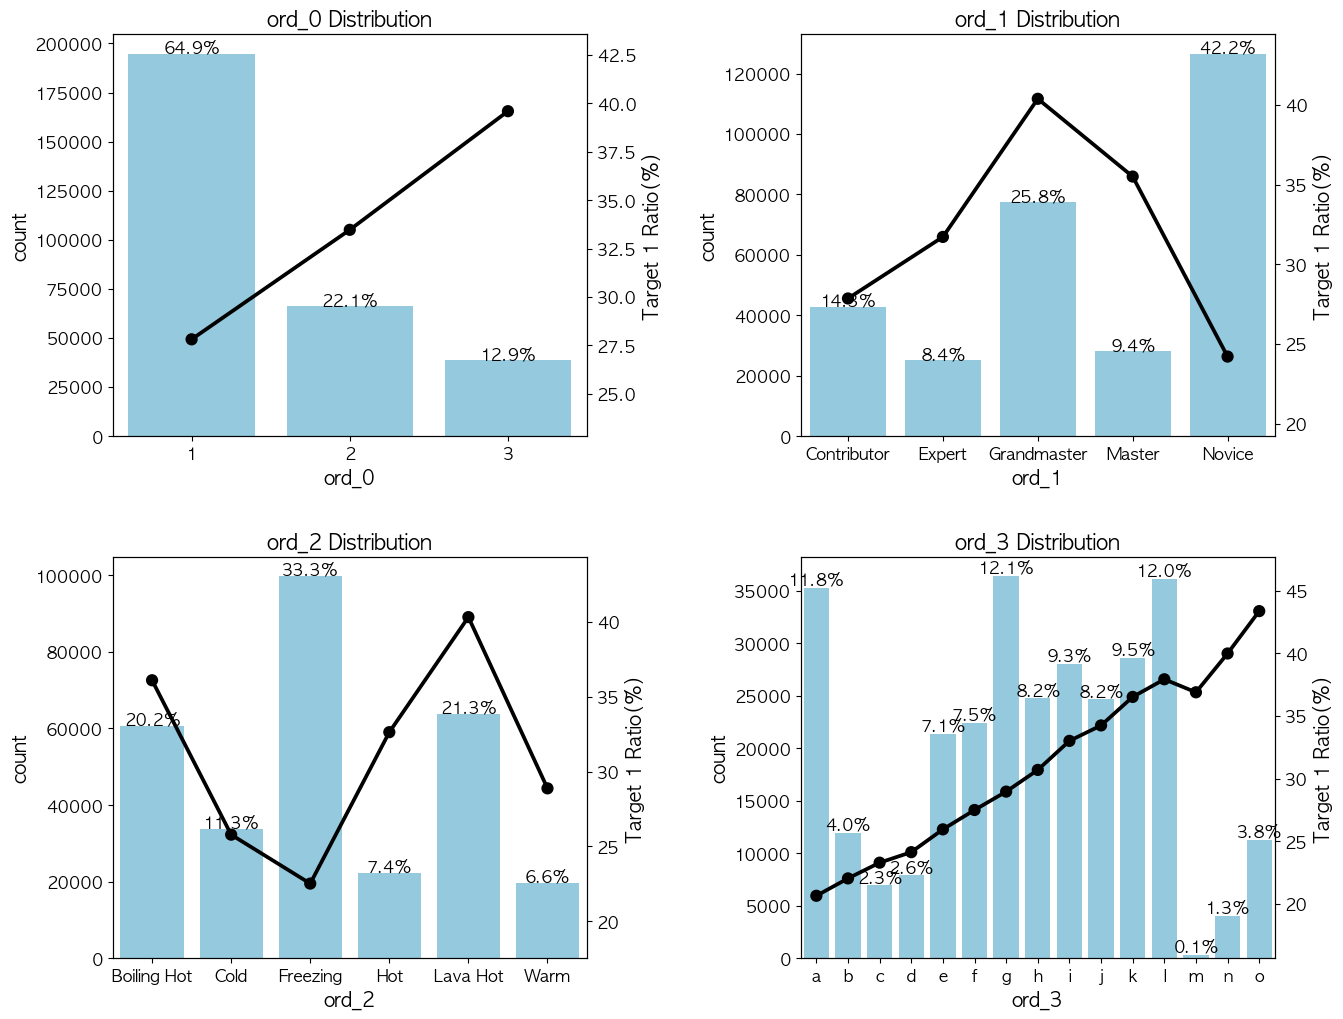

In [63]:
#순서형 피처 분포 확인
ord_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3'] # 순서형 피처
plot_cat_dist_with_true_ratio(train, ord_features, 
                              num_rows=2, num_cols=2, size=(15, 12))

In [64]:
#순서 변경
from pandas.api.types import CategoricalDtype 

ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']

# 순서를 지정한 범주형 데이터 타입
ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)

# 데이터 타입 변경
train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)

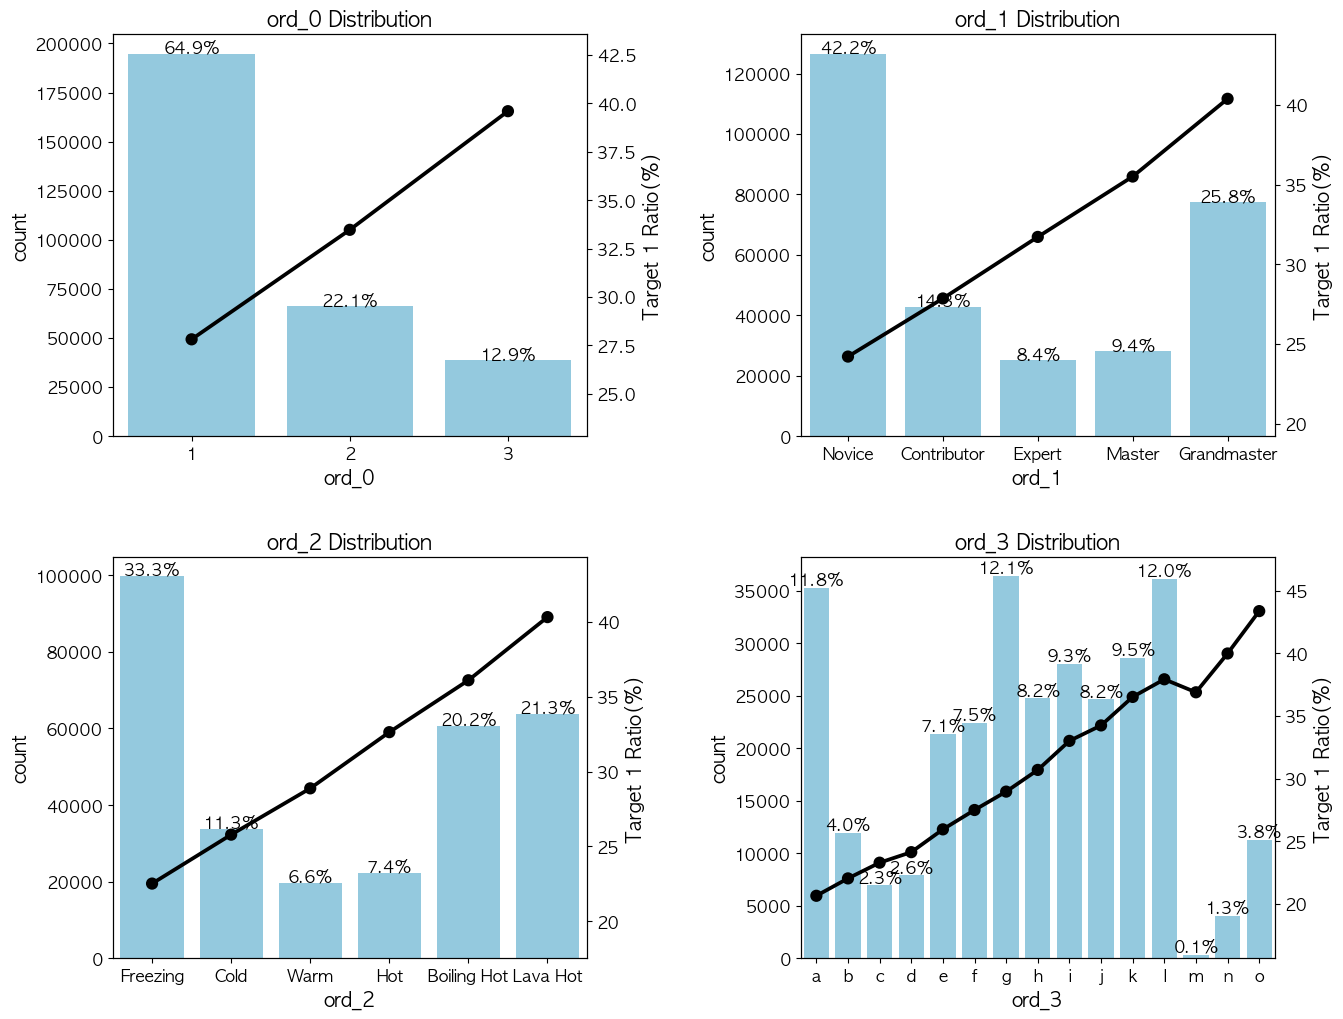

In [65]:
#순서형 피처 분포 확인
ord_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3'] # 순서형 피처
plot_cat_dist_with_true_ratio(train, ord_features, 
                              num_rows=2, num_cols=2, size=(15, 12))


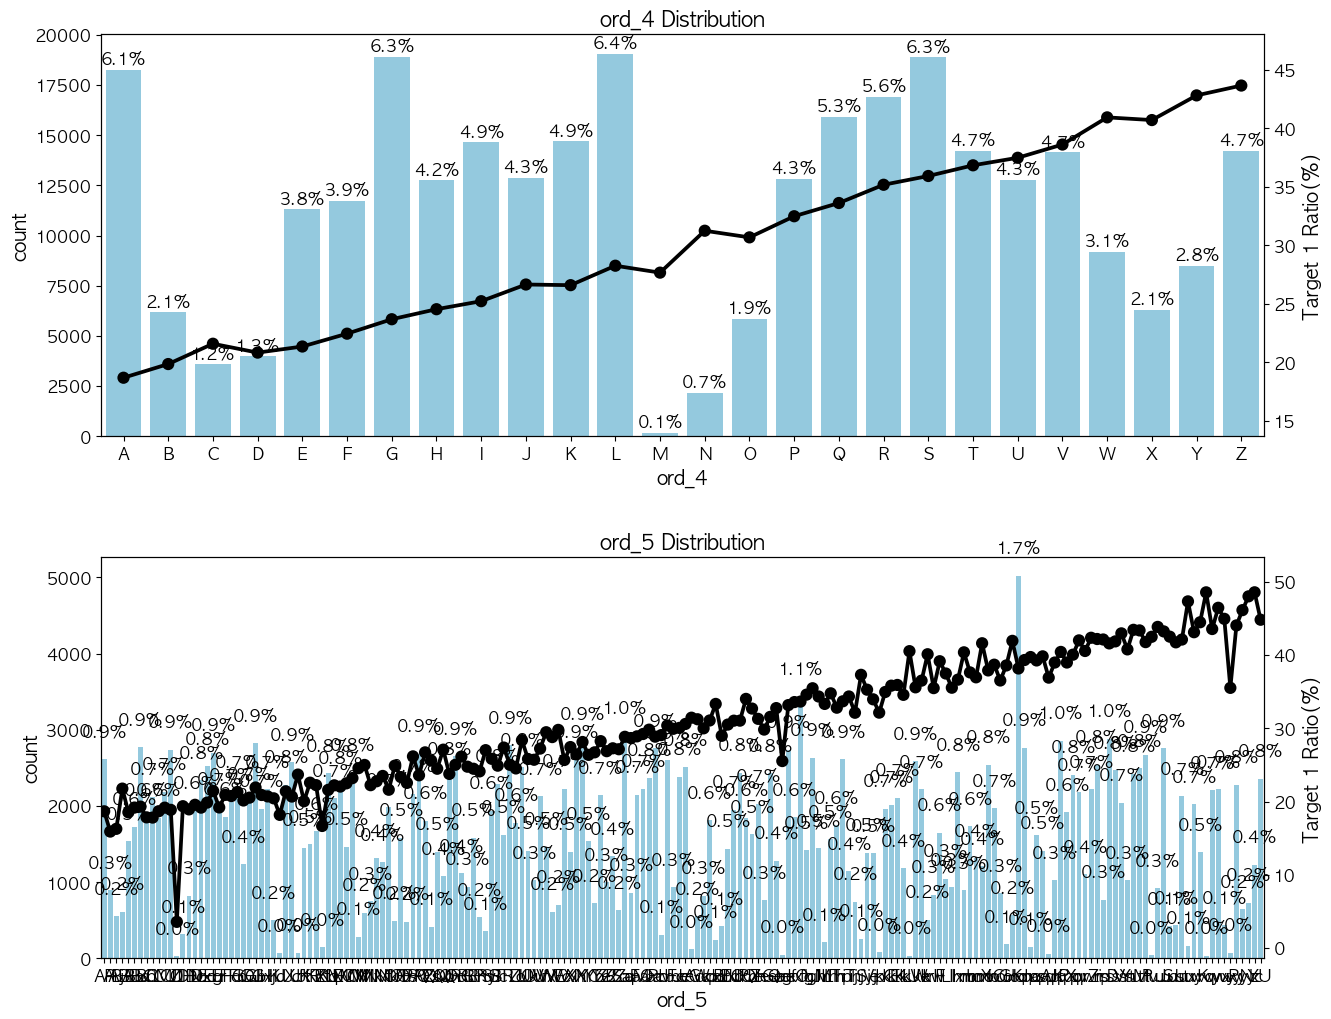

In [66]:
plot_cat_dist_with_true_ratio(train, ['ord_4', 'ord_5'], 
                              num_rows=2, num_cols=1, size=(15, 12))

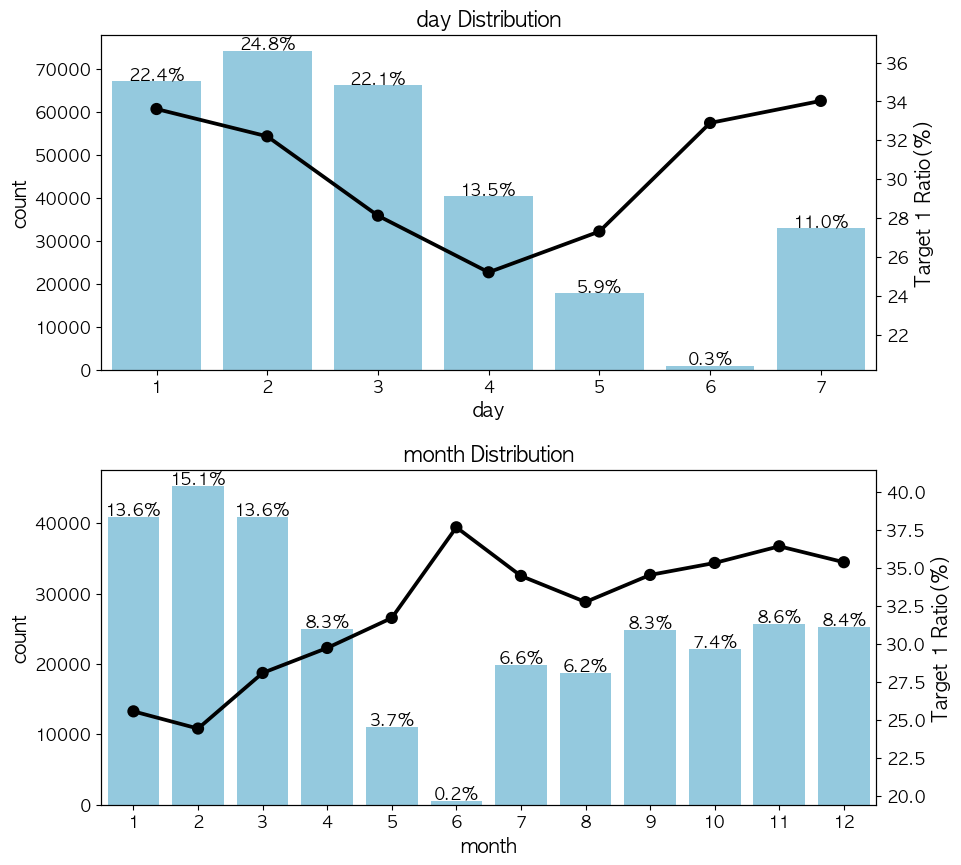

In [67]:
date_features = ['day', 'month']
plot_cat_dist_with_true_ratio(train, date_features, 
                              num_rows=2, num_cols=1, size=(10, 10))

## 데이터 전처리 및 기본 모델링

### 데이터 전처리

In [68]:
#데이터 가져오기
import pandas as pd
# 데이터 경로
data_path = './data/cfec/'

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

all_data = pd.concat([train, test]) # 훈련 데이터와 테스트 데이터 합치기 
all_data = all_data.drop('target', axis=1) # 타깃값 제거
all_data

bin_0  bin_1  bin_2 bin_3 bin_4  nom_0      nom_1    nom_2  \
id                                                                   
0           0      0      0     T     Y  Green   Triangle    Snake   
1           0      1      0     T     Y  Green  Trapezoid  Hamster   
2           0      0      0     F     Y   Blue  Trapezoid     Lion   
3           0      1      0     F     Y    Red  Trapezoid    Snake   
4           0      0      0     F     N    Red  Trapezoid     Lion   
...       ...    ...    ...   ...   ...    ...        ...      ...   
499995      0      0      0     F     N  Green     Square     Lion   
499996      1      0      0     F     Y  Green  Trapezoid     Lion   
499997      0      1      1     T     Y  Green  Trapezoid     Lion   
499998      1      0      0     T     Y   Blue       Star  Hamster   
499999      0      0      0     T     Y  Green       Star     Lion   

             nom_3     nom_4  ...      nom_8      nom_9 ord_0        ord_1  \
id                            ...                                            
0          Finland   Bassoon  ...  c389000ab  2f4cb3d51     2  Grandmaster   
1           Russia     Piano  ...  4cd920251  f83c56c21     1  Grandmaster   
2           Russia  Theremin  ...  de9c9f684  ae6800dd0     1       Expert   
3           Canada      Oboe  ...  4ade6ab69  8270f0d71     1  Grandmaster   
4           Canada      Oboe  ...  cb43ab175  b164b72a7     1  Grandmaster   
...            ...       ...  ...        ...        ...   ...          ...   
499995      Canada  Theremin  ...  9e4b23160  acc31291f     1       Novice   
499996       China     Piano  ...  cfbd87ed0  eae3446d0     1  Contributor   
499997      Canada      Oboe  ...  1108bcd6c  33dd3cf4b     1       Novice   
499998  Costa Rica   Bassoon  ...  606ac930b  d4cf587dd     2  Grandmaster   
499999       India     Piano  ...  4ea576eb6  2d610f52c     2       Novice   

              ord_2  ord_3 ord_4 ord_5 day month  
id                                                
0              Cold      h     D    kr   2     2  
1               Hot      a     A    bF   7     8  
2          Lava Hot      h     R    Jc   7     2  
3       Boiling Hot      i     D    kW   2     1  
4          Freezing      a     R    qP   7     8  
...             ...    ...   ...   ...  ..   ...  
499995     Lava Hot      j     A    Gb   1     3  
499996     Lava Hot      f     S    Ed   2     2  
499997  Boiling Hot      g     V    TR   3     1  
499998  Boiling Hot      g     X    Ye   2     1  
499999     Freezing      l     J    ex   2     2  

[500000 rows x 23 columns]

In [69]:
#원 핫 인코딩
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder() # 원-핫 인코더 생성
all_data_encoded = encoder.fit_transform(all_data) # 원-핫 인코딩 적용

In [70]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data_encoded[:num_train] # 0 ~ num_train - 1행
X_test = all_data_encoded[num_train:] # num_train ~ 마지막 행

y = train['target']

In [71]:
#데이터 다시 분할
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data_encoded[:num_train] # 0 ~ num_train - 1행
X_test = all_data_encoded[num_train:] # num_train ~ 마지막 행

y = train['target']

In [72]:
from sklearn.model_selection import train_test_split

# 훈련 데이터, 검증 데이터 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y,
                                                      test_size=0.3,
                                                      stratify=y,
                                                      random_state=10)

### 모델 훈련

In [73]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000, random_state=42) # 모델 생성
logistic_model.fit(X_train, y_train) # 모델 훈련

LogisticRegression(max_iter=1000, random_state=42)

### 모델 성능 검증

In [74]:
logistic_model.predict(X_valid)

array([0, 0, 0, ..., 0, 1, 0])

In [75]:
logistic_model.predict_proba(X_valid)

array([[0.8202082 , 0.1797918 ],
       [0.65602626, 0.34397374],
       [0.84624153, 0.15375847],
       ...,
       [0.70356228, 0.29643772],
       [0.35106879, 0.64893121],
       [0.9379672 , 0.0620328 ]])

In [76]:
# 검증 데이터를 활용한 타깃 예측 
y_valid_preds = logistic_model.predict_proba(X_valid)[:, 1]

In [77]:
from sklearn.metrics import roc_auc_score # ROC AUC 점수 계산 함수

# 검증 데이터 ROC AUC
roc_auc = roc_auc_score(y_valid, y_valid_preds)

print(f'검증 데이터 ROC AUC : {roc_auc:.4f}')

검증 데이터 ROC AUC : 0.7944


### 예측 및 결과 생성

In [78]:
# 타깃값 1일 확률 예측
y_preds = logistic_model.predict_proba(X_test)[:, 1]

In [79]:
# 제출 파일 생성
submission['target'] = y_preds
submission.to_csv('submission.csv')

## 모델 수정 - 인코딩 방식 변경 과 스케일링 및 하이퍼 파라미터 튜닝

### 이진 피처 인코딩

In [80]:
all_data['bin_3'] = all_data['bin_3'].map({'F':0, 'T':1})
all_data['bin_4'] = all_data['bin_4'].map({'N':0, 'Y':1})

### 순서형 목록 직접 인코딩

In [81]:
ord1dict = {'Novice':0, 'Contributor':1, 
            'Expert':2, 'Master':3, 'Grandmaster':4}
ord2dict = {'Freezing':0, 'Cold':1, 'Warm':2, 
            'Hot':3, 'Boiling Hot':4, 'Lava Hot':5}

all_data['ord_1'] = all_data['ord_1'].map(ord1dict)
all_data['ord_2'] = all_data['ord_2'].map(ord2dict)

### 순서형 목록 Ordinal Encoding

In [82]:
from sklearn.preprocessing import OrdinalEncoder

ord_345 = ['ord_3', 'ord_4', 'ord_5']

ord_encoder = OrdinalEncoder() # OrdinalEncoder 객체 생성
# ordinal 인코딩 적용
all_data[ord_345] = ord_encoder.fit_transform(all_data[ord_345])

# 피처별 인코딩 순서 출력
for feature, categories in zip(ord_345, ord_encoder.categories_):
    print(feature)
    print(categories)

ord_3
['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o']
ord_4
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
ord_5
['AP' 'Ai' 'Aj' 'BA' 'BE' 'Bb' 'Bd' 'Bn' 'CL' 'CM' 'CU' 'CZ' 'Cl' 'DH'
 'DN' 'Dc' 'Dx' 'Ed' 'Eg' 'Er' 'FI' 'Fd' 'Fo' 'GD' 'GJ' 'Gb' 'Gx' 'Hj'
 'IK' 'Id' 'JX' 'Jc' 'Jf' 'Jt' 'KR' 'KZ' 'Kf' 'Kq' 'LE' 'MC' 'MO' 'MV'
 'Mf' 'Ml' 'Mx' 'NV' 'Nf' 'Nk' 'OR' 'Ob' 'Os' 'PA' 'PQ' 'PZ' 'Ps' 'QM'
 'Qb' 'Qh' 'Qo' 'RG' 'RL' 'RP' 'Rm' 'Ry' 'SB' 'Sc' 'TR' 'TZ' 'To' 'UO'
 'Uk' 'Uu' 'Vf' 'Vx' 'WE' 'Wc' 'Wv' 'XI' 'Xh' 'Xi' 'YC' 'Yb' 'Ye' 'ZR'
 'ZS' 'Zc' 'Zq' 'aF' 'aM' 'aO' 'aP' 'ac' 'av' 'bF' 'bJ' 'be' 'cA' 'cG'
 'cW' 'ck' 'cp' 'dB' 'dE' 'dN' 'dO' 'dP' 'dQ' 'dZ' 'dh' 'eG' 'eQ' 'eb'
 'eg' 'ek' 'ex' 'fO' 'fh' 'gJ' 'gM' 'hL' 'hT' 'hh' 'hp' 'iT' 'ih' 'jS'
 'jV' 'je' 'jp' 'kC' 'kE' 'kK' 'kL' 'kU' 'kW' 'ke' 'kr' 'kw' 'lF' 'lL'
 'll' 'lx' 'mb' 'mc' 'mm' 'nX' 'nh' 'oC' 'oG' 'oH' 'oK' 'od' 'on' 'pa'
 'ps' 'qA' 'qJ' 'qK' 'qP' 'qX' '

### 명목형 데이터 원 핫 인코딩

In [83]:
nom_features = ['nom_' + str(i) for i in range(10)] # 명목형 피처

In [84]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder() # OneHotEncoder 객체 생성
# 원-핫 인코딩 적용
encoded_nom_matrix = onehot_encoder.fit_transform(all_data[nom_features])

encoded_nom_matrix

<500000x16276 sparse matrix of type '<class 'numpy.float64'>'
	with 5000000 stored elements in Compressed Sparse Row format>

In [85]:
all_data = all_data.drop(nom_features, axis=1) # 기존 명목형 피처 삭제

### 날짜 피처 인코딩

In [86]:
date_features  = ['day', 'month'] # 날짜 피처

# 원-핫 인코딩 적용
encoded_date_matrix = onehot_encoder.fit_transform(all_data[date_features])

all_data = all_data.drop(date_features, axis=1) # 기존 날짜 피처 삭제

encoded_date_matrix

<500000x19 sparse matrix of type '<class 'numpy.float64'>'
	with 1000000 stored elements in Compressed Sparse Row format>

### 스케일링

In [87]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

ord_features = ['ord_' + str(i) for i in range(6)] # 순서형 피처
# min-max 정규화
all_data[ord_features] = MinMaxScaler().fit_transform(all_data[ord_features])

#all_data[ord_features] = StandardScaler().fit_transform(all_data[ord_features])

In [88]:
from scipy import sparse

# 인코딩 및 스케일링된 피처 합치기
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data),
                               encoded_nom_matrix,
                               encoded_date_matrix],
                              format='csr')

In [89]:
all_data_sprs

<500000x16306 sparse matrix of type '<class 'numpy.float64'>'
	with 9163718 stored elements in Compressed Sparse Row format>

### 데이터 분할

In [90]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data_sprs[:num_train] # 0 ~ num_train - 1행
X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행

y = train['target']

In [91]:
from sklearn.model_selection import train_test_split

# 훈련 데이터, 검증 데이터 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y,
                                                      test_size=0.3,
                                                      stratify=y,
                                                      random_state=10)

### 하이퍼 파라미터 튜닝 및 모델 생성 및 훈련

In [92]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성
logistic_model = LogisticRegression()

# 하이퍼파라미터 값 목록
lr_params = {'C':[0.1, 0.125, 0.2], 'max_iter':[800, 900, 1000], 
             'solver':['liblinear'], 'random_state':[42]}

# 그리드서치 객체 생성
gridsearch_logistic_model = GridSearchCV(estimator=logistic_model,
                                         param_grid=lr_params,
                                         scoring='roc_auc', # 평가지표
                                         cv=5)
# 그리드서치 수행
gridsearch_logistic_model.fit(X_train, y_train)

print('최적 하이퍼파라미터:', gridsearch_logistic_model.best_params_)

최적 하이퍼파라미터: {'C': 0.125, 'max_iter': 800, 'random_state': 42, 'solver': 'liblinear'}
CPU times: user 11min 50s, sys: 50.7 s, total: 12min 40s
Wall time: 1min 25s


### 평가 지표

In [93]:
y_valid_preds = gridsearch_logistic_model.predict_proba(X_valid)[:, 1]

In [94]:
from sklearn.metrics import roc_auc_score # ROC AUC 점수 계산 함수

# 검증 데이터 ROC AUC
roc_auc = roc_auc_score(y_valid, y_valid_preds)

print(f'검증 데이터 ROC AUC : {roc_auc:.4f}')

검증 데이터 ROC AUC : 0.8035


### 결과 생성

In [95]:
# 타깃값 1일 확률 예측
y_preds = gridsearch_logistic_model.best_estimator_.predict_proba(X_test)[:,1]

# 제출 파일 생성
submission['target'] = y_preds
submission.to_csv('submission.csv')

## 모델 수정 - 모든 데이터를 훈련 데이터로 수정

### 데이터 가져오기

In [96]:
import pandas as pd
# 데이터 경로
data_path = './data/cfec/'

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')
print(type(submission))

<class 'pandas.core.frame.DataFrame'>


### 인코딩

In [97]:
# 훈련 데이터와 테스트 데이터 합치기
all_data = pd.concat([train, test])
all_data = all_data.drop('target', axis=1) # 타깃 값 제거

In [98]:
all_data['bin_3'] = all_data['bin_3'].map({'F':0, 'T':1})
all_data['bin_4'] = all_data['bin_4'].map({'N':0, 'Y':1})

ord1dict = {'Novice':0, 'Contributor':1, 
            'Expert':2, 'Master':3, 'Grandmaster':4}
ord2dict = {'Freezing':0, 'Cold':1, 'Warm':2, 
            'Hot':3, 'Boiling Hot':4, 'Lava Hot':5}

all_data['ord_1'] = all_data['ord_1'].map(ord1dict)
all_data['ord_2'] = all_data['ord_2'].map(ord2dict)

from sklearn.preprocessing import OrdinalEncoder

ord_345 = ['ord_3', 'ord_4', 'ord_5']

ord_encoder = OrdinalEncoder() # OrdinalEncoder 객체 생성
# ordinal 인코딩 적용
all_data[ord_345] = ord_encoder.fit_transform(all_data[ord_345])

# 피처별 인코딩 순서 출력
for feature, categories in zip(ord_345, ord_encoder.categories_):
    print(feature)
    print(categories)
    
nom_features = ['nom_' + str(i) for i in range(10)] # 명목형 피처

from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder() # OneHotEncoder 객체 생성
# 원-핫 인코딩 적용
encoded_nom_matrix = onehot_encoder.fit_transform(all_data[nom_features])

print(encoded_nom_matrix)

all_data = all_data.drop(nom_features, axis=1) # 기존 명목형 피처 삭제

date_features  = ['day', 'month'] # 날짜 피처

# 원-핫 인코딩 적용
encoded_date_matrix = onehot_encoder.fit_transform(all_data[date_features])

all_data = all_data.drop(date_features, axis=1) # 기존 날짜 피처 삭제

print(encoded_date_matrix)

ord_3
['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o']
ord_4
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
ord_5
['AP' 'Ai' 'Aj' 'BA' 'BE' 'Bb' 'Bd' 'Bn' 'CL' 'CM' 'CU' 'CZ' 'Cl' 'DH'
 'DN' 'Dc' 'Dx' 'Ed' 'Eg' 'Er' 'FI' 'Fd' 'Fo' 'GD' 'GJ' 'Gb' 'Gx' 'Hj'
 'IK' 'Id' 'JX' 'Jc' 'Jf' 'Jt' 'KR' 'KZ' 'Kf' 'Kq' 'LE' 'MC' 'MO' 'MV'
 'Mf' 'Ml' 'Mx' 'NV' 'Nf' 'Nk' 'OR' 'Ob' 'Os' 'PA' 'PQ' 'PZ' 'Ps' 'QM'
 'Qb' 'Qh' 'Qo' 'RG' 'RL' 'RP' 'Rm' 'Ry' 'SB' 'Sc' 'TR' 'TZ' 'To' 'UO'
 'Uk' 'Uu' 'Vf' 'Vx' 'WE' 'Wc' 'Wv' 'XI' 'Xh' 'Xi' 'YC' 'Yb' 'Ye' 'ZR'
 'ZS' 'Zc' 'Zq' 'aF' 'aM' 'aO' 'aP' 'ac' 'av' 'bF' 'bJ' 'be' 'cA' 'cG'
 'cW' 'ck' 'cp' 'dB' 'dE' 'dN' 'dO' 'dP' 'dQ' 'dZ' 'dh' 'eG' 'eQ' 'eb'
 'eg' 'ek' 'ex' 'fO' 'fh' 'gJ' 'gM' 'hL' 'hT' 'hh' 'hp' 'iT' 'ih' 'jS'
 'jV' 'je' 'jp' 'kC' 'kE' 'kK' 'kL' 'kU' 'kW' 'ke' 'kr' 'kw' 'lF' 'lL'
 'll' 'lx' 'mb' 'mc' 'mm' 'nX' 'nh' 'oC' 'oG' 'oH' 'oK' 'od' 'on' 'pa'
 'ps' 'qA' 'qJ' 'qK' 'qP' 'qX' '

### 스케일링

In [99]:
from sklearn.preprocessing import MinMaxScaler

ord_features = ['ord_' + str(i) for i in range(6)] # 순서형 피처
# min-max 정규화
all_data[ord_features] = MinMaxScaler().fit_transform(all_data[ord_features])

from scipy import sparse

# 인코딩 및 스케일링된 피처 합치기
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data),
                               encoded_nom_matrix,
                               encoded_date_matrix],
                              format='csr')

all_data_sprs

<500000x16306 sparse matrix of type '<class 'numpy.float64'>'
	with 9163718 stored elements in Compressed Sparse Row format>

### 데이터 분할

In [100]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data_sprs[:num_train] # 0 ~ num_train - 1행
X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행

y = train['target']

### 하이퍼 파라미터 튜닝

In [101]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성
logistic_model = LogisticRegression()

# 하이퍼파라미터 값 목록
lr_params = {'C':[0.1, 0.125, 0.2], 'max_iter':[800, 900, 1000], 
             'solver':['liblinear'], 'random_state':[42]}

# 그리드서치 객체 생성
gridsearch_logistic_model = GridSearchCV(estimator=logistic_model,
                                         param_grid=lr_params,
                                         scoring='roc_auc', # 평가지표
                                         cv=5)
# 그리드서치 수행
gridsearch_logistic_model.fit(X_train, y)

print('최적 하이퍼파라미터:', gridsearch_logistic_model.best_params_)

최적 하이퍼파라미터: {'C': 0.125, 'max_iter': 800, 'random_state': 42, 'solver': 'liblinear'}
CPU times: user 16min 52s, sys: 1min 47s, total: 18min 39s
Wall time: 2min 3s


### 예측 및 결과 생성

In [102]:
# 타깃값 1일 확률 예측
y_preds = gridsearch_logistic_model.best_estimator_.predict_proba(X_test)[:,1]

# 제출 파일 생성
submission['target'] = y_preds
submission.to_csv('submission.csv')

# 안전 운전자 예측

## 데이터 수집

In [104]:
import pandas as pd

# 데이터 경로
data_path = './data/porto-seguro-safe-driver-prediction/'

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

## 데이터 탐색

In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17_bin 

In [106]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892816 entries, 0 to 1488026
Data columns (total 57 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ps_ind_01       892816 non-null  int64  
 1   ps_ind_02_cat   892816 non-null  int64  
 2   ps_ind_03       892816 non-null  int64  
 3   ps_ind_04_cat   892816 non-null  int64  
 4   ps_ind_05_cat   892816 non-null  int64  
 5   ps_ind_06_bin   892816 non-null  int64  
 6   ps_ind_07_bin   892816 non-null  int64  
 7   ps_ind_08_bin   892816 non-null  int64  
 8   ps_ind_09_bin   892816 non-null  int64  
 9   ps_ind_10_bin   892816 non-null  int64  
 10  ps_ind_11_bin   892816 non-null  int64  
 11  ps_ind_12_bin   892816 non-null  int64  
 12  ps_ind_13_bin   892816 non-null  int64  
 13  ps_ind_14       892816 non-null  int64  
 14  ps_ind_15       892816 non-null  int64  
 15  ps_ind_16_bin   892816 non-null  int64  
 16  ps_ind_17_bin   892816 non-null  int64  
 17  ps_ind_18_bin 

In [107]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892816 entries, 0 to 1488026
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   target  892816 non-null  float64
dtypes: float64(1)
memory usage: 13.6 MB


### 결측치 확인

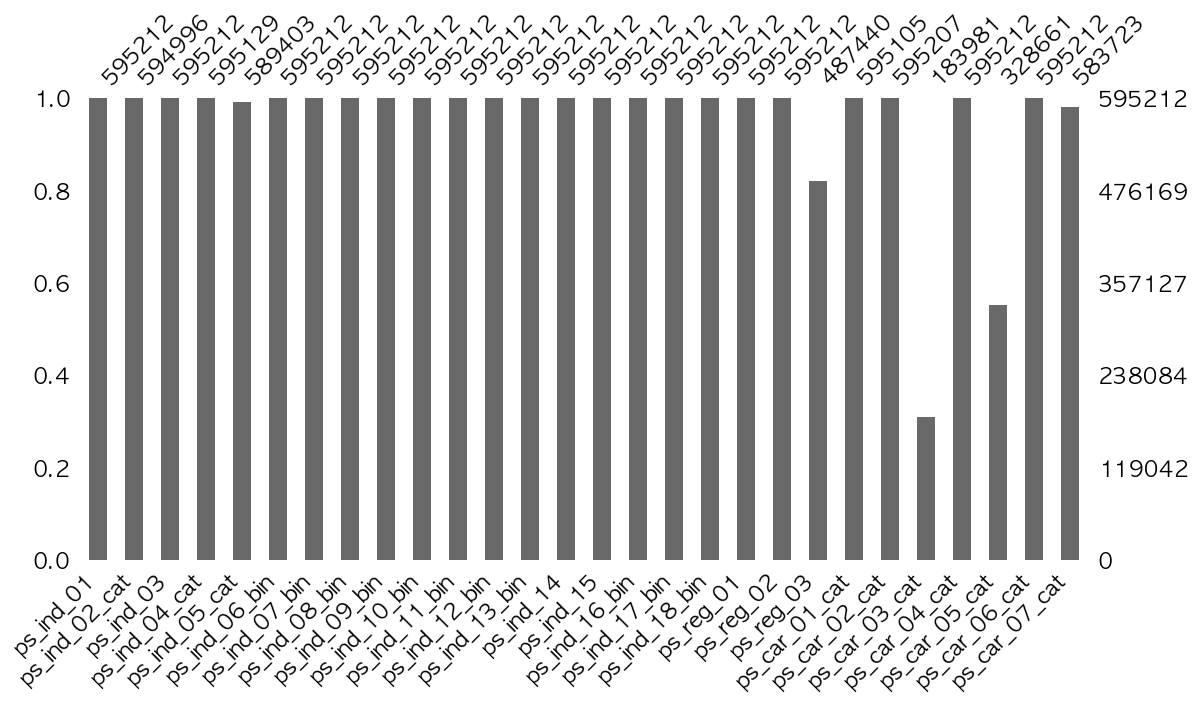

In [108]:
import numpy as np
!pip install missingno
import missingno as msno

# 훈련 데이터 복사본에서 -1을 np.NaN로 변환
train_copy = train.copy().replace(-1, np.NaN)

# 결측값 시각화(처음 28개만)
msno.bar(df=train_copy.iloc[:, 1:29], figsize=(13, 6));

<Axes: >

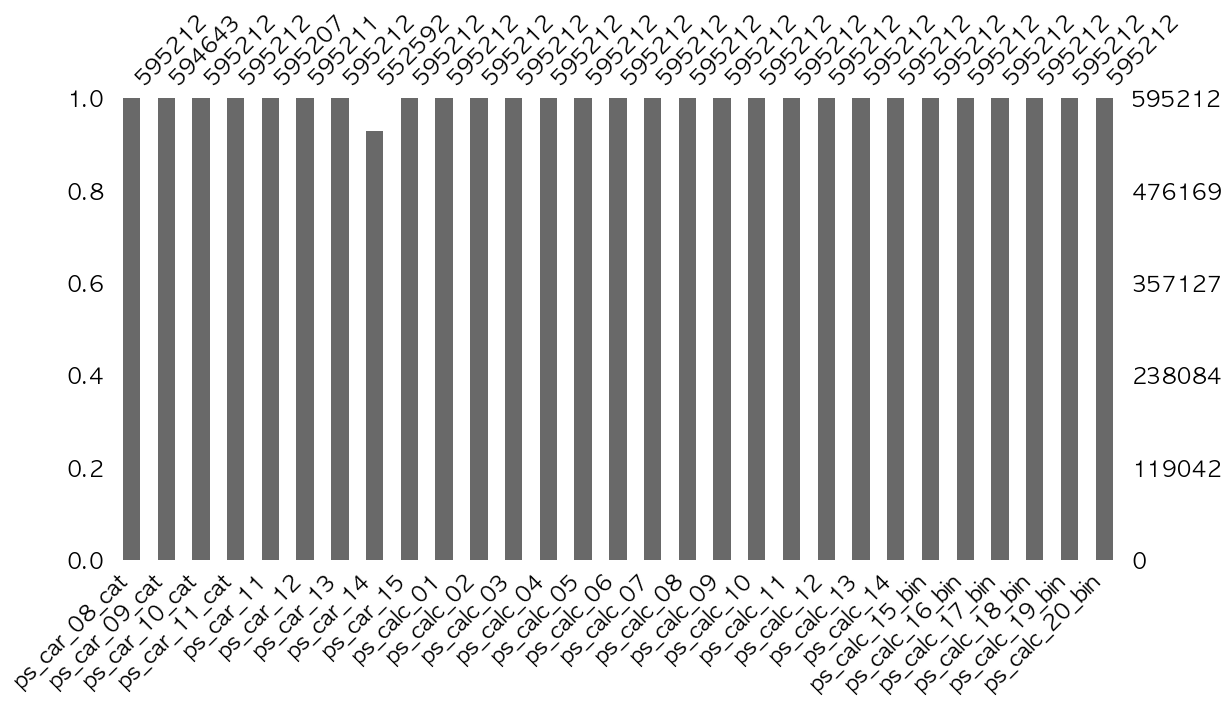

In [109]:
msno.bar(df=train_copy.iloc[:, 29:], figsize=(13, 6))

### 피처 요약

In [110]:
def resumetable(df):
    print(f'데이터 세트 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary['결측값 개수'] = (df == -1).sum().values # 피처별 -1 개수
    summary['고윳값 개수'] = df.nunique().values
    summary['데이터 종류'] = None
    for col in df.columns:
        if 'bin' in col or col == 'target':
            summary.loc[col, '데이터 종류'] = '이진형'
        elif 'cat' in col:
            summary.loc[col, '데이터 종류'] = '명목형'
        elif df[col].dtype == float:
            summary.loc[col, '데이터 종류'] = '연속형'
        elif df[col].dtype == int:
            summary.loc[col, '데이터 종류'] = '순서형'

    return summary

In [111]:
summary = resumetable(train)
summary

데이터 세트 형상: (595212, 58)


데이터 타입  결측값 개수  고윳값 개수 데이터 종류
target            int64       0       2    이진형
ps_ind_01         int64       0       8    순서형
ps_ind_02_cat     int64     216       5    명목형
ps_ind_03         int64       0      12    순서형
ps_ind_04_cat     int64      83       3    명목형
ps_ind_05_cat     int64    5809       8    명목형
ps_ind_06_bin     int64       0       2    이진형
ps_ind_07_bin     int64       0       2    이진형
ps_ind_08_bin     int64       0       2    이진형
ps_ind_09_bin     int64       0       2    이진형
ps_ind_10_bin     int64       0       2    이진형
ps_ind_11_bin     int64       0       2    이진형
ps_ind_12_bin     int64       0       2    이진형
ps_ind_13_bin     int64       0       2    이진형
ps_ind_14         int64       0       5    순서형
ps_ind_15         int64       0      14    순서형
ps_ind_16_bin     int64       0       2    이진형
ps_ind_17_bin     int64       0       2    이진형
ps_ind_18_bin     int64       0       2    이진형
ps_reg_01       float64       0      10    연속형
ps_reg_02       float64       0      19    연속형
ps_reg_03       float64  107772    5013    연속형
ps_car_01_cat     int64     107      13    명목형
ps_car_02_cat     int64       5       3    명목형
ps_car_03_cat     int64  411231       3    명목형
ps_car_04_cat     int64       0      10    명목형
ps_car_05_cat     int64  266551       3    명목형
ps_car_06_cat     int64       0      18    명목형
ps_car_07_cat     int64   11489       3    명목형
ps_car_08_cat     int64       0       2    명목형
ps_car_09_cat     int64     569       6    명목형
ps_car_10_cat     int64       0       3    명목형
ps_car_11_cat     int64       0     104    명목형
ps_car_11         int64       5       5    순서형
ps_car_12       float64       1     184    연속형
ps_car_13       float64       0   70482    연속형
ps_car_14       float64   42620     850    연속형
ps_car_15       float64       0      15    연속형
ps_calc_01      float64       0      10    연속형
ps_calc_02      float64       0      10    연속형
ps_calc_03      float64       0      10    연속형
ps_calc_04        int64       0       6    순서형
ps_calc_05        int64       0       7    순서형
ps_calc_06        int64       0      11    순서형
ps_calc_07        int64       0      10    순서형
ps_calc_08        int64       0      11    순서형
ps_calc_09        int64       0       8    순서형
ps_calc_10        int64       0      26    순서형
ps_calc_11        int64       0      20    순서형
ps_calc_12        int64       0      11    순서형
ps_calc_13        int64       0      14    순서형
ps_calc_14        int64       0      24    순서형
ps_calc_15_bin    int64       0       2    이진형
ps_calc_16_bin    int64       0       2    이진형
ps_calc_17_bin    int64       0       2    이진형
ps_calc_18_bin    int64       0       2    이진형
ps_calc_19_bin    int64       0       2    이진형
ps_calc_20_bin    int64       0       2    이진형

### 피처 확인

In [112]:
summary[summary['데이터 종류'] == '명목형'].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object')

In [113]:
summary[summary['데이터 타입'] == 'float64'].index

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object')

### 데이터 시각화

In [114]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#### 타겟 확인

Text(0.5, 1.0, 'Target Distribution')

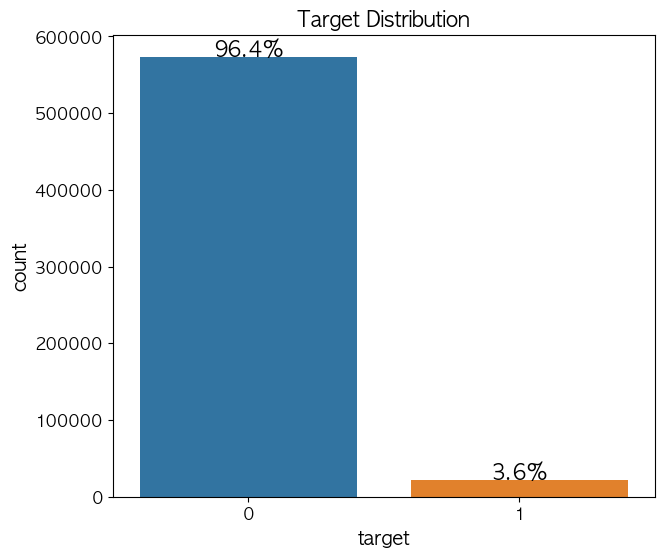

In [115]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 그래프 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()     # 도형 높이(데이터 개수)
        width = patch.get_width()       # 도형 너비
        left_coord = patch.get_x()      # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율
        
        # (x, y) 좌표에 텍스트 입력
        ax.text(left_coord + width/2.0,     # x축 위치
                height + total_size*0.001,  # y축 위치
                '{:1.1f}%'.format(percent), # 입력 텍스트
                ha='center')                # 가운데 정렬
    
mpl.rc('font', size=15)
plt.figure(figsize=(7, 6))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train)) # 비율 표시
ax.set_title('Target Distribution')

#### 이진 피처 확인

In [116]:
import matplotlib.gridspec as gridspec

def plot_target_ratio_by_features(df, features, num_rows, num_cols, 
                                  size=(12, 18)):
    mpl.rc('font', size=9) 
    plt.figure(figsize=size)                     # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace=0.3, hspace=0.3)  # 서브플롯 좌우/상하 여백 설정

    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        # ax축에 고윳값별 타깃값 1 비율을 막대 그래프로 그리기
        sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)

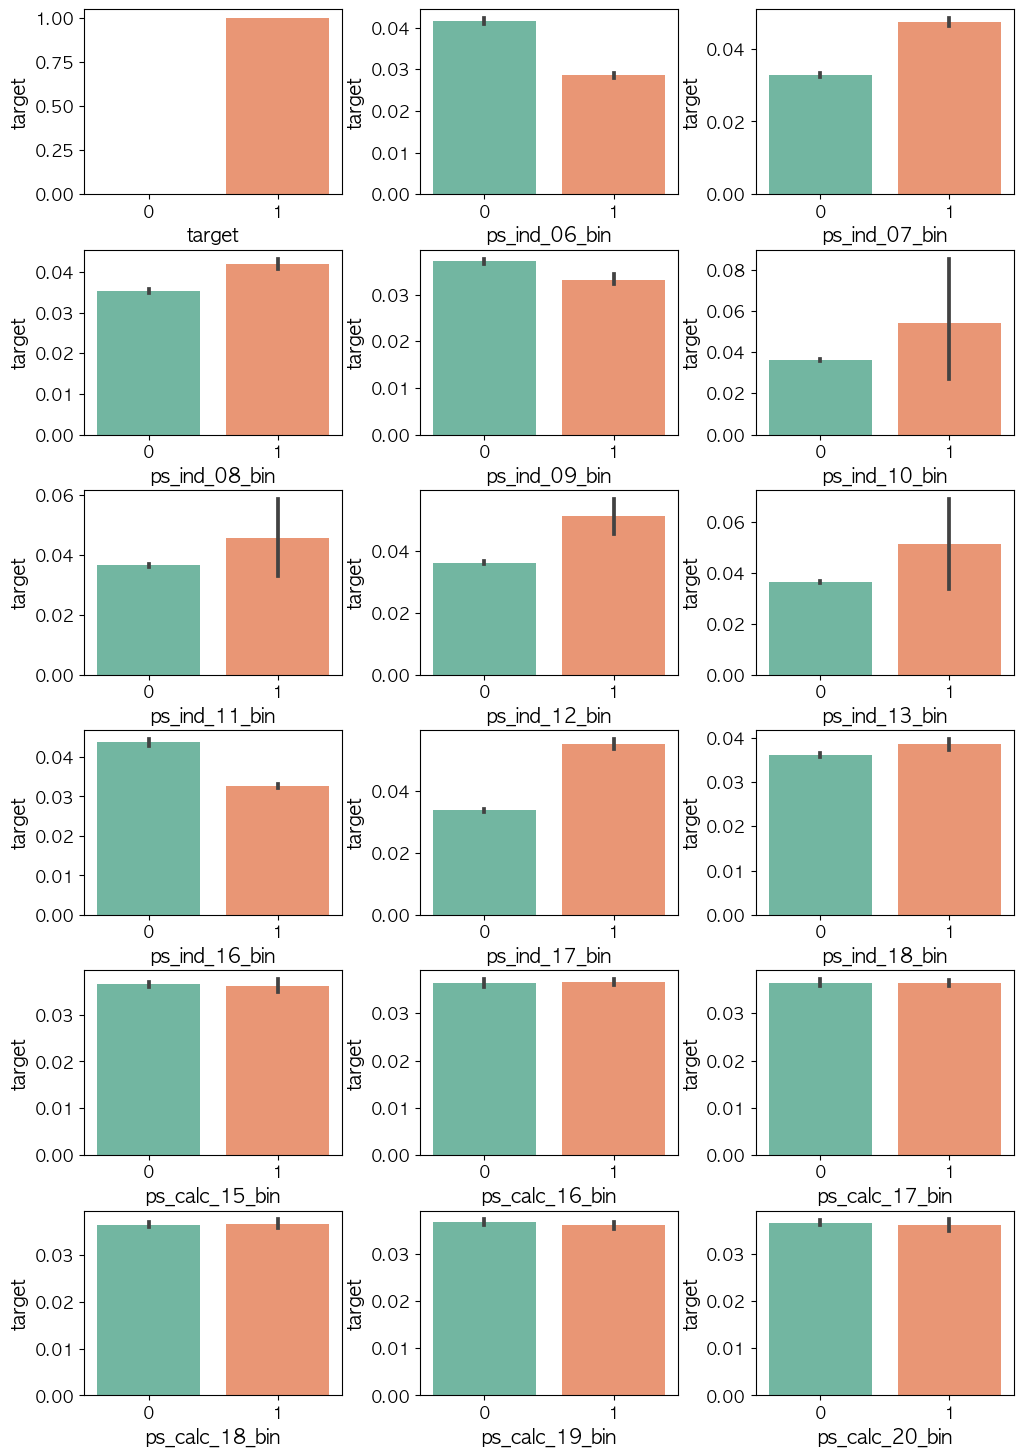

In [117]:
#조금 오래 걸림
bin_features = summary[summary['데이터 종류'] == '이진형'].index # 이진 피처
# 이진 피처 고윳값별 타깃값 1 비율을 막대 그래프로 그리기
plot_target_ratio_by_features(train, bin_features, 6, 3) # 6행 3열 배치

#### 명목형 피처 확인

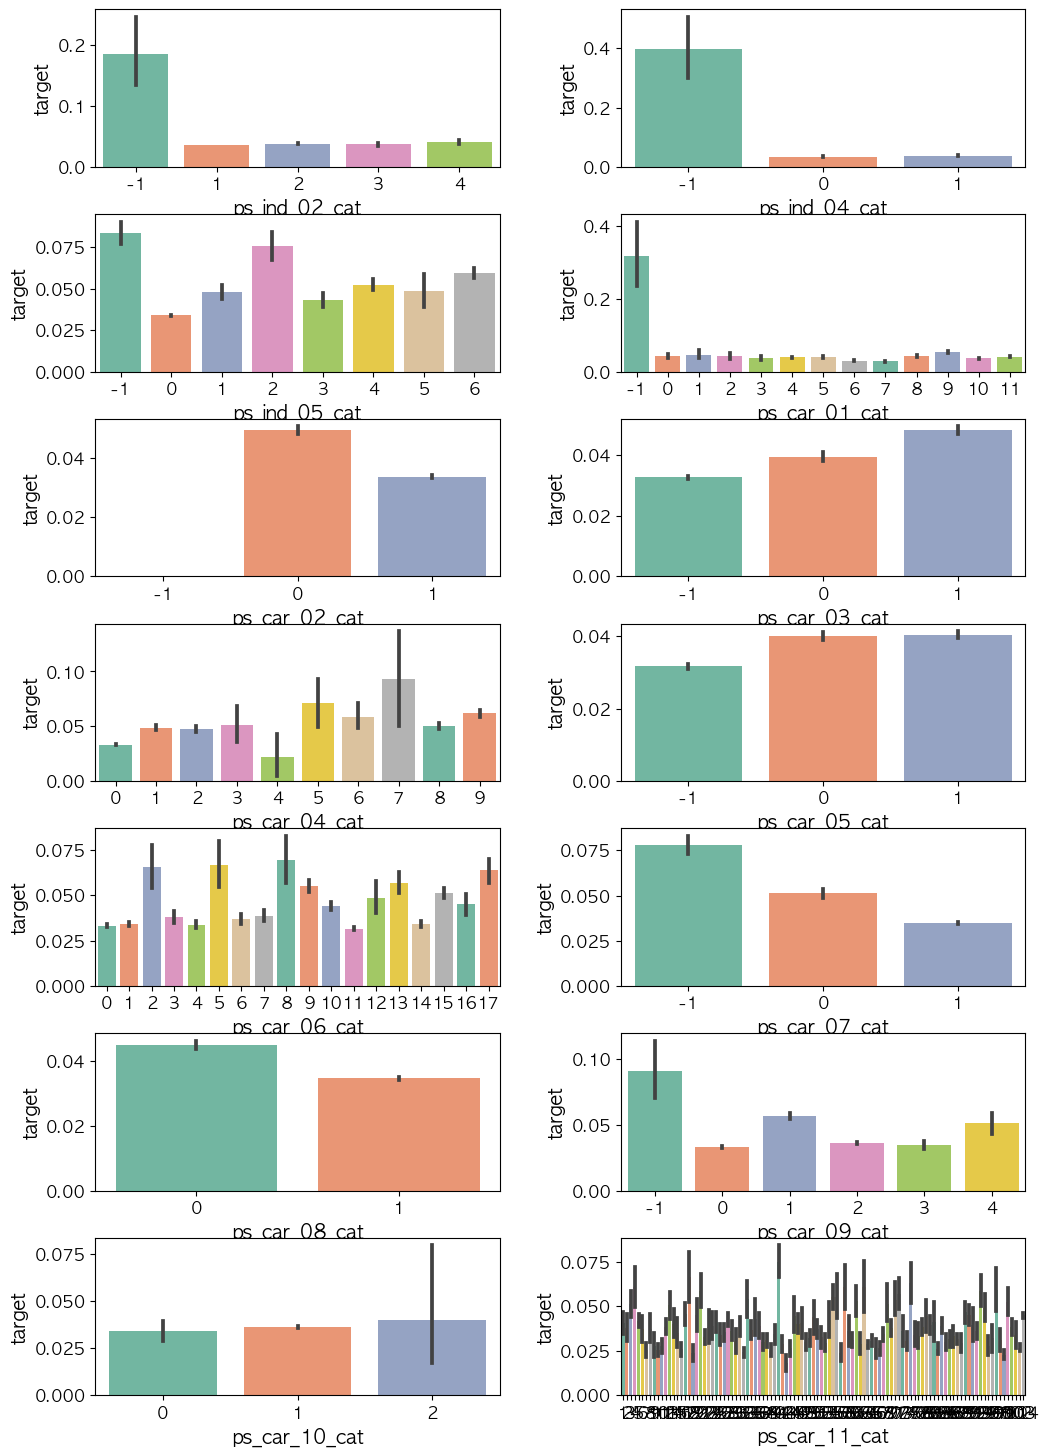

In [118]:
nom_features = summary[summary['데이터 종류'] == '명목형'].index # 명목형 피처

plot_target_ratio_by_features(train, nom_features, 7, 2) # 7행 2열

#### 순서형 피처 확인

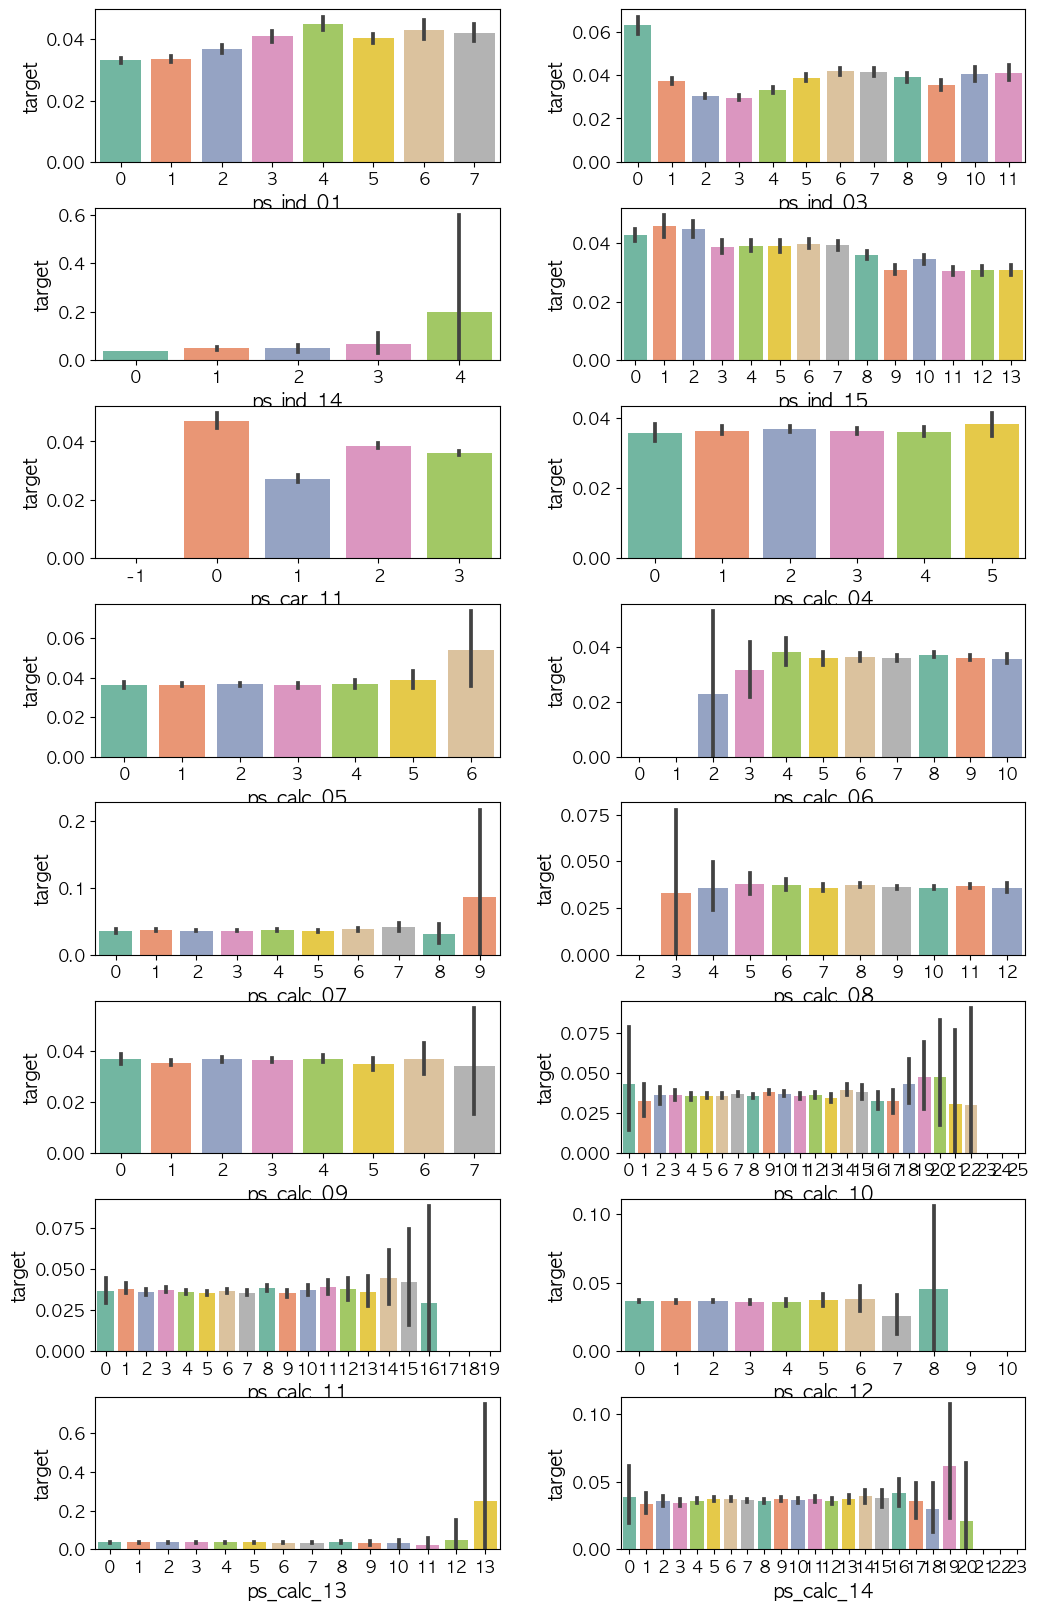

In [119]:
ord_features = summary[summary['데이터 종류'] == '순서형'].index # 순서형 피처

plot_target_ratio_by_features(train, ord_features, 8, 2, (12, 20)) # 8행 2열

#### 연속형 피처 확인

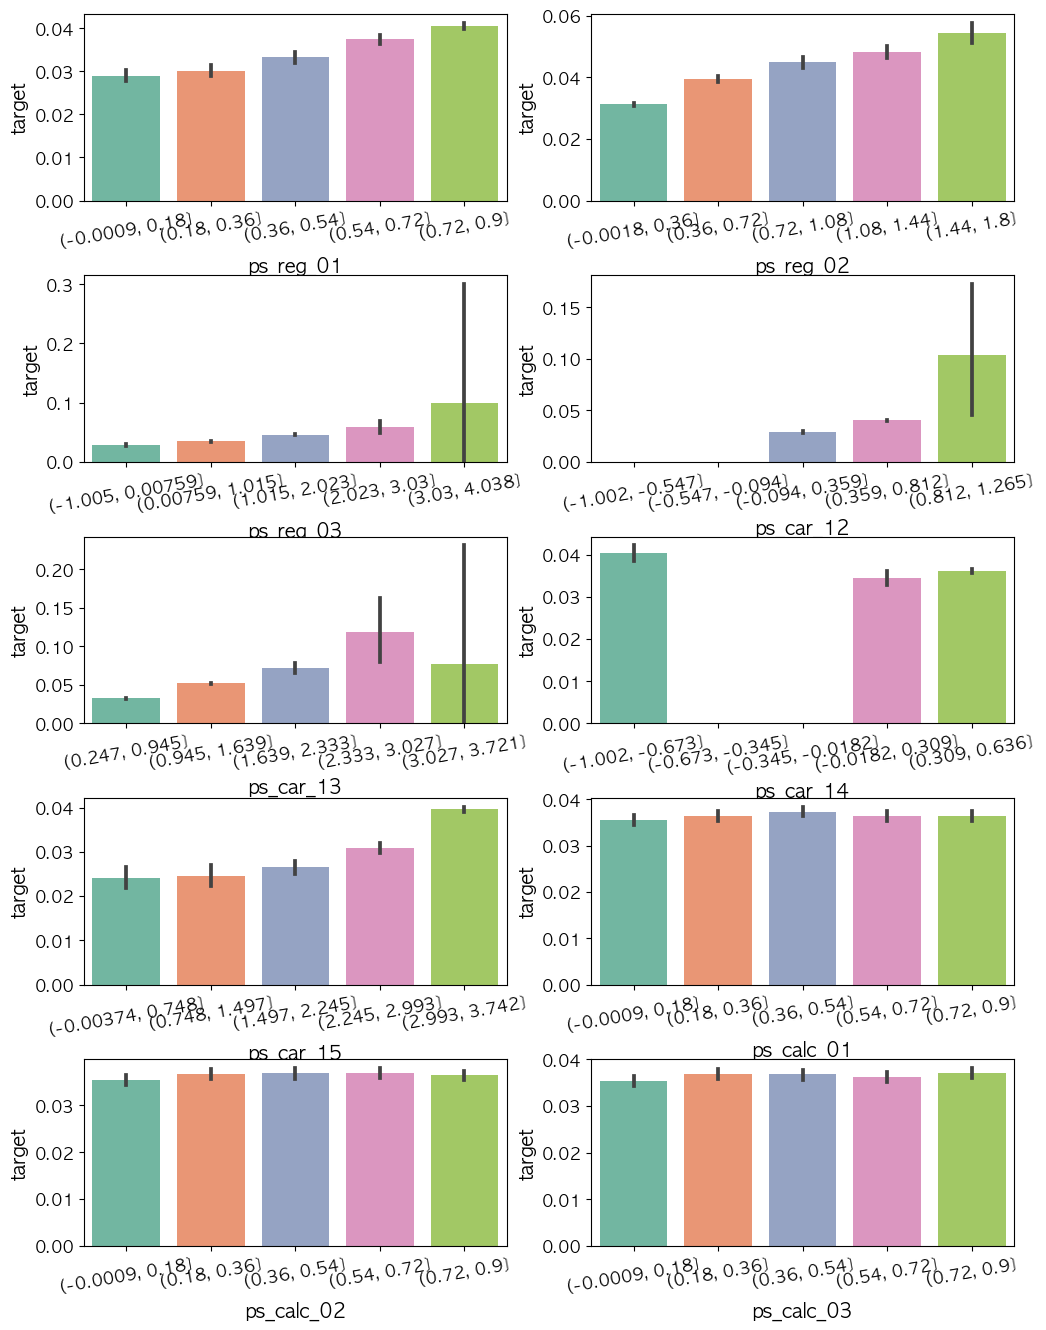

In [120]:
cont_features = summary[summary['데이터 종류'] == '연속형'].index # 연속형 피처

plt.figure(figsize=(12, 16))                # Figure 크기 설정
grid = gridspec.GridSpec(5, 2)              # GridSpec 객체 생성
plt.subplots_adjust(wspace=0.2, hspace=0.4) # 서브플롯 간 여백 설정

for idx, cont_feature in enumerate(cont_features):
    # 값을 5개 구간으로 나누기
    train[cont_feature] = pd.cut(train[cont_feature], 5)

    ax = plt.subplot(grid[idx])                # 분포도를 그릴 서브플롯 설정
    sns.barplot(x=cont_feature, y='target', data=train, palette='Set2', ax=ax)
    ax.tick_params(axis='x', labelrotation=10) # x축 라벨 회전

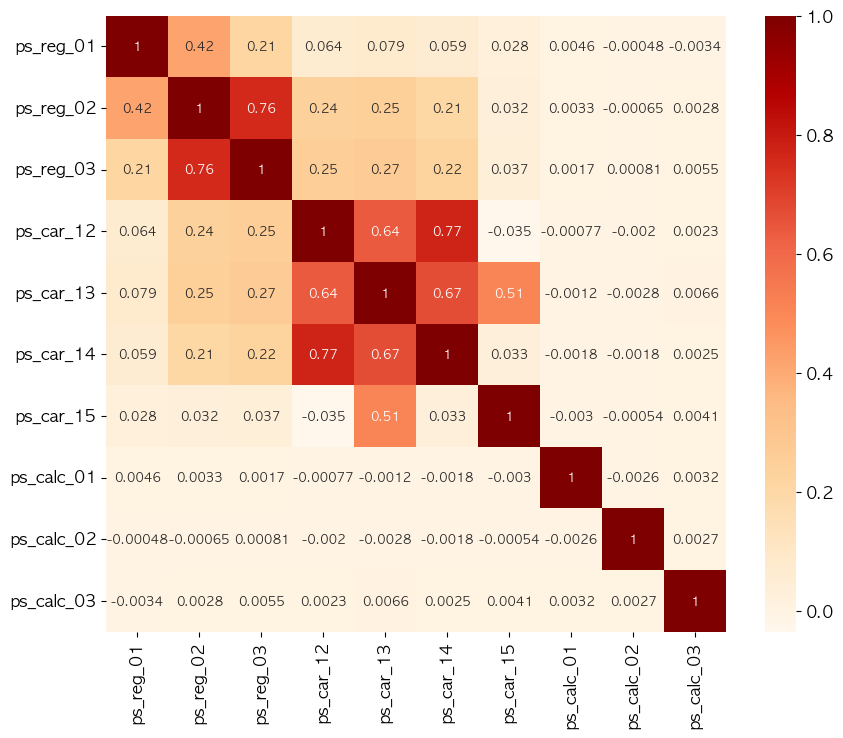

In [121]:
train_copy = train_copy.dropna() # np.NaN 값 삭제

plt.figure(figsize=(10, 8))
cont_corr = train_copy[cont_features].corr()     # 연속형 피처 간 상관관계 
sns.heatmap(cont_corr, annot=True, cmap='OrRd'); # 히트맵 그리기

## LIGHT GBM 활용

### 데이터 생성

In [122]:
import pandas as pd

# 데이터 경로
data_path = './data/porto-seguro-safe-driver-prediction/'

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

all_data = pd.concat([train, test], ignore_index=True)
all_data = all_data.drop('target', axis=1) # 타깃값 제거

### 피처 이름 확인

In [123]:
all_features = all_data.columns # 전체 피처
all_features

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='obj

### 데이터 전처리

#### 명목형 피처 원 핫 인코딩

In [124]:
from sklearn.preprocessing import OneHotEncoder

# 명목형 피처 추출
cat_features = [feature for feature in all_features if 'cat' in feature] 

onehot_encoder = OneHotEncoder() # 원-핫 인코더 객체 생성
# 인코딩
encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features]) 

encoded_cat_matrix

<1488028x184 sparse matrix of type '<class 'numpy.float64'>'
	with 20832392 stored elements in Compressed Sparse Row format>

#### 사용할 피처 추출

In [125]:
# 추가로 제거할 피처
drop_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin', 
                 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_14']

# '1) 명목형 피처, 2) calc 분류의 피처, 3) 추가 제거할 피처'를 제외한 피처
remaining_features = [feature for feature in all_features 
                      if ('cat' not in feature and 
                          'calc' not in feature and 
                          feature not in drop_features)]

#### 사용할 데이터 생성

In [126]:
from scipy import sparse

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data[remaining_features]),
                               encoded_cat_matrix],
                              format='csr')

#### 훈련 데이터 와 테스트 데이터 분리

In [127]:
num_train = len(train) # 훈련 데이터 개수

X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target'].values

### 모델 생성 과 훈련

#### 평가 지표  함수

In [128]:
import numpy as np

def eval_gini(y_true, y_pred):
    # 실제값과 예측값의 크기가 같은지 확인 (값이 다르면 오류 발생)
    assert y_true.shape == y_pred.shape

    n_samples = y_true.shape[0]                      # 데이터 개수
    L_mid = np.linspace(1 / n_samples, 1, n_samples) # 대각선 값

    # 1) 예측값에 대한 지니계수
    pred_order = y_true[y_pred.argsort()] # y_pred 크기순으로 y_true 값 정렬
    L_pred = np.cumsum(pred_order) / np.sum(pred_order) # 로렌츠 곡선
    G_pred = np.sum(L_mid - L_pred)       # 예측 값에 대한 지니계수

    # 2) 예측이 완벽할 때 지니계수
    true_order = y_true[y_true.argsort()] # y_true 크기순으로 y_true 값 정렬
    L_true = np.cumsum(true_order) / np.sum(true_order) # 로렌츠 곡선
    G_true = np.sum(L_mid - L_true)       # 예측이 완벽할 때 지니계수

    # 정규화된 지니계수
    return G_pred / G_true

In [129]:
def gini(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds), True # 반환값

#### OOF(Out of Fold Prediction)

In [130]:
from sklearn.model_selection import StratifiedKFold

# 층화 K 폴드 교차 검증기
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

params = {'objective': 'binary',
          'learning_rate': 0.01,
          'force_row_wise': True,
          'random_state': 0}

# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds = np.zeros(X.shape[0]) 
# OOF 방식으로 훈련된 모델로 테스트 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds = np.zeros(X_test.shape[0]) 

In [131]:
import lightgbm as lgb

# OOF 방식으로 모델 훈련, 검증, 예측
for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    # 각 폴드를 구분하는 문구 출력
    print('#'*40, f'폴드 {idx+1} / 폴드 {folds.n_splits}', '#'*40)
    
    # 훈련용 데이터, 검증용 데이터 설정 
    X_train, y_train = X[train_idx], y[train_idx] # 훈련용 데이터
    X_valid, y_valid = X[valid_idx], y[valid_idx] # 검증용 데이터

    # LightGBM 전용 데이터셋 생성 
    dtrain = lgb.Dataset(X_train, y_train) # LightGBM 전용 훈련 데이터셋
    dvalid = lgb.Dataset(X_valid, y_valid) # LightGBM 전용 검증 데이터셋

    
    lgb_model = lgb.train(params=params,        # 훈련용 하이퍼파라미터
                          train_set=dtrain,     # 훈련 데이터셋
                          num_boost_round=1000, # 부스팅 반복 횟수
                          valid_sets=dvalid,    # 성능 평가용 검증 데이터셋
                          feval=gini,           # 검증용 평가지표
                          callbacks=[lgb.early_stopping(stopping_rounds=100),], )# 조기종료 조건
        
    # 테스트 데이터를 활용해 OOF 예측
    oof_test_preds += lgb_model.predict(X_test)/folds.n_splits
    
    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)
    
    # 검증 데이터 예측 확률에 대한 정규화 지니계수 
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx+1} 지니계수 : {gini_score}\n')

######################################## 폴드 1 / 폴드 5 ########################################
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1095
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[681]	valid_0's binary_logloss: 0.151659	valid_0's gini: 0.289034
폴드 1 지니계수 : 0.2890336154188232

######################################## 폴드 2 / 폴드 5 ########################################
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1093
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[

### 평가 점수 확인 및 답안 생성

In [132]:
print('OOF 검증 데이터 지니계수:', eval_gini(y, oof_val_preds))

OOF 검증 데이터 지니계수: 0.2804995714877777


In [133]:
submission['target'] = oof_test_preds
submission.to_csv('submission.csv')

## 모델 개선 - 피처 엔지니어링 과 하이퍼파라미터 튜닝

### 데이터 생성

In [134]:
import pandas as pd

# 데이터 경로
data_path = './data/porto-seguro-safe-driver-prediction/'

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

all_data = pd.concat([train, test], ignore_index=True)
all_data = all_data.drop('target', axis=1) # 타깃값 제거

### 피처 엔지니어링

#### 명목형 피처 원 핫 인코딩

In [135]:
from sklearn.preprocessing import OneHotEncoder

# 명목형 피처
cat_features = [feature for feature in all_features if 'cat' in feature] 

# 원-핫 인코딩 적용
onehot_encoder = OneHotEncoder()
encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features]) 

#### 파생 피처 추가

In [136]:
# '데이터 하나당 결측값 개수'를 파생 피처로 추가
all_data['num_missing'] = (all_data==-1).sum(axis=1)

#### 사용할 피처 추출

In [137]:
# 명목형 피처, calc 분류의 피처를 제외한 피처
remaining_features = [feature for feature in all_features
                      if ('cat' not in feature and 'calc' not in feature)] 
# num_missing을 remaining_features에 추가
remaining_features.append('num_missing')

In [138]:
# 분류가 ind인 피처 - 모든 ind 피처 값을 연결해서 새로운 피처 생성
ind_features = [feature for feature in all_features if 'ind' in feature]

is_first_feature = True
for ind_feature in ind_features:
    if is_first_feature:
        all_data['mix_ind'] = all_data[ind_feature].astype(str) + '_'
        is_first_feature = False
    else:
        all_data['mix_ind'] += all_data[ind_feature].astype(str) + '_'
        
all_data['mix_ind']

0          2_2_5_1_0_0_1_0_0_0_0_0_0_0_11_0_1_0_
1           1_1_7_0_0_0_0_1_0_0_0_0_0_0_3_0_0_1_
2          5_4_9_1_0_0_0_1_0_0_0_0_0_0_12_1_0_0_
3           0_1_2_0_0_1_0_0_0_0_0_0_0_0_8_1_0_0_
4           0_2_0_1_0_1_0_0_0_0_0_0_0_0_9_1_0_0_
                           ...                  
1488023     0_1_6_0_0_0_1_0_0_0_0_0_0_0_2_0_0_1_
1488024    5_3_5_1_0_0_0_1_0_0_0_0_0_0_11_1_0_0_
1488025     0_1_5_0_0_1_0_0_0_0_0_0_0_0_5_0_0_1_
1488026    6_1_5_1_0_0_0_0_1_0_0_0_0_0_13_1_0_0_
1488027    7_1_4_1_0_0_0_0_1_0_0_0_0_0_12_1_0_0_
Name: mix_ind, Length: 1488028, dtype: object

In [139]:
# 명목형 피처의 고웃값별 개수를 새로운 피처로 추가
cat_count_features = []
for feature in cat_features+['mix_ind']:
    val_counts_dict = all_data[feature].value_counts().to_dict()
    all_data[f'{feature}_count'] = all_data[feature].apply(lambda x: 
                                                           val_counts_dict[x])
    cat_count_features.append(f'{feature}_count')
    
cat_count_features

['ps_ind_02_cat_count',
 'ps_ind_04_cat_count',
 'ps_ind_05_cat_count',
 'ps_car_01_cat_count',
 'ps_car_02_cat_count',
 'ps_car_03_cat_count',
 'ps_car_04_cat_count',
 'ps_car_05_cat_count',
 'ps_car_06_cat_count',
 'ps_car_07_cat_count',
 'ps_car_08_cat_count',
 'ps_car_09_cat_count',
 'ps_car_10_cat_count',
 'ps_car_11_cat_count',
 'mix_ind_count']

#### 필요없는 피처 제거

In [140]:
from scipy import sparse
# 필요 없는 피처들
drop_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin', 
                 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_14']

# remaining_features, cat_count_features에서 drop_features를 제거한 데이터
all_data_remaining = all_data[remaining_features+cat_count_features].drop(drop_features, axis=1)

# 데이터 합치기
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data_remaining),
                               encoded_cat_matrix],
                              format='csr')

#### 데이터 나누기

In [141]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target'].values

### 하이퍼파라미터 튜닝

#### 훈련용 데이터 와 테스트 데이터 나누기

In [142]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# 8:2 비율로 훈련 데이터, 검증 데이터 분리 (베이지안 최적화 수행용)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.2, 
                                                      random_state=0)

# 베이지안 최적화용 데이터셋
bayes_dtrain = lgb.Dataset(X_train, y_train)
bayes_dvalid = lgb.Dataset(X_valid, y_valid)

#### 하이퍼파라미터 생성

In [143]:
# 베이지안 최적화를 위한 하이퍼파라미터 범위
param_bounds = {'num_leaves': (30, 40),
                'lambda_l1': (0.7, 0.9),
                'lambda_l2': (0.9, 1),
                'feature_fraction': (0.6, 0.7),
                'bagging_fraction': (0.6, 0.9),
                'min_child_samples': (6, 10),
                'min_child_weight': (10, 40)}

# 값이 고정된 하이퍼파라미터
fixed_params = {'objective': 'binary',
                'learning_rate': 0.005,
                'bagging_freq': 1,
                'force_row_wise': True,
                'random_state': 1991}

#### (베이지안 최적화용) 평가지표 계산 함수 작성

In [144]:
def eval_function(num_leaves, lambda_l1, lambda_l2, feature_fraction,
                  bagging_fraction, min_child_samples, min_child_weight):
    '''최적화하려는 평가지표(지니계수) 계산 함수'''
    
    # 베이지안 최적화를 수행할 하이퍼파라미터 
    params = {'num_leaves': int(round(num_leaves)),
              'lambda_l1': lambda_l1,
              'lambda_l2': lambda_l2,
              'feature_fraction': feature_fraction,
              'bagging_fraction': bagging_fraction,
              'min_child_samples': int(round(min_child_samples)),
              'min_child_weight': min_child_weight,
              'feature_pre_filter': False}
    # 고정된 하이퍼파라미터도 추가
    params.update(fixed_params)
    
    print('하이퍼파라미터:', params)    
    
    # LightGBM 모델 훈련
    lgb_model = lgb.train(params=params, 
                           train_set=bayes_dtrain,
                           num_boost_round=2500,
                           valid_sets=bayes_dvalid,
                           feval=gini,
                           callbacks=[lgb.early_stopping(stopping_rounds=300),],)
    
    # 검증 데이터로 예측 수행
    preds = lgb_model.predict(X_valid) 
    # 지니계수 계산
    gini_score = eval_gini(y_valid, preds)
    print(f'지니계수 : {gini_score}\n')
    
    return gini_score

#### 베이지언 최적화 수행

In [145]:
!pip install bayesian-optimization

from bayes_opt import BayesianOptimization

# 베이지안 최적화 객체 생성
optimizer = BayesianOptimization(f=eval_function,      # 평가지표 계산 함수
                                 pbounds=param_bounds, # 하이퍼파라미터 범위
                                 random_state=42)
# 베이지안 최적화 수행
optimizer.maximize(init_points=3, n_iter=6)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | min_ch... | min_ch... | num_le... |
-------------------------------------------------------------------------------------------------------------
하이퍼파라미터: {'num_leaves': 31, 'lambda_l1': 0.846398788362281, 'lambda_l2': 0.9598658484197037, 'feature_fraction': 0.6950714306409915, 'bagging_fraction': 0.7123620356542087, 'min_child_samples': 7, 'min_child_weight': 14.67983561008608, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786
[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
Training until validation scores don't improve for 300 rounds
Did no

[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
Training until validation scores don't improve for 300 rounds
Did not meet early stopping. Best iteration is:
[2352]	valid_0's binary_logloss: 0.151007	valid_0's gini: 0.283684
지니계수 : 0.2836843143530083

| 7         | 0.2837    | 0.8996    | 0.6051    | 0.8565    | 0.9742    | 9.169     | 20.48     | 34.64     |
하이퍼파라미터: {'num_leaves': 36, 'lambda_l1': 0.7950675246264495, 'lambda_l2': 0.9788312542049057, 'feature_fraction': 0.6240535425572904, 'bagging_fraction': 0.8644685131890466, 'min_child_samples': 8, 'min_child_weight': 19.614151979521818, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383,

In [146]:
# 평가함수 점수가 최대일 때 하이퍼파라미터
max_params = optimizer.max['params']
max_params

{'bagging_fraction': 0.6088841902473545,
 'feature_fraction': 0.6868030133323046,
 'lambda_l1': 0.7487830511357251,
 'lambda_l2': 0.9721782215036251,
 'min_child_samples': 7.620158465362024,
 'min_child_weight': 18.829988935143582,
 'num_leaves': 36.153473729998844}

In [147]:
# 정수형 하이퍼파라미터 변환
max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['min_child_samples'] = int(round(max_params['min_child_samples']))

In [148]:
# 값이 고정된 하이퍼파라미터 추가
max_params.update(fixed_params)

In [149]:
max_params

{'bagging_fraction': 0.6088841902473545,
 'feature_fraction': 0.6868030133323046,
 'lambda_l1': 0.7487830511357251,
 'lambda_l2': 0.9721782215036251,
 'min_child_samples': 8,
 'min_child_weight': 18.829988935143582,
 'num_leaves': 36,
 'objective': 'binary',
 'learning_rate': 0.005,
 'bagging_freq': 1,
 'force_row_wise': True,
 'random_state': 1991}

### 모델 훈련

In [152]:
from sklearn.model_selection import StratifiedKFold

# 층화 K 폴드 교차 검증기 생성
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds = np.zeros(X.shape[0]) 
# OOF 방식으로 훈련된 모델로 테스트 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds = np.zeros(X_test.shape[0]) 

# OOF 방식으로 모델 훈련, 검증, 예측
for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    # 각 폴드를 구분하는 문구 출력
    print('#'*40, f'폴드 {idx+1} / 폴드 {folds.n_splits}', '#'*40)
    
    # 훈련용 데이터, 검증용 데이터 설정
    X_train, y_train = X[train_idx], y[train_idx] # 훈련용 데이터
    X_valid, y_valid = X[valid_idx], y[valid_idx] # 검증용 데이터

    # LightGBM 전용 데이터셋 생성
    dtrain = lgb.Dataset(X_train, y_train) # LightGBM 전용 훈련 데이터셋
    dvalid = lgb.Dataset(X_valid, y_valid) # LightGBM 전용 검증 데이터셋
                          
    
    lgb_model = lgb.train(params=params,        # 훈련용 하이퍼파라미터
                          train_set=dtrain,     # 훈련 데이터셋
                          num_boost_round=2500, # 부스팅 반복 횟수
                          valid_sets=dvalid,    # 성능 평가용 검증 데이터셋
                          feval=gini,           # 검증용 평가지표
                          callbacks=[lgb.early_stopping(stopping_rounds=100),])
    
    
    # 테스트 데이터를 활용해 OOF 예측
    oof_test_preds += lgb_model.predict(X_test)/folds.n_splits
    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측 
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)
    
    # 검증 데이터 예측확률에 대한 정규화 지니계수
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx+1} 지니계수 : {gini_score}\n')

######################################## 폴드 1 / 폴드 5 ########################################
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1551
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 216
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[725]	valid_0's binary_logloss: 0.151723	valid_0's gini: 0.288419
폴드 1 지니계수 : 0.2884187478346423

######################################## 폴드 2 / 폴드 5 ########################################
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1549
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 216
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[

### 평가 및 답안 생성

In [153]:
print('OOF 검증 데이터 지니계수 :', eval_gini(y, oof_val_preds))
submission['target'] = oof_test_preds
submission.to_csv('submission.csv')

OOF 검증 데이터 지니계수 : 0.2806527624053886


## XGBoost 모델 활용 

### XGBoost gini 함수

In [154]:
# XGBoost용 gini() 함수
def gini(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds)

### 데이터 준비

In [155]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# 8:2 비율로 훈련 데이터, 검증 데이터 분리 (베이지안 최적화 수행용)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.2, 
                                                      random_state=0)
# 베이지안 최적화용 데이터셋
bayes_dtrain = xgb.DMatrix(X_train, y_train)
bayes_dvalid = xgb.DMatrix(X_valid, y_valid)

### 하이퍼파라미터 범위 설정

In [156]:
# 베이지안 최적화를 위한 하이퍼파라미터 범위
param_bounds = {'max_depth': (4, 8),
                'subsample': (0.6, 0.9),
                'colsample_bytree': (0.7, 1.0),
                'min_child_weight': (5, 7),
                'gamma': (8, 11),
                'reg_alpha': (7, 9),
                'reg_lambda': (1.1, 1.5),
                'scale_pos_weight': (1.4, 1.6)}

# 값이 고정된 하이퍼파라미터
fixed_params = {'objective': 'binary:logistic',
                'learning_rate': 0.02,
                'random_state': 1991}

### 베이지안 최적화용 평가지표 계산 함수

In [157]:
def eval_function(max_depth, subsample, colsample_bytree, min_child_weight,
                 reg_alpha, gamma, reg_lambda, scale_pos_weight):
    '''최적화하려는 평가지표(지니계수) 계산 함수'''
    # 베이지안 최적화를 수행할 하이퍼파라미터
    params = {'max_depth': int(round(max_depth)),
              'subsample': subsample,
              'colsample_bytree': colsample_bytree,
              'min_child_weight': min_child_weight,
              'gamma': gamma,
              'reg_alpha':reg_alpha,
              'reg_lambda': reg_lambda,
              'scale_pos_weight': scale_pos_weight}
    # 값이 고정된 하이퍼파라미터도 추가
    params.update(fixed_params)
    
    print('하이퍼파라미터 :', params)    
        
    # XGBoost 모델 훈련
    xgb_model = xgb.train(params=params, 
                          dtrain=bayes_dtrain,
                          num_boost_round=2000,
                          evals=[(bayes_dvalid, 'bayes_dvalid')],
                          maximize=True,
                          feval=gini,
                          early_stopping_rounds=200,
                          verbose_eval=False)
                           
    best_iter = xgb_model.best_iteration # 최적 반복 횟수
    # 검증 데이터로 예측 수행
    preds = xgb_model.predict(bayes_dvalid, 
                              iteration_range=(0, best_iter))
    # 지니계수 계산
    gini_score = eval_gini(y_valid, preds)
    print(f'지니계수 : {gini_score}\n')
    
    return gini_score

### 최적화 수행

In [158]:
from bayes_opt import BayesianOptimization

# 베이지안 최적화 객체 생성
optimizer = BayesianOptimization(f=eval_function, 
                                 pbounds=param_bounds, 
                                 random_state=0)

# 베이지안 최적화 수행
optimizer.maximize(init_points=3, n_iter=6)

|   iter    |  target   | colsam... |   gamma   | max_depth | min_ch... | reg_alpha | reg_la... | scale_... | subsample |
-------------------------------------------------------------------------------------------------------------------------
하이퍼파라미터 : {'max_depth': 6, 'subsample': 0.8675319002346239, 'colsample_bytree': 0.8646440511781974, 'min_child_weight': 6.0897663659937935, 'gamma': 10.14556809911726, 'reg_alpha': 7.84730959867781, 'reg_lambda': 1.3583576452266626, 'scale_pos_weight': 1.4875174422525386, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}
지니계수 : 0.27704335215844117

| 1         | 0.277     | 0.8646    | 10.15     | 6.411     | 6.09      | 7.847     | 1.358     | 1.488     | 0.8675    |
하이퍼파라미터 : {'max_depth': 7, 'subsample': 0.6261387899104622, 'colsample_bytree': 0.9890988281503088, 'min_child_weight': 6.0577898395058085, 'gamma': 9.150324556477333, 'reg_alpha': 8.136089122187865, 'reg_lambda': 1.4702386553170643, 'scale_pos_weight': 1.

### 결과 확인

In [159]:
# 평가함수 점수가 최대일 때 하이퍼파라미터
max_params = optimizer.max['params']
max_params

{'colsample_bytree': 0.7,
 'gamma': 8.0,
 'max_depth': 7.010972242600073,
 'min_child_weight': 5.0,
 'reg_alpha': 9.0,
 'reg_lambda': 1.1,
 'scale_pos_weight': 1.6,
 'subsample': 0.6}

### 파라미터 추가

In [160]:
# 정수형 하이퍼파라미터 변환
max_params['max_depth'] = int(round(max_params['max_depth']))

# 값이 고정된 하이퍼파라미터 추가
max_params.update(fixed_params)
max_params

{'colsample_bytree': 0.7,
 'gamma': 8.0,
 'max_depth': 7,
 'min_child_weight': 5.0,
 'reg_alpha': 9.0,
 'reg_lambda': 1.1,
 'scale_pos_weight': 1.6,
 'subsample': 0.6,
 'objective': 'binary:logistic',
 'learning_rate': 0.02,
 'random_state': 1991}

### 모델 훈련 및 검증

In [161]:
from sklearn.model_selection import StratifiedKFold

# 층화 K 폴드 교차 검증기 생성
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds = np.zeros(X.shape[0]) 
# OOF 방식으로 훈련된 모델로 테스트 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds = np.zeros(X_test.shape[0]) 

# OOF 방식으로 모델 훈련, 검증, 예측
for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    # 각 폴드를 구분하는 문구 출력
    print('#'*40, f'폴드 {idx+1} / 폴드 {folds.n_splits}', '#'*40)
    
    # 훈련용 데이터, 검증용 데이터 설정
    X_train, y_train = X[train_idx], y[train_idx]
    X_valid, y_valid = X[valid_idx], y[valid_idx]

    # XGBoost 전용 데이터셋 생성 
    dtrain = xgb.DMatrix(X_train, y_train)
    dvalid = xgb.DMatrix(X_valid, y_valid)
    dtest = xgb.DMatrix(X_test)
    # XGBoost 모델 훈련
    xgb_model = xgb.train(params=max_params, 
                          dtrain=dtrain,
                          num_boost_round=2000,
                          evals=[(dvalid, 'valid')],
                          maximize=True,
                          feval=gini,
                          early_stopping_rounds=200,
                          verbose_eval=100)

    # 모델 성능이 가장 좋을 때의 부스팅 반복 횟수 저장
    best_iter = xgb_model.best_iteration
    # 테스트 데이터를 활용해 OOF 예측
    oof_test_preds += xgb_model.predict(dtest,
                                        iteration_range=(0, best_iter))/folds.n_splits
    
    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측 
    oof_val_preds[valid_idx] += xgb_model.predict(dvalid, 
                                                  iteration_range=(0, best_iter))
    
    # 검증 데이터 예측 확률에 대한 정규화 지니계수
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx+1} 지니계수 : {gini_score}\n')

######################################## 폴드 1 / 폴드 5 ########################################
[0]	valid-logloss:0.22003	valid-gini:0.19035
[100]	valid-logloss:0.16263	valid-gini:0.27578
[200]	valid-logloss:0.15698	valid-gini:0.28672
[300]	valid-logloss:0.15615	valid-gini:0.29188
[400]	valid-logloss:0.15598	valid-gini:0.29442
[500]	valid-logloss:0.15595	valid-gini:0.29516
[600]	valid-logloss:0.15591	valid-gini:0.29564
[700]	valid-logloss:0.15590	valid-gini:0.29597
[800]	valid-logloss:0.15588	valid-gini:0.29642
[900]	valid-logloss:0.15590	valid-gini:0.29648
[1000]	valid-logloss:0.15586	valid-gini:0.29660
[1100]	valid-logloss:0.15585	valid-gini:0.29670
[1200]	valid-logloss:0.15588	valid-gini:0.29677
[1300]	valid-logloss:0.15587	valid-gini:0.29679
[1400]	valid-logloss:0.15585	valid-gini:0.29673
[1446]	valid-logloss:0.15586	valid-gini:0.29664
폴드 1 지니계수 : 0.2968591948168942

######################################## 폴드 2 / 폴드 5 ########################################
[0]	valid-logloss:0.2200

### 평가 및 답안 생성

In [162]:
print('OOF 검증 데이터 지니계수 :', eval_gini(y, oof_val_preds))
submission['target'] = oof_test_preds
submission.to_csv('submission.csv')

OOF 검증 데이터 지니계수 : 0.28651123506439574


### LightGBM 수행

In [163]:
# LightGBM용 gini() 함수
def gini_lgb(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds), True

In [164]:
from sklearn.model_selection import StratifiedKFold

# 층화 K 폴드 교차 검증기 생성
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

In [165]:
max_params_lgb = {
    'bagging_fraction': 0.6213108174593661,
    'feature_fraction': 0.608712929970154,
    'lambda_l1': 0.7040436794880651,
    'lambda_l2': 0.9832619845547939,
    'min_child_samples': 9,
    'min_child_weight': 36.10036444740457,
    'num_leaves': 40,
    'objective': 'binary',
    'learning_rate': 0.005,
    'bagging_freq': 1,
    'force_row_wise': True,
    'random_state': 1991
}

In [166]:
import lightgbm as lgb

# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds_lgb = np.zeros(X.shape[0]) 
# OOF 방식으로 훈련된 모델로 테스트 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds_lgb = np.zeros(X_test.shape[0]) 

# OOF 방식으로 모델 훈련, 검증, 예측
for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    # 각 폴드를 구분하는 문구 출력
    print('#'*40, f'폴드 {idx+1} / 폴드 {folds.n_splits}', '#'*40)
    
    # 훈련용 데이터, 검증용 데이터 설정
    X_train, y_train = X[train_idx], y[train_idx] # 훈련용 데이터
    X_valid, y_valid = X[valid_idx], y[valid_idx] # 검증용 데이터

    # LightGBM 전용 데이터셋 생성
    dtrain = lgb.Dataset(X_train, y_train) # LightGBM 전용 훈련 데이터셋
    dvalid = lgb.Dataset(X_valid, y_valid) # LightGBM 전용 검증 데이터셋
    
    lgb_model = lgb.train(params=params,        # 훈련용 하이퍼파라미터
                          train_set=dtrain,     # 훈련 데이터셋
                          num_boost_round=2500, # 부스팅 반복 횟수
                          valid_sets=dvalid,    # 성능 평가용 검증 데이터셋
                          feval=gini_lgb,           # 검증용 평가지표
                          callbacks=[lgb.early_stopping(stopping_rounds=100)])
    
    # 테스트 데이터를 활용해 OOF 예측
    oof_test_preds_lgb += lgb_model.predict(X_test)/folds.n_splits
    
    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측 
    oof_val_preds_lgb[valid_idx] += lgb_model.predict(X_valid)
    
    # 검증 데이터 예측확률에 대한 정규화 지니계수
    gini_score = eval_gini(y_valid, oof_val_preds_lgb[valid_idx])
    print(f'폴드 {idx+1} 지니계수 : {gini_score}\n')
#################################

######################################## 폴드 1 / 폴드 5 ########################################
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1551
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 216
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[725]	valid_0's binary_logloss: 0.151723	valid_0's gini: 0.288419
폴드 1 지니계수 : 0.2884187478346423

######################################## 폴드 2 / 폴드 5 ########################################
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1549
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 216
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[

### XGBoost 수행

In [167]:
# XGBoost용 gini() 함수
def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds)

In [168]:
max_params_xgb = {
    'colsample_bytree': 0.8843124587484356,
    'gamma': 10.452246227672624,
    'max_depth': 7,
    'min_child_weight': 6.494091293383359,
    'reg_alpha': 8.551838810159788,
    'reg_lambda': 1.3814765995549108,
    'scale_pos_weight': 1.423280772455086,
    'subsample': 0.7001630536555632,
    'objective': 'binary:logistic',
    'learning_rate': 0.02,
    'random_state': 1991
}

In [169]:
import xgboost as xgb

# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds_xgb = np.zeros(X.shape[0]) 
# OOF 방식으로 훈련된 모델로 테스트 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds_xgb = np.zeros(X_test.shape[0]) 

# OOF 방식으로 모델 훈련, 검증, 예측
for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    # 각 폴드를 구분하는 문구 출력
    print('#'*40, f'폴드 {idx+1} / 폴드 {folds.n_splits}', '#'*40)
    
    # 훈련용 데이터, 검증용 데이터 설정
    X_train, y_train = X[train_idx], y[train_idx]
    X_valid, y_valid = X[valid_idx], y[valid_idx]

    # XGBoost 전용 데이터셋 생성 
    dtrain = xgb.DMatrix(X_train, y_train)
    dvalid = xgb.DMatrix(X_valid, y_valid)
    dtest = xgb.DMatrix(X_test)

    # XGBoost 모델 훈련
    xgb_model = xgb.train(params=max_params_xgb, 
                          dtrain=dtrain,
                          num_boost_round=2000,
                          evals=[(dvalid, 'valid')],
                          maximize=True,
                          feval=gini_xgb,
                          early_stopping_rounds=200,
                          verbose_eval=100)

    # 모델 성능이 가장 좋을 때의 부스팅 반복 횟수 저장
    best_iter = xgb_model.best_iteration

    # 테스트 데이터를 활용해 OOF 예측
    oof_test_preds_xgb += xgb_model.predict(dtest,
                                            iteration_range=(0, best_iter))/folds.n_splits
    
    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측 
    oof_val_preds_xgb[valid_idx] += xgb_model.predict(dvalid, 
                                                      iteration_range=(0, best_iter))
    
    # 검증 데이터 예측확률에 대한 정규화 지니계수
    gini_score = eval_gini(y_valid, oof_val_preds_xgb[valid_idx])
    print(f'폴드 {idx+1} 지니계수 : {gini_score}\n')

######################################## 폴드 1 / 폴드 5 ########################################
[0]	valid-logloss:0.21743	valid-gini:0.20181
[100]	valid-logloss:0.16012	valid-gini:0.27173
[200]	valid-logloss:0.15494	valid-gini:0.28513
[300]	valid-logloss:0.15424	valid-gini:0.28912
[400]	valid-logloss:0.15413	valid-gini:0.29058
[500]	valid-logloss:0.15409	valid-gini:0.29100
[600]	valid-logloss:0.15407	valid-gini:0.29112
[700]	valid-logloss:0.15406	valid-gini:0.29147
[800]	valid-logloss:0.15405	valid-gini:0.29175
[900]	valid-logloss:0.15406	valid-gini:0.29183
[1000]	valid-logloss:0.15403	valid-gini:0.29205
[1100]	valid-logloss:0.15402	valid-gini:0.29204
[1200]	valid-logloss:0.15403	valid-gini:0.29205
[1300]	valid-logloss:0.15403	valid-gini:0.29212
[1400]	valid-logloss:0.15401	valid-gini:0.29224
[1500]	valid-logloss:0.15401	valid-gini:0.29224
[1600]	valid-logloss:0.15401	valid-gini:0.29224
[1700]	valid-logloss:0.15402	valid-gini:0.29226
[1711]	valid-logloss:0.15402	valid-gini:0.29226
폴드 1 지

### 예측값 확인 및 답안 생성

In [170]:
print('LightGBM OOF 검증 데이터 지니계수 :', eval_gini(y, oof_val_preds_lgb))

LightGBM OOF 검증 데이터 지니계수 : 0.2806527624053886


In [171]:
print('XGBoost OOF 검증 데이터 지니계수 :', eval_gini(y, oof_val_preds_xgb))

XGBoost OOF 검증 데이터 지니계수 : 0.2828786490570051


In [172]:
oof_test_preds = oof_test_preds_lgb * 0.5 + oof_test_preds_xgb * 0.5
submission['target'] = oof_test_preds
submission.to_csv('submission.csv')

# Santander Customer Satisfaction

## 데이터 가져오기

In [173]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("./data/santander/train.csv",encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)


dataset shape: (76020, 371)


ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                      0.0                      0.0  ...   
1                      0.0                      0.0  ...   
2                      0.0                      0.0  ...   

   saldo_medio_var33_hace2  saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
0                      0.0                      0.0                     0.0   
1                      0.0                      0.0                     0.0   
2                      0.0                      0.0                     0.0   

   saldo_medio_var33_ult3  saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
0                     0.0                      0.0                      0.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      0.0   

   saldo_medio_var44_ult1  saldo_medio_var44_ult3     var38  TARGET  
0                     0.0                     0.0  39205.17       0  
1                     0.0                     0.0  49278.03       0  
2                     0.0                     0.0  67333.77       0  

[3 rows x 371 columns]

## 데이터 탐색

In [174]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [175]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

TARGET
0    73012
1     3008
Name: count, dtype: int64
unsatisfied 비율은 0.04


In [176]:
cust_df.describe()

ID           var3         var15  imp_ent_var16_ult1  \
count   76020.000000   76020.000000  76020.000000        76020.000000   
mean    75964.050723   -1523.199277     33.212865           86.208265   
std     43781.947379   39033.462364     12.956486         1614.757313   
min         1.000000 -999999.000000      5.000000            0.000000   
25%     38104.750000       2.000000     23.000000            0.000000   
50%     76043.000000       2.000000     28.000000            0.000000   
75%    113748.750000       2.000000     40.000000            0.000000   
max    151838.000000     238.000000    105.000000       210000.000000   

       imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  \
count             76020.000000             76020.000000   
mean                 72.363067               119.529632   
std                 339.315831               546.266294   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               12888.030000             21024.810000   

       imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
count             76020.000000             76020.000000   
mean                  3.559130                 6.472698   
std                  93.155749               153.737066   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                8237.820000             11073.570000   

       imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
count             76020.000000             76020.000000  ...   
mean                  0.412946                 0.567352  ...   
std                  30.604864                36.513513  ...   
min                   0.000000                 0.000000  ...   
25%                   0.000000                 0.000000  ...   
50%                   0.000000                 0.000000  ...   
75%                   0.000000                 0.000000  ...   
max                6600.000000              6600.000000  ...   

       saldo_medio_var33_hace2  saldo_medio_var33_hace3  \
count             76020.000000             76020.000000   
mean                  7.935824                 1.365146   
std                 455.887218               113.959637   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               50003.880000             20385.720000   

       saldo_medio_var33_ult1  saldo_medio_var33_ult3  \
count            76020.000000            76020.000000   
mean                12.215580                8.784074   
std                783.207399              538.439211   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  0.000000                0.000000   
75%                  0.000000                0.000000   
max             138831.630000            91778.730000   

       saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
count             76020.000000             76020.000000   
mean                 31.505324                 1.858575   
std                2013.125393               147.786584   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max              438329.220000             24650.010000   

       saldo_medio_var44_ult1  saldo_medio_var44_ult3         var38  \
count            76020.000000            76020.000000  7.602000e+04   

## 학습할 데이터 생성

In [177]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999,2, inplace=True)
cust_df.drop('ID',axis=1 , inplace=True)

# 피처 세트와 레이블 세트 분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))


피처 데이터 shape:(76020, 369)


In [178]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)


학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
TARGET
0    0.960964
1    0.039036
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
0    0.9583
1    0.0417
Name: count, dtype: float64


## XGBoost 모델 학습 과 하이퍼 파라미터 튜닝

In [179]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))


[0]	validation_0-auc:0.83789	validation_1-auc:0.82554
[1]	validation_0-auc:0.84273	validation_1-auc:0.82878
[2]	validation_0-auc:0.84901	validation_1-auc:0.83359
[3]	validation_0-auc:0.85530	validation_1-auc:0.83767
[4]	validation_0-auc:0.85891	validation_1-auc:0.83909
[5]	validation_0-auc:0.86117	validation_1-auc:0.84156
[6]	validation_0-auc:0.86378	validation_1-auc:0.84138
[7]	validation_0-auc:0.86737	validation_1-auc:0.84048
[8]	validation_0-auc:0.87021	validation_1-auc:0.84162
[9]	validation_0-auc:0.87258	validation_1-auc:0.84100
[10]	validation_0-auc:0.87505	validation_1-auc:0.84117
[11]	validation_0-auc:0.87747	validation_1-auc:0.84111
[12]	validation_0-auc:0.87872	validation_1-auc:0.84114
[13]	validation_0-auc:0.88087	validation_1-auc:0.84066
[14]	validation_0-auc:0.88208	validation_1-auc:0.84014
[15]	validation_0-auc:0.88340	validation_1-auc:0.83965
[16]	validation_0-auc:0.88557	validation_1-auc:0.83950
[17]	validation_0-auc:0.88664	validation_1-auc:0.84013
[18]	validation_0-au

In [180]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7] , 'min_child_weight':[1,3] ,'colsample_bytree':[0.5, 0.75] }

# cv는 3으로 지정 
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))


[0]	validation_0-auc:0.74530	validation_1-auc:0.75366
[1]	validation_0-auc:0.75773	validation_1-auc:0.75702
[2]	validation_0-auc:0.76449	validation_1-auc:0.76474
[3]	validation_0-auc:0.81761	validation_1-auc:0.81032
[4]	validation_0-auc:0.82988	validation_1-auc:0.82195
[5]	validation_0-auc:0.84071	validation_1-auc:0.83297
[6]	validation_0-auc:0.84465	validation_1-auc:0.83602
[7]	validation_0-auc:0.84728	validation_1-auc:0.83660
[8]	validation_0-auc:0.84980	validation_1-auc:0.83750
[9]	validation_0-auc:0.85215	validation_1-auc:0.83907
[10]	validation_0-auc:0.85388	validation_1-auc:0.83945
[11]	validation_0-auc:0.85513	validation_1-auc:0.83897
[12]	validation_0-auc:0.85618	validation_1-auc:0.83920
[13]	validation_0-auc:0.85767	validation_1-auc:0.83876
[14]	validation_0-auc:0.85840	validation_1-auc:0.83809
[15]	validation_0-auc:0.85948	validation_1-auc:0.83795
[16]	validation_0-auc:0.85992	validation_1-auc:0.83823
[17]	validation_0-auc:0.86113	validation_1-auc:0.83762
[18]	validation_0-au

[25]	validation_0-auc:0.86184	validation_1-auc:0.83950
[26]	validation_0-auc:0.86194	validation_1-auc:0.83937
[27]	validation_0-auc:0.86203	validation_1-auc:0.83943
[28]	validation_0-auc:0.86229	validation_1-auc:0.83913
[29]	validation_0-auc:0.86322	validation_1-auc:0.83859
[30]	validation_0-auc:0.86418	validation_1-auc:0.83928
[31]	validation_0-auc:0.86440	validation_1-auc:0.83915
[32]	validation_0-auc:0.86466	validation_1-auc:0.83890
[33]	validation_0-auc:0.86530	validation_1-auc:0.83861
[34]	validation_0-auc:0.86542	validation_1-auc:0.83824
[35]	validation_0-auc:0.86567	validation_1-auc:0.83803
[36]	validation_0-auc:0.86564	validation_1-auc:0.83822
[37]	validation_0-auc:0.86647	validation_1-auc:0.83785
[38]	validation_0-auc:0.86653	validation_1-auc:0.83853
[39]	validation_0-auc:0.86734	validation_1-auc:0.83849
[0]	validation_0-auc:0.74258	validation_1-auc:0.73972
[1]	validation_0-auc:0.75346	validation_1-auc:0.75197
[2]	validation_0-auc:0.76593	validation_1-auc:0.76615
[3]	validatio

[6]	validation_0-auc:0.86330	validation_1-auc:0.83714
[7]	validation_0-auc:0.86655	validation_1-auc:0.83775
[8]	validation_0-auc:0.86853	validation_1-auc:0.83738
[9]	validation_0-auc:0.87176	validation_1-auc:0.83978
[10]	validation_0-auc:0.87560	validation_1-auc:0.84062
[11]	validation_0-auc:0.87659	validation_1-auc:0.84073
[12]	validation_0-auc:0.87765	validation_1-auc:0.84059
[13]	validation_0-auc:0.87889	validation_1-auc:0.84182
[14]	validation_0-auc:0.88008	validation_1-auc:0.84146
[15]	validation_0-auc:0.88143	validation_1-auc:0.84032
[16]	validation_0-auc:0.88196	validation_1-auc:0.84057
[17]	validation_0-auc:0.88283	validation_1-auc:0.83989
[18]	validation_0-auc:0.88357	validation_1-auc:0.83988
[19]	validation_0-auc:0.88538	validation_1-auc:0.83874
[20]	validation_0-auc:0.88578	validation_1-auc:0.83851
[21]	validation_0-auc:0.88641	validation_1-auc:0.83823
[22]	validation_0-auc:0.88684	validation_1-auc:0.83828
[23]	validation_0-auc:0.88707	validation_1-auc:0.83796
[24]	validatio

[26]	validation_0-auc:0.88061	validation_1-auc:0.84028
[27]	validation_0-auc:0.88085	validation_1-auc:0.84039
[28]	validation_0-auc:0.88116	validation_1-auc:0.83998
[29]	validation_0-auc:0.88204	validation_1-auc:0.84006
[30]	validation_0-auc:0.88306	validation_1-auc:0.84015
[31]	validation_0-auc:0.88320	validation_1-auc:0.84019
[32]	validation_0-auc:0.88348	validation_1-auc:0.84008
[33]	validation_0-auc:0.88392	validation_1-auc:0.83948
[34]	validation_0-auc:0.88440	validation_1-auc:0.83855
[35]	validation_0-auc:0.88499	validation_1-auc:0.83865
[36]	validation_0-auc:0.88612	validation_1-auc:0.83894
[37]	validation_0-auc:0.88754	validation_1-auc:0.83909
[38]	validation_0-auc:0.88830	validation_1-auc:0.83851
[39]	validation_0-auc:0.88885	validation_1-auc:0.83736
[40]	validation_0-auc:0.88900	validation_1-auc:0.83719
[41]	validation_0-auc:0.88922	validation_1-auc:0.83721
[42]	validation_0-auc:0.88944	validation_1-auc:0.83684
[43]	validation_0-auc:0.88954	validation_1-auc:0.83663
[44]	valid

[46]	validation_0-auc:0.87783	validation_1-auc:0.84206
[47]	validation_0-auc:0.87791	validation_1-auc:0.84206
[48]	validation_0-auc:0.87824	validation_1-auc:0.84219
[49]	validation_0-auc:0.87930	validation_1-auc:0.84250
[50]	validation_0-auc:0.87990	validation_1-auc:0.84221
[51]	validation_0-auc:0.88020	validation_1-auc:0.84184
[52]	validation_0-auc:0.88078	validation_1-auc:0.84149
[53]	validation_0-auc:0.88135	validation_1-auc:0.84113
[54]	validation_0-auc:0.88189	validation_1-auc:0.84030
[55]	validation_0-auc:0.88218	validation_1-auc:0.84010
[56]	validation_0-auc:0.88285	validation_1-auc:0.83986
[0]	validation_0-auc:0.75092	validation_1-auc:0.75181
[1]	validation_0-auc:0.82582	validation_1-auc:0.82117
[2]	validation_0-auc:0.82213	validation_1-auc:0.82125
[3]	validation_0-auc:0.83623	validation_1-auc:0.82820
[4]	validation_0-auc:0.84344	validation_1-auc:0.83294
[5]	validation_0-auc:0.84855	validation_1-auc:0.83600
[6]	validation_0-auc:0.85201	validation_1-auc:0.83785
[7]	validation_0-

[35]	validation_0-auc:0.87127	validation_1-auc:0.83963
[36]	validation_0-auc:0.87166	validation_1-auc:0.83998
[37]	validation_0-auc:0.87209	validation_1-auc:0.83976
[38]	validation_0-auc:0.87249	validation_1-auc:0.84004
[39]	validation_0-auc:0.87265	validation_1-auc:0.83968
[40]	validation_0-auc:0.87339	validation_1-auc:0.84021
[41]	validation_0-auc:0.87390	validation_1-auc:0.83968
[42]	validation_0-auc:0.87424	validation_1-auc:0.83960
[0]	validation_0-auc:0.75111	validation_1-auc:0.75502
[1]	validation_0-auc:0.82556	validation_1-auc:0.82560
[2]	validation_0-auc:0.82448	validation_1-auc:0.81908
[3]	validation_0-auc:0.83613	validation_1-auc:0.83173
[4]	validation_0-auc:0.84250	validation_1-auc:0.83689
[5]	validation_0-auc:0.84586	validation_1-auc:0.83710
[6]	validation_0-auc:0.84880	validation_1-auc:0.83691
[7]	validation_0-auc:0.85103	validation_1-auc:0.83910
[8]	validation_0-auc:0.85319	validation_1-auc:0.84034
[9]	validation_0-auc:0.85425	validation_1-auc:0.84105
[10]	validation_0-au

[18]	validation_0-auc:0.88600	validation_1-auc:0.83651
[19]	validation_0-auc:0.88726	validation_1-auc:0.83623
[20]	validation_0-auc:0.88721	validation_1-auc:0.83597
[21]	validation_0-auc:0.88870	validation_1-auc:0.83518
[22]	validation_0-auc:0.88948	validation_1-auc:0.83456
[23]	validation_0-auc:0.89102	validation_1-auc:0.83494
[24]	validation_0-auc:0.89111	validation_1-auc:0.83434
[25]	validation_0-auc:0.89148	validation_1-auc:0.83387
[26]	validation_0-auc:0.89247	validation_1-auc:0.83347
[27]	validation_0-auc:0.89268	validation_1-auc:0.83312
[28]	validation_0-auc:0.89300	validation_1-auc:0.83281
[29]	validation_0-auc:0.89300	validation_1-auc:0.83309
[30]	validation_0-auc:0.89386	validation_1-auc:0.83311
[31]	validation_0-auc:0.89399	validation_1-auc:0.83326
[32]	validation_0-auc:0.89407	validation_1-auc:0.83317
[33]	validation_0-auc:0.89413	validation_1-auc:0.83295
[34]	validation_0-auc:0.89433	validation_1-auc:0.83281
[35]	validation_0-auc:0.89447	validation_1-auc:0.83257
[36]	valid

[34]	validation_0-auc:0.88851	validation_1-auc:0.83670
[35]	validation_0-auc:0.88865	validation_1-auc:0.83663
[36]	validation_0-auc:0.88995	validation_1-auc:0.83642
[37]	validation_0-auc:0.89012	validation_1-auc:0.83666
[38]	validation_0-auc:0.89037	validation_1-auc:0.83732
[39]	validation_0-auc:0.89041	validation_1-auc:0.83725
[40]	validation_0-auc:0.89054	validation_1-auc:0.83657
[41]	validation_0-auc:0.89085	validation_1-auc:0.83645
[42]	validation_0-auc:0.89114	validation_1-auc:0.83607
[43]	validation_0-auc:0.89115	validation_1-auc:0.83612
[44]	validation_0-auc:0.89183	validation_1-auc:0.83555
[45]	validation_0-auc:0.89262	validation_1-auc:0.83447
[46]	validation_0-auc:0.89283	validation_1-auc:0.83435
[47]	validation_0-auc:0.89287	validation_1-auc:0.83426
[0]	validation_0-auc:0.75993	validation_1-auc:0.76406
[1]	validation_0-auc:0.82929	validation_1-auc:0.82608
[2]	validation_0-auc:0.82352	validation_1-auc:0.81669
[3]	validation_0-auc:0.84009	validation_1-auc:0.83147
[4]	validation

In [181]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7,\
                        min_child_weight=3, colsample_bytree=0.5, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.83800	validation_1-auc:0.82577
[1]	validation_0-auc:0.83657	validation_1-auc:0.82300
[2]	validation_0-auc:0.84574	validation_1-auc:0.83198
[3]	validation_0-auc:0.85023	validation_1-auc:0.83503
[4]	validation_0-auc:0.85197	validation_1-auc:0.83590
[5]	validation_0-auc:0.85316	validation_1-auc:0.83737
[6]	validation_0-auc:0.85332	validation_1-auc:0.83810
[7]	validation_0-auc:0.85468	validation_1-auc:0.83906
[8]	validation_0-auc:0.85501	validation_1-auc:0.83853
[9]	validation_0-auc:0.85553	validation_1-auc:0.83801
[10]	validation_0-auc:0.85471	validation_1-auc:0.83718
[11]	validation_0-auc:0.85556	validation_1-auc:0.83854
[12]	validation_0-auc:0.85642	validation_1-auc:0.83942
[13]	validation_0-auc:0.85714	validation_1-auc:0.84032
[14]	validation_0-auc:0.85835	validation_1-auc:0.84121
[15]	validation_0-auc:0.85903	validation_1-auc:0.84177
[16]	validation_0-auc:0.85913	validation_1-auc:0.84165
[17]	validation_0-auc:0.85913	validation_1-auc:0.84165
[18]	validation_0-au

[149]	validation_0-auc:0.88174	validation_1-auc:0.84587
[150]	validation_0-auc:0.88197	validation_1-auc:0.84601
[151]	validation_0-auc:0.88208	validation_1-auc:0.84611
[152]	validation_0-auc:0.88235	validation_1-auc:0.84629
[153]	validation_0-auc:0.88247	validation_1-auc:0.84633
[154]	validation_0-auc:0.88259	validation_1-auc:0.84623
[155]	validation_0-auc:0.88264	validation_1-auc:0.84624
[156]	validation_0-auc:0.88273	validation_1-auc:0.84618
[157]	validation_0-auc:0.88289	validation_1-auc:0.84625
[158]	validation_0-auc:0.88310	validation_1-auc:0.84633
[159]	validation_0-auc:0.88324	validation_1-auc:0.84645
[160]	validation_0-auc:0.88343	validation_1-auc:0.84652
[161]	validation_0-auc:0.88367	validation_1-auc:0.84647
[162]	validation_0-auc:0.88390	validation_1-auc:0.84653
[163]	validation_0-auc:0.88409	validation_1-auc:0.84653
[164]	validation_0-auc:0.88423	validation_1-auc:0.84666
[165]	validation_0-auc:0.88428	validation_1-auc:0.84667
[166]	validation_0-auc:0.88437	validation_1-auc:

[296]	validation_0-auc:0.89538	validation_1-auc:0.84609
[297]	validation_0-auc:0.89548	validation_1-auc:0.84612
[298]	validation_0-auc:0.89549	validation_1-auc:0.84613
[299]	validation_0-auc:0.89558	validation_1-auc:0.84606
[300]	validation_0-auc:0.89570	validation_1-auc:0.84609
[301]	validation_0-auc:0.89575	validation_1-auc:0.84606
[302]	validation_0-auc:0.89584	validation_1-auc:0.84608
[303]	validation_0-auc:0.89590	validation_1-auc:0.84607
[304]	validation_0-auc:0.89596	validation_1-auc:0.84607
[305]	validation_0-auc:0.89605	validation_1-auc:0.84604
[306]	validation_0-auc:0.89606	validation_1-auc:0.84605
[307]	validation_0-auc:0.89608	validation_1-auc:0.84606
[308]	validation_0-auc:0.89622	validation_1-auc:0.84602
[309]	validation_0-auc:0.89628	validation_1-auc:0.84601
[310]	validation_0-auc:0.89633	validation_1-auc:0.84594
[311]	validation_0-auc:0.89644	validation_1-auc:0.84591
[312]	validation_0-auc:0.89651	validation_1-auc:0.84583
[313]	validation_0-auc:0.89662	validation_1-auc:

## 피처의 중요도 출력

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

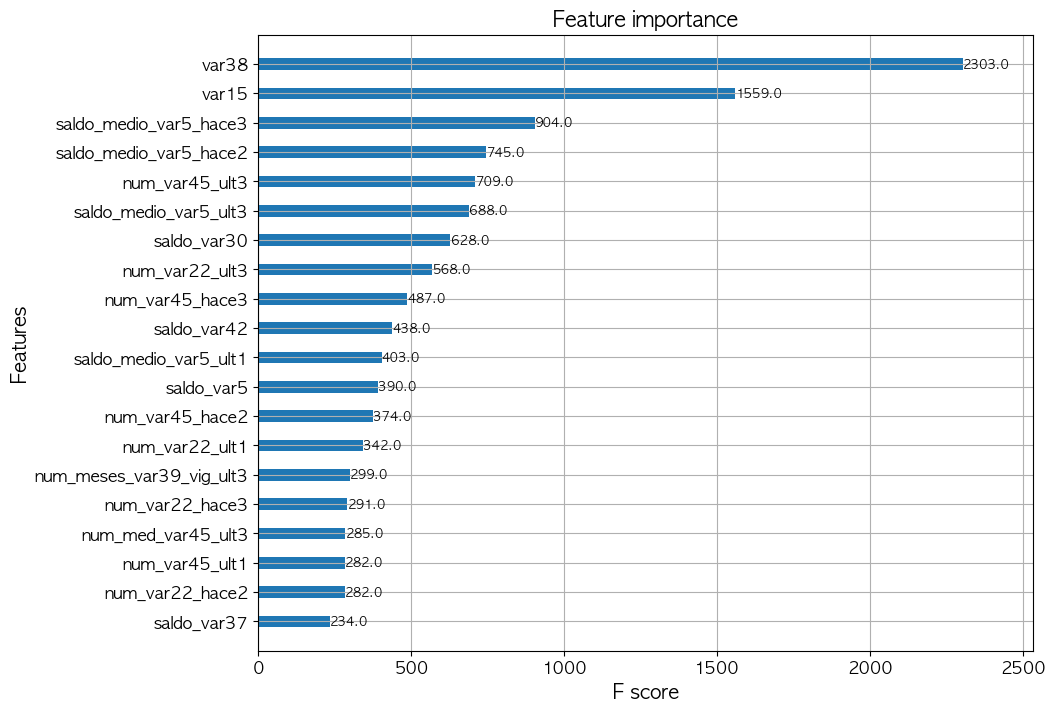

In [182]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)


## LightGBM 모델을 이용한 학습 과 하이퍼 파라미터 튜닝

In [183]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]

lgbm_clf.fit(X_train, y_train, callbacks=[lgb.early_stopping(stopping_rounds=100),], eval_metric="auc", eval_set=evals,)



lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Info] Number of positive: 2374, number of negative: 58442
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14308
[LightGBM] [Info] Number of data points in the train set: 60816, number of used features: 251
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039036 -> initscore=-3.203459
[LightGBM] [Info] Start training from score -3.203459
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[15]	valid_0's auc: 0.840928	valid_0's binary_logloss: 0.14161
ROC AUC: 0.8409


## 하이퍼 파라미터 튜닝

In [184]:
%%time
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}

# cv는 3으로 지정 
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)

gridcv.fit(X_train, y_train, callbacks=[lgb.early_stopping(stopping_rounds=30),], eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))


[LightGBM] [Info] Number of positive: 1583, number of negative: 38961
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12926
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 203
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039044 -> initscore=-3.203239
[LightGBM] [Info] Start training from score -3.203239
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.847144	valid_0's binary_logloss: 0.13794	valid_1's auc: 0.837965	valid_1's binary_logloss: 0.147853
[LightGBM] [Info] Number of positive: 1583, number of negative: 38961
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027741 seconds.
You can set `force_row_wise=true` to remove the ov

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039044 -> initscore=-3.203239
[LightGBM] [Info] Start training from score -3.203239
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.867693	valid_0's binary_logloss: 0.131066	valid_1's auc: 0.837266	valid_1's binary_logloss: 0.143895
[LightGBM] [Info] Number of positive: 1582, number of negative: 38962
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12948
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 202
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039019 -> initscore=-3.203897
[LightGBM] [Info] Start training from score -3.203897
Training until validation scores don't improve for 30 rounds
Early stopping, best iterat

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039044 -> initscore=-3.203239
[LightGBM] [Info] Start training from score -3.203239
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.862964	valid_0's binary_logloss: 0.132331	valid_1's auc: 0.835026	valid_1's binary_logloss: 0.144789
[LightGBM] [Info] Number of positive: 1583, number of negative: 38961
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12947
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039044 -> initscore=-3.203239
[LightGBM] [Info] Start training from score -3.203239
Training until validation scores don't improve for 30 rounds
Early stopping, best iterat

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039019 -> initscore=-3.203897
[LightGBM] [Info] Start training from score -3.203897
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.885234	valid_0's binary_logloss: 0.120268	valid_1's auc: 0.836722	valid_1's binary_logloss: 0.140403
[LightGBM] [Info] Number of positive: 1583, number of negative: 38961
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12926
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 203
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039044 -> initscore=-3.203239
[LightGBM] [Info] Start training from score -3.203239
Training until validation scores don't improve for 30 rounds
Early stopping, best iterat

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039044 -> initscore=-3.203239
[LightGBM] [Info] Start training from score -3.203239
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[14]	valid_0's auc: 0.870957	valid_0's binary_logloss: 0.128226	valid_1's auc: 0.838226	valid_1's binary_logloss: 0.141392
[LightGBM] [Info] Number of positive: 1582, number of negative: 38962
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12853
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039019 -> initscore=-3.203897
[LightGBM] [Info] Start training from score -3.203897
Training until validation scores don't improve for 30 rounds
Early stopping, best iterat

In [185]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]

lgbm_clf.fit(X_train, y_train, callbacks=[lgb.early_stopping(stopping_rounds=30),], eval_metric="auc", eval_set=evals)


lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))


[LightGBM] [Warning] Unknown parameter: sumbsample
[LightGBM] [Warning] Unknown parameter: sumbsample
[LightGBM] [Info] Number of positive: 2374, number of negative: 58442
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13851
[LightGBM] [Info] Number of data points in the train set: 60816, number of used features: 202
[LightGBM] [Warning] Unknown parameter: sumbsample
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039036 -> initscore=-3.203459
[LightGBM] [Info] Start training from score -3.203459
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.841659	valid_0's binary_logloss: 0.14327
[LightGBM] [Warning] Unknown parameter: sumbsample
ROC AUC: 0.8417


# 신용카드 거래 이상 탐지

## 데이터 가져오기

In [186]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('./data/creditcard.csv')
card_df.head(3)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  

[3 rows x 31 columns]

## 데이터 분할

In [187]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사 한 뒤 Time 컬럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)


학습 데이터 레이블 값 비율
Class
0    99.827451
1     0.172549
Name: count, dtype: float64
테스트 데이터 레이블 값 비율
Class
0    99.826785
1     0.173215
Name: count, dtype: float64


## 평가 지표 함수

In [188]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


## 모델 훈련 및 평가 지표 확인

### Logistic 회귀

In [189]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)


오차 행렬
[[85282    13]
 [   56    92]]
정확도: 0.9992, 정밀도: 0.8762, 재현율: 0.6216,    F1: 0.7273, AUC:0.9558


### Light GBM

In [190]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [191]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)

get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

## 데이터 변환 후 학습

<Axes: xlabel='Amount', ylabel='Density'>

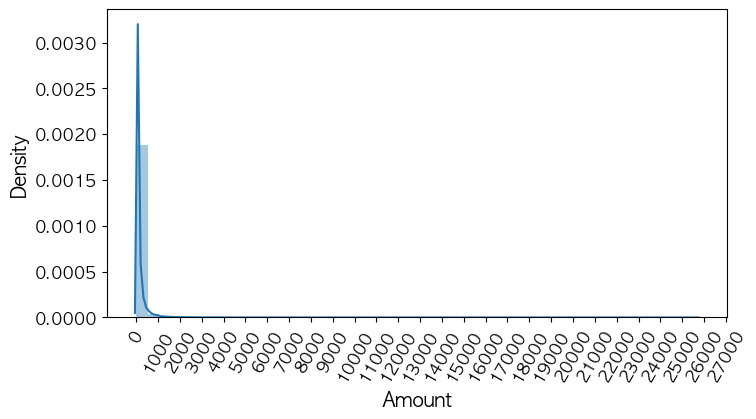

In [192]:
#Amount 피처의 분포 확인
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

In [193]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용하여 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 컬럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy


In [194]:
# Amount를 정규분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행. 
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   55    93]]
정확도: 0.9992, 정밀도: 0.8692, 재현율: 0.6284,    F1: 0.7294, AUC:0.9706
### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
오차 행렬
[[85290     5]
 [  

In [195]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # 넘파이의 log1p( )를 이용하여 Amount를 로그 변환 
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85282    13]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8725, 재현율: 0.6014,    F1: 0.7120, AUC:0.9734
### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

<Axes: >

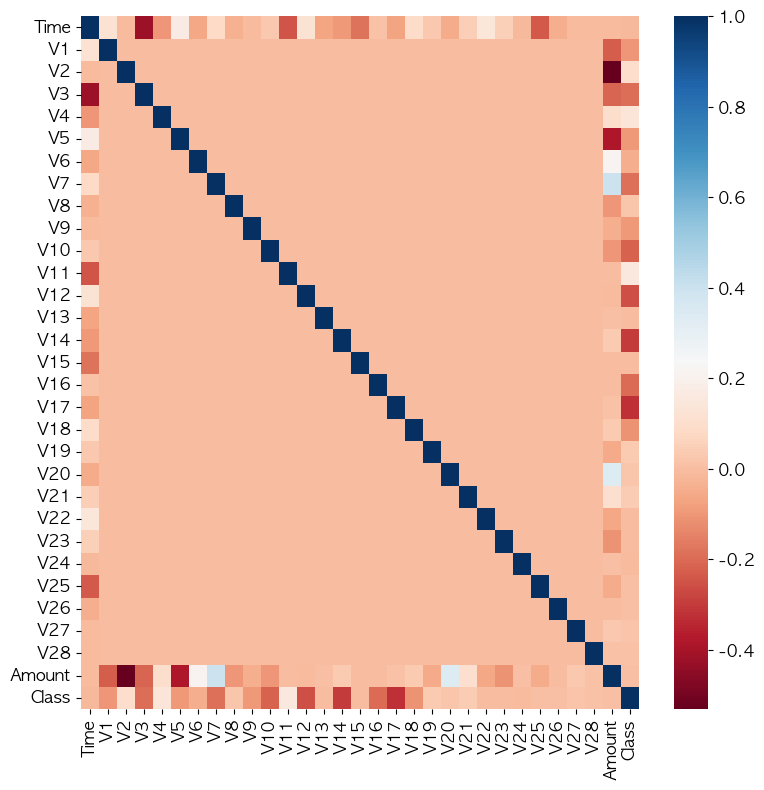

In [196]:
#상관 관계가 가장 높은 feature 찾기
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [197]:
print(corr['Class'])

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64


In [198]:
#이상치를 조회하는 함수
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index


In [199]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Index([8296, 8615, 9035, 9252], dtype='int64')


In [200]:
#이상치를 제거하고 로지스틱 회귀 다시 수행

#get_processed_df( )를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85280    15]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8673, 재현율: 0.6712,    F1: 0.7568, AUC:0.9725
### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 342, number of negative: 199020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199362, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
오차 행렬
[[85290     5]
 [   25   121]]
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288,    F1: 0.8897, AUC:0.9780


## 오버 샘플링

Note: you may need to restart the kernel to use updated packages.


In [202]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)

X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())


SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 Class
0    199020
1    199020
Name: count, dtype: int64


## 오버 샘플링 후 로지스틱 회귀

In [203]:
lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[82933  2362]
 [   11   135]]
정확도: 0.9722, 정밀도: 0.0541, 재현율: 0.9247,    F1: 0.1022, AUC:0.9736


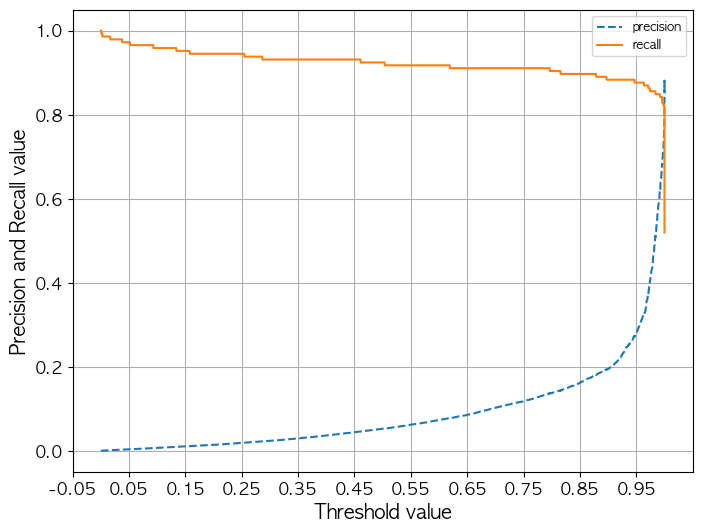

In [204]:
#정밀도 와 재현율 출력
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

## LightGBM 적용

In [205]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)


[LightGBM] [Info] Number of positive: 199020, number of negative: 199020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 398040, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

# 회귀 - 주택 가격 예측

## 데이터 가져오기

In [206]:
import pandas as pd
house_df_org = pd.read_csv('./data/house/train.csv')
house_df = house_df_org.copy()
house_df.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  

[3 rows x 81 columns]

## 데이터 전처리

### 데이터 확인

In [207]:
print('데이터 세트의 Shape:', house_df.shape)
print('\n전체 feature 들의 type \n',house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))

데이터 세트의 Shape: (1460, 81)

전체 feature 들의 type 
 object     43
int64      35
float64     3
Name: count, dtype: int64

Null 컬럼과 그 건수:
  PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


### 타겟 확인 및 변환

In [208]:
%matplotlib inline

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import platform
from matplotlib import font_manager, rc

#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings(action='ignore')

<Axes: title={'center': 'Original Sale Price Histogram'}, xlabel='SalePrice', ylabel='Density'>

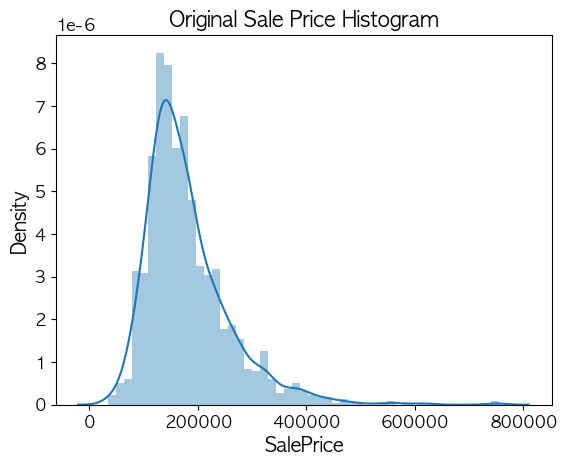

In [209]:
plt.title('Original Sale Price Histogram')
sns.distplot(house_df['SalePrice'])

<Axes: title={'center': 'Log Transformed Sale Price Histogram'}, xlabel='SalePrice', ylabel='Density'>

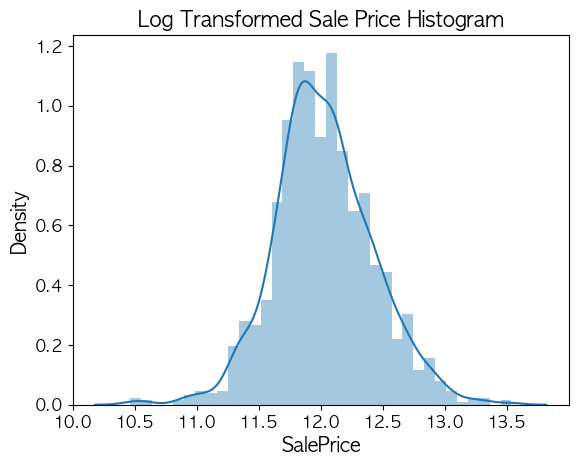

In [210]:
import numpy as np

plt.title('Log Transformed Sale Price Histogram')
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.distplot(log_SalePrice)

### 로그 변환 및 결측값 처리

In [211]:
# SalePrice 로그 변환
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

# Null 이 너무 많은 컬럼들과 불필요한 컬럼 삭제
house_df.drop(['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], axis=1 , inplace=True)
# Drop 하지 않는 숫자형 Null컬럼들은 평균값으로 대체
house_df.fillna(house_df[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].mean(),inplace=True)

# Null 값이 있는 피처명과 타입을 추출
null_column_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df.dtypes[null_column_count.index])

## Null 피처의 Type :
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


### 문자 피쳐 원 핫 인코딩

In [212]:
print('get_dummies() 수행 전 데이터 Shape:', house_df.shape)
house_df_ohe = pd.get_dummies(house_df)
print('get_dummies() 수행 후 데이터 Shape:', house_df_ohe.shape)

null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df_ohe.dtypes[null_column_count.index])

get_dummies() 수행 전 데이터 Shape: (1460, 75)
get_dummies() 수행 후 데이터 Shape: (1460, 270)
## Null 피처의 Type :
 Series([], dtype: object)


## 선형 회귀 적용

### 평가 지표 함수

In [213]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

### 모델 생성 및 훈련 과 평가

In [214]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)


LinearRegression 로그 변환된 RMSE: 0.132
Ridge 로그 변환된 RMSE: 0.127
Lasso 로그 변환된 RMSE: 0.176


[0.13183184688249705, 0.12740582836266132, 0.1762825055647141]

### 회귀 계수 확인

In [215]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

In [216]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 행을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(12,22),nrows=3, ncols=1)
    #fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(10)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

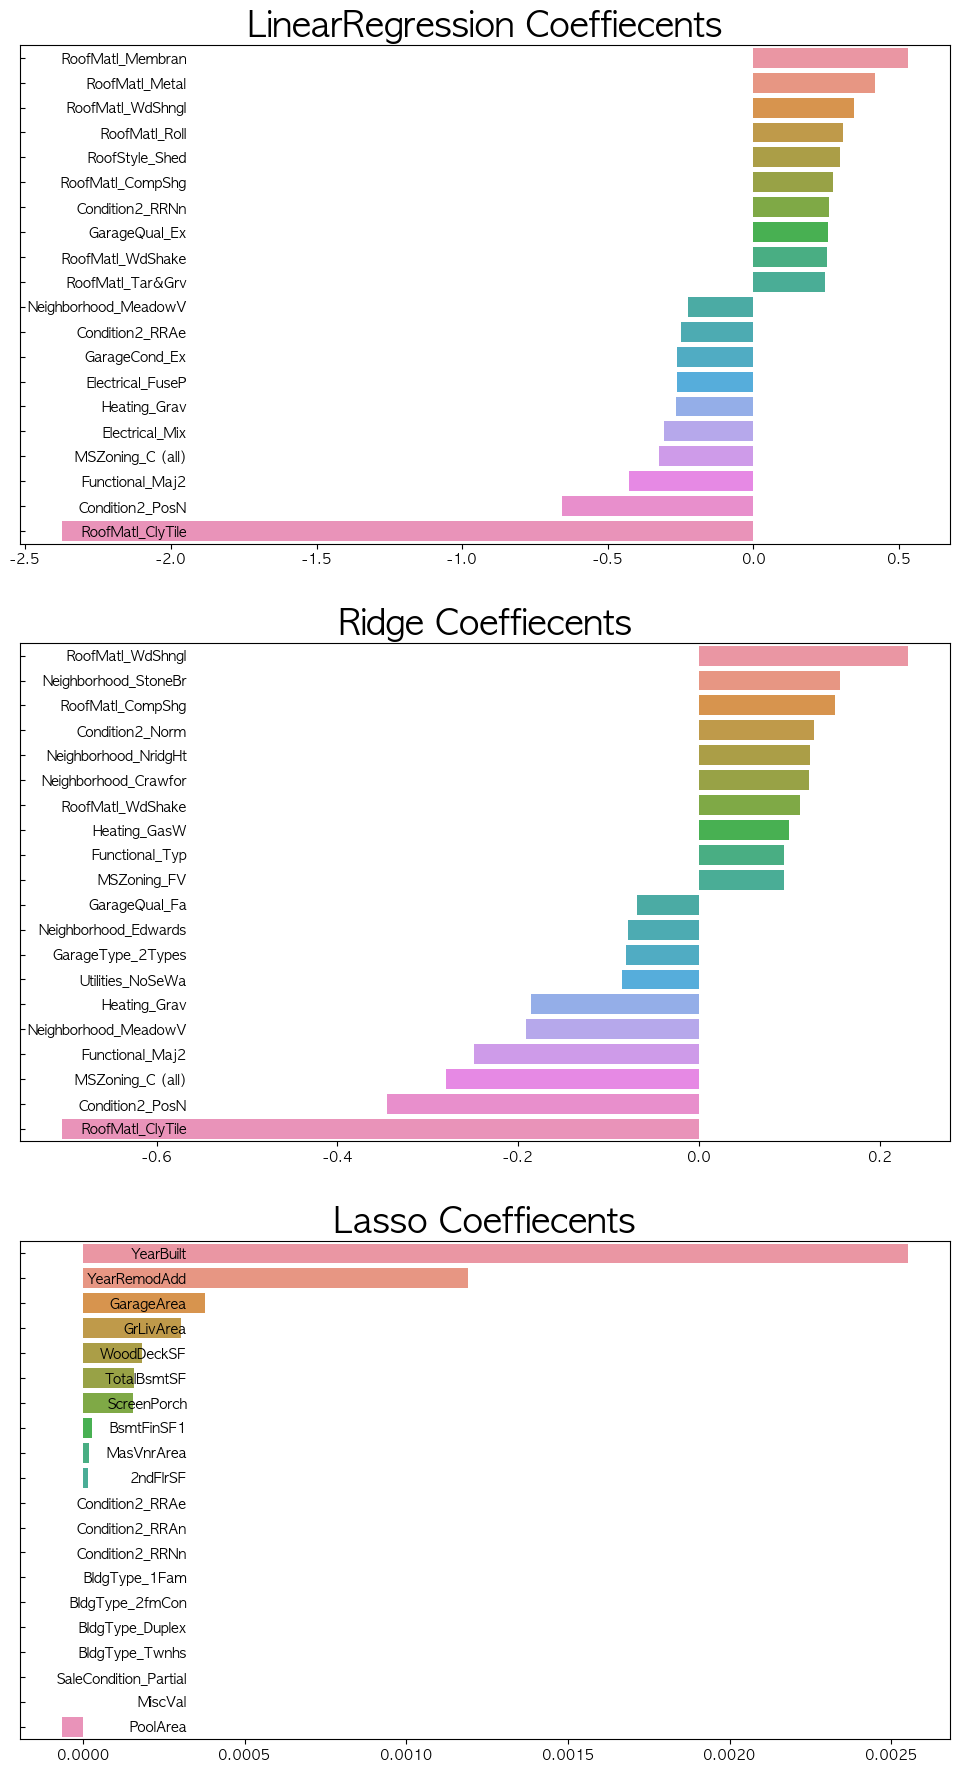

In [217]:
# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.    
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

### 교차 검증

In [218]:
%%time

from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력           
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.135 0.165 0.167 0.111 0.198]
LinearRegression CV 평균 RMSE 값: 0.155

Ridge CV RMSE 값 리스트: [0.117 0.154 0.142 0.117 0.189]
Ridge CV 평균 RMSE 값: 0.144

Lasso CV RMSE 값 리스트: [0.161 0.204 0.177 0.181 0.265]
Lasso CV 평균 RMSE 값: 0.198
CPU times: user 3.71 s, sys: 95.3 ms, total: 3.81 s
Wall time: 414 ms


In [219]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1418, 최적 alpha:{'alpha': 12}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.142, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.132
Ridge 로그 변환된 RMSE: 0.124
Lasso 로그 변환된 RMSE: 0.12


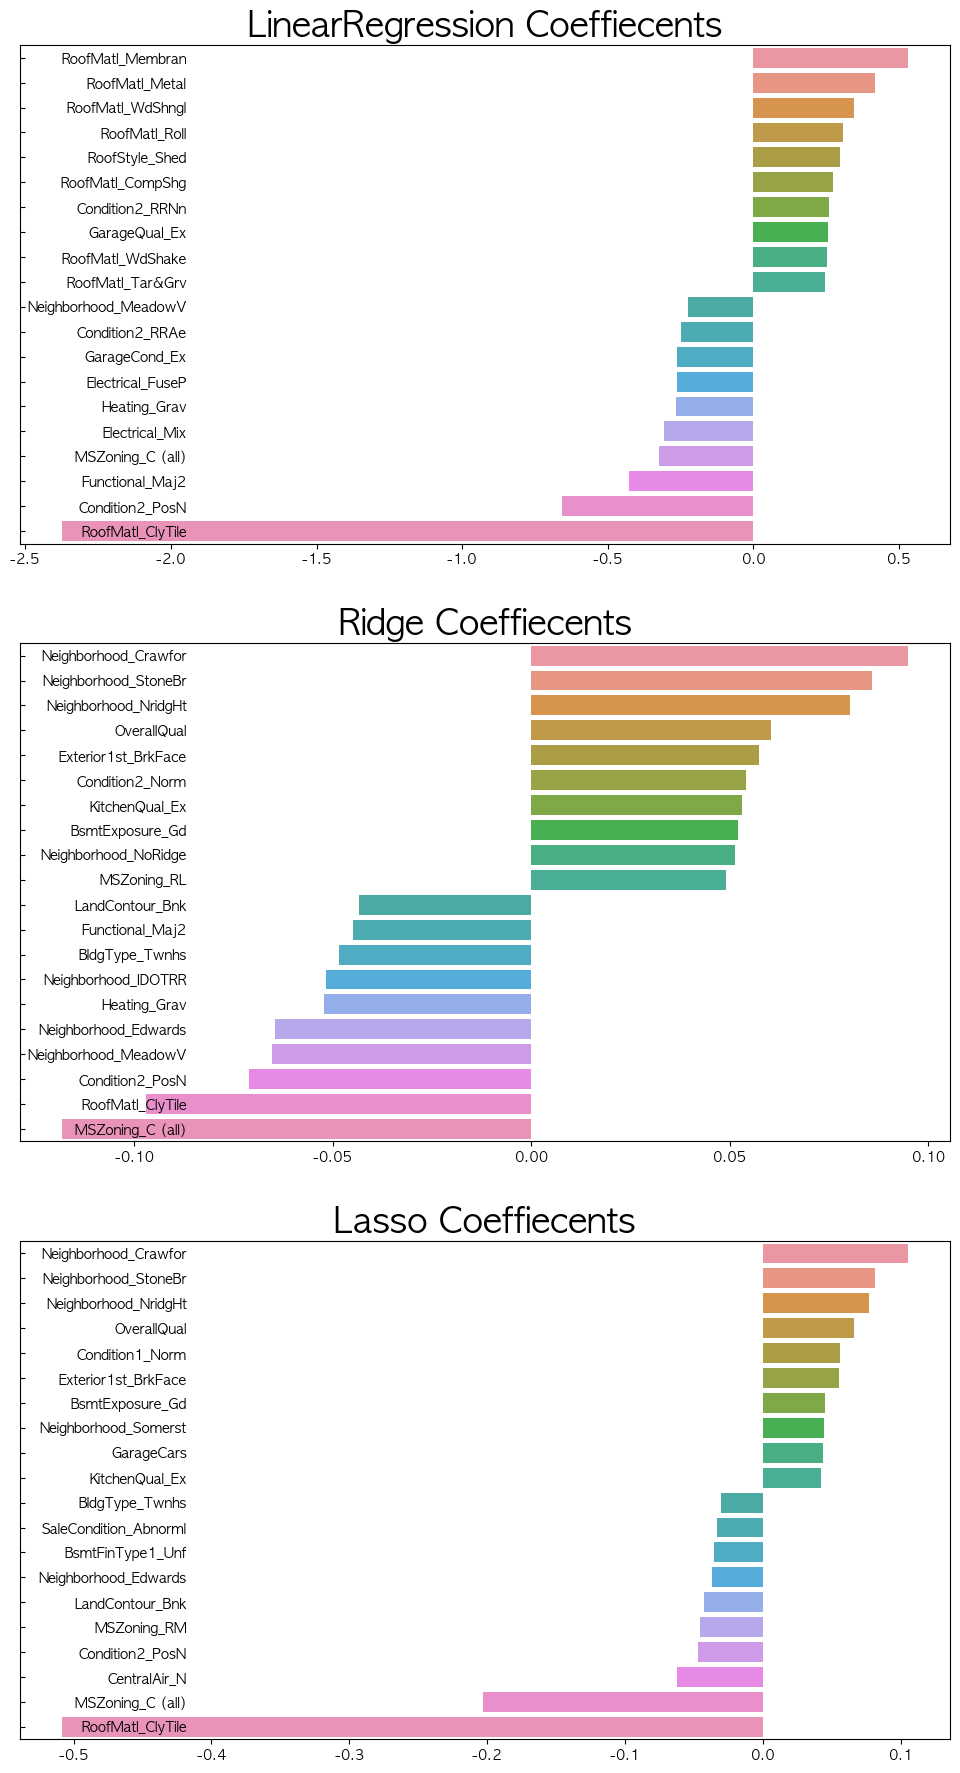

In [220]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

## 성능 개선

### 데이터 분포 확인

In [221]:
from scipy.stats import skew

# object가 아닌 숫자형 피쳐의 컬럼 index 객체 추출.
features_index = house_df.dtypes[house_df.dtypes != 'object'].index
# house_df에 컬럼 index를 [ ]로 입력하면 해당하는 컬럼 데이터 셋 반환. apply lambda로 skew( )호출 
skew_features = house_df[features_index].apply(lambda x : skew(x))
# skew 정도가 1 이상인 컬럼들만 추출. 
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


### 로그 변환

In [222]:
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

### 로그 변환 후 모델 훈련

In [223]:
# Skew가 높은 피처들을 로그 변환 했으므로 다시 원-핫 인코딩 적용 및 피처/타겟 데이터 셋 생성,
house_df_ohe = pd.get_dummies(house_df)
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# 피처들을 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1275, 최적 alpha:{'alpha': 10}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1252, 최적 alpha:{'alpha': 0.001}


### 시각화

LinearRegression 로그 변환된 RMSE: 0.128
Ridge 로그 변환된 RMSE: 0.122
Lasso 로그 변환된 RMSE: 0.119


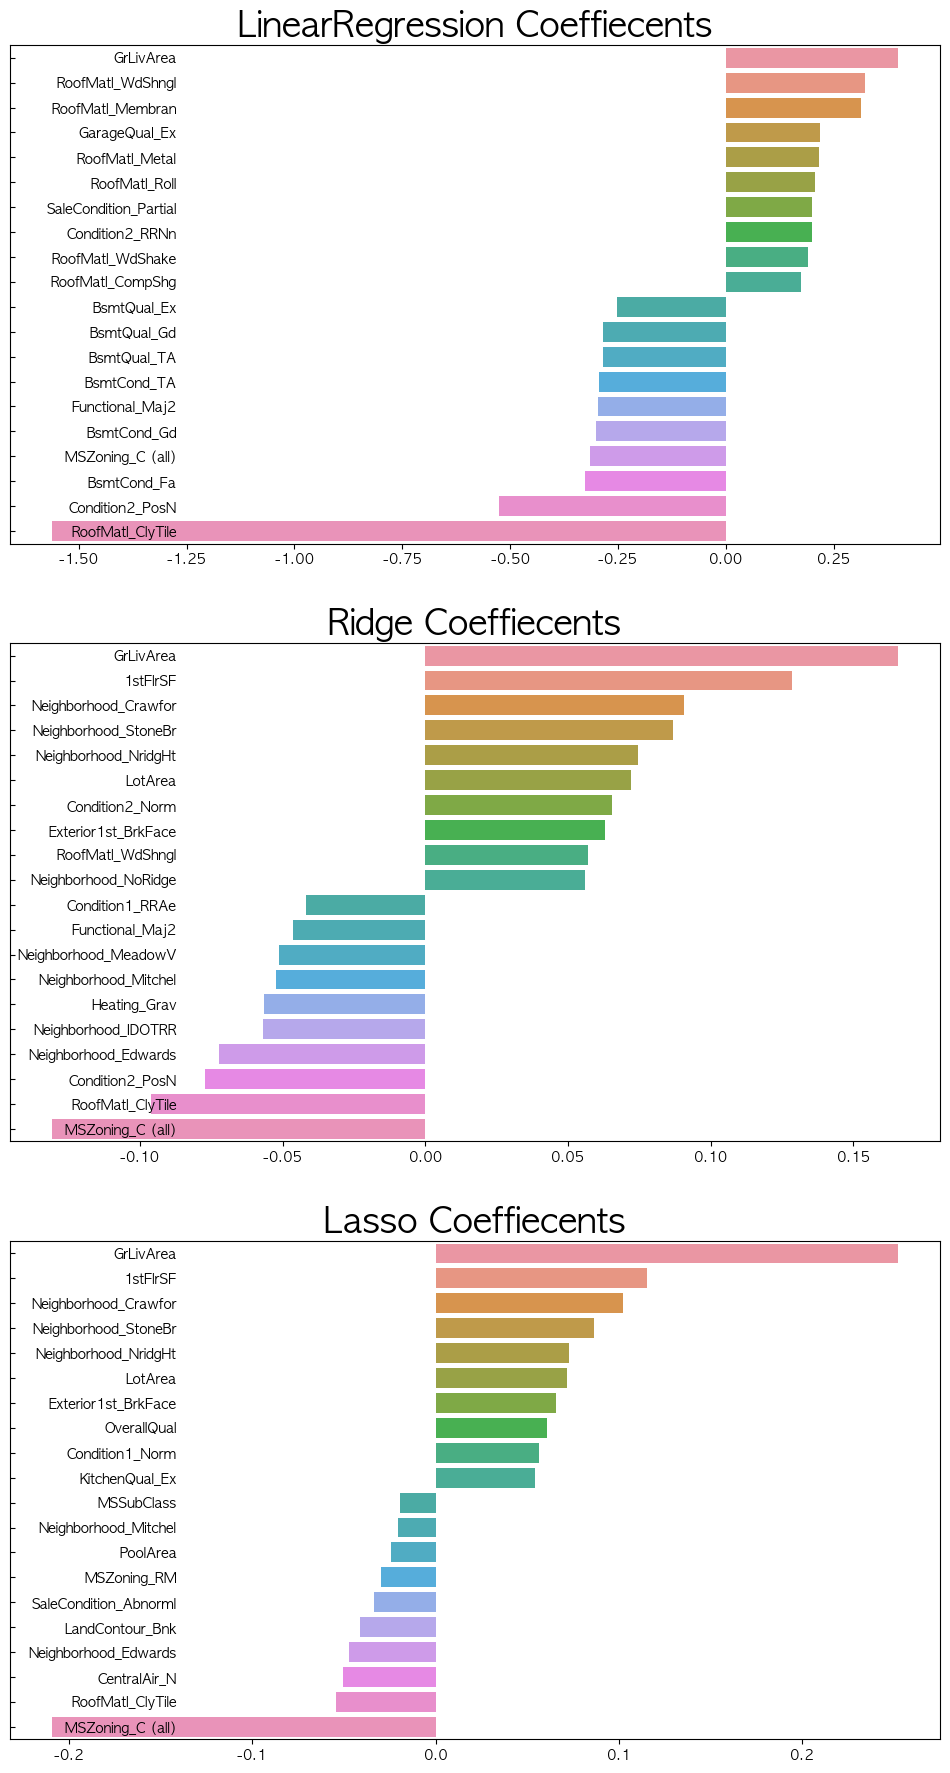

In [224]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

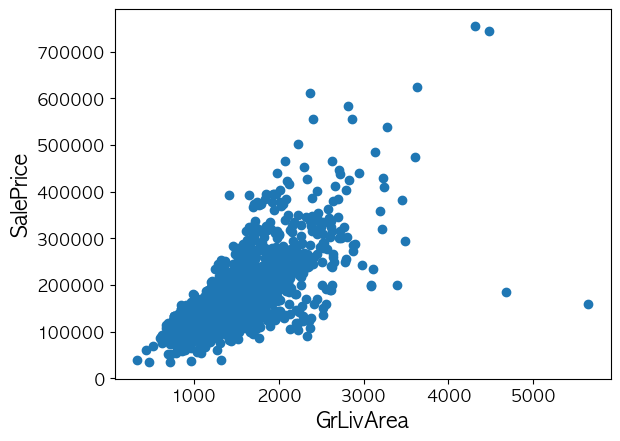

In [225]:
plt.scatter(x = house_df_org['GrLivArea'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

### 이상치 제거

In [226]:
# GrLivArea와 SalePrice 모두 로그 변환되었으므로 이를 반영한 조건 생성. 
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index

print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 house_df_ohe shape:', house_df_ohe.shape)
# DataFrame의 index를 이용하여 아웃라이어 레코드 삭제. 
house_df_ohe.drop(outlier_index , axis=0, inplace=True)
print('아웃라이어 삭제 후 house_df_ohe shape:', house_df_ohe.shape)

아웃라이어 레코드 index : [ 523 1298]
아웃라이어 삭제 전 house_df_ohe shape: (1460, 270)
아웃라이어 삭제 후 house_df_ohe shape: (1458, 270)


In [227]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1125, 최적 alpha:{'alpha': 8}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1122, 최적 alpha:{'alpha': 0.001}


### 회귀 계수 시각화

LinearRegression 로그 변환된 RMSE: 0.129
Ridge 로그 변환된 RMSE: 0.103
Lasso 로그 변환된 RMSE: 0.1


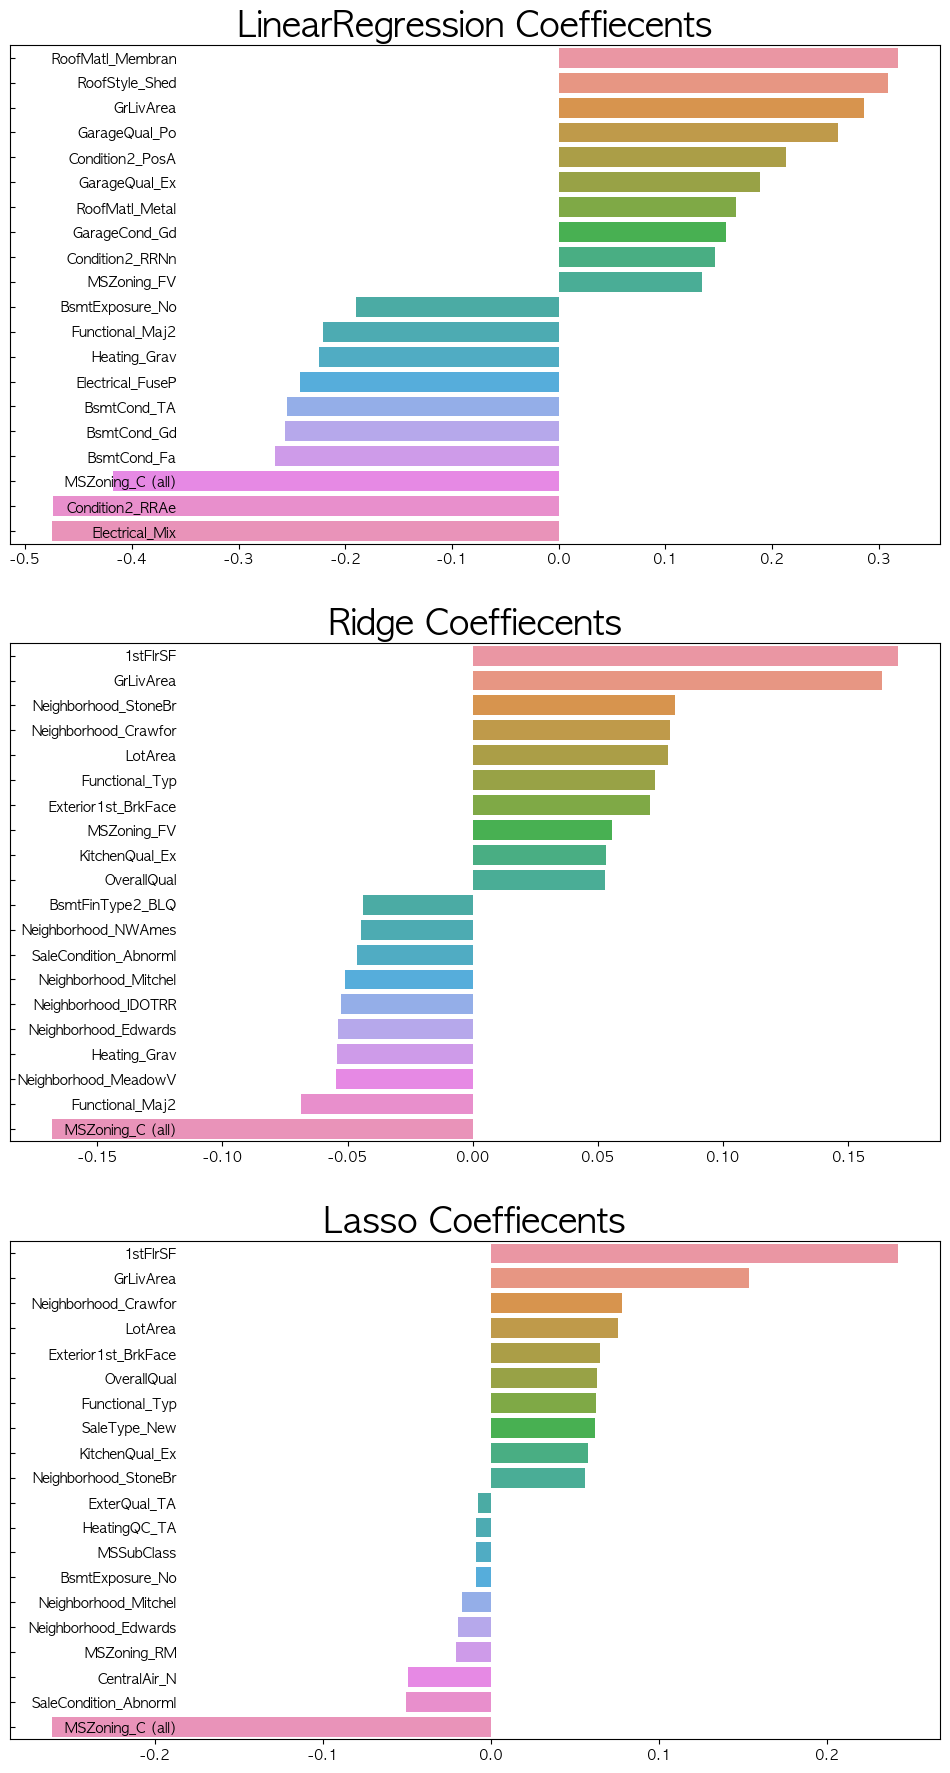

In [228]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

### XGB 모델을 이용한 학습

In [229]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = print_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.1206, 최적 alpha:{'n_estimators': 1000}


### LGBM 모델을 이용한 학습

In [230]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = print_best_params(lgbm_reg, lgbm_params)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000838 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3155
[LightGBM] [Info] Number of data points in the train set: 1166, number of used features: 171
[LightGBM] [Info] Start training from score 12.021352
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3167
[LightGBM] [Info] Number of data points in the train set: 1166, number of used features: 168
[LightGBM] [Info] Start training from score 12.023516
[LightGBM] [Warning] Found

### 피처 중요도 시각화

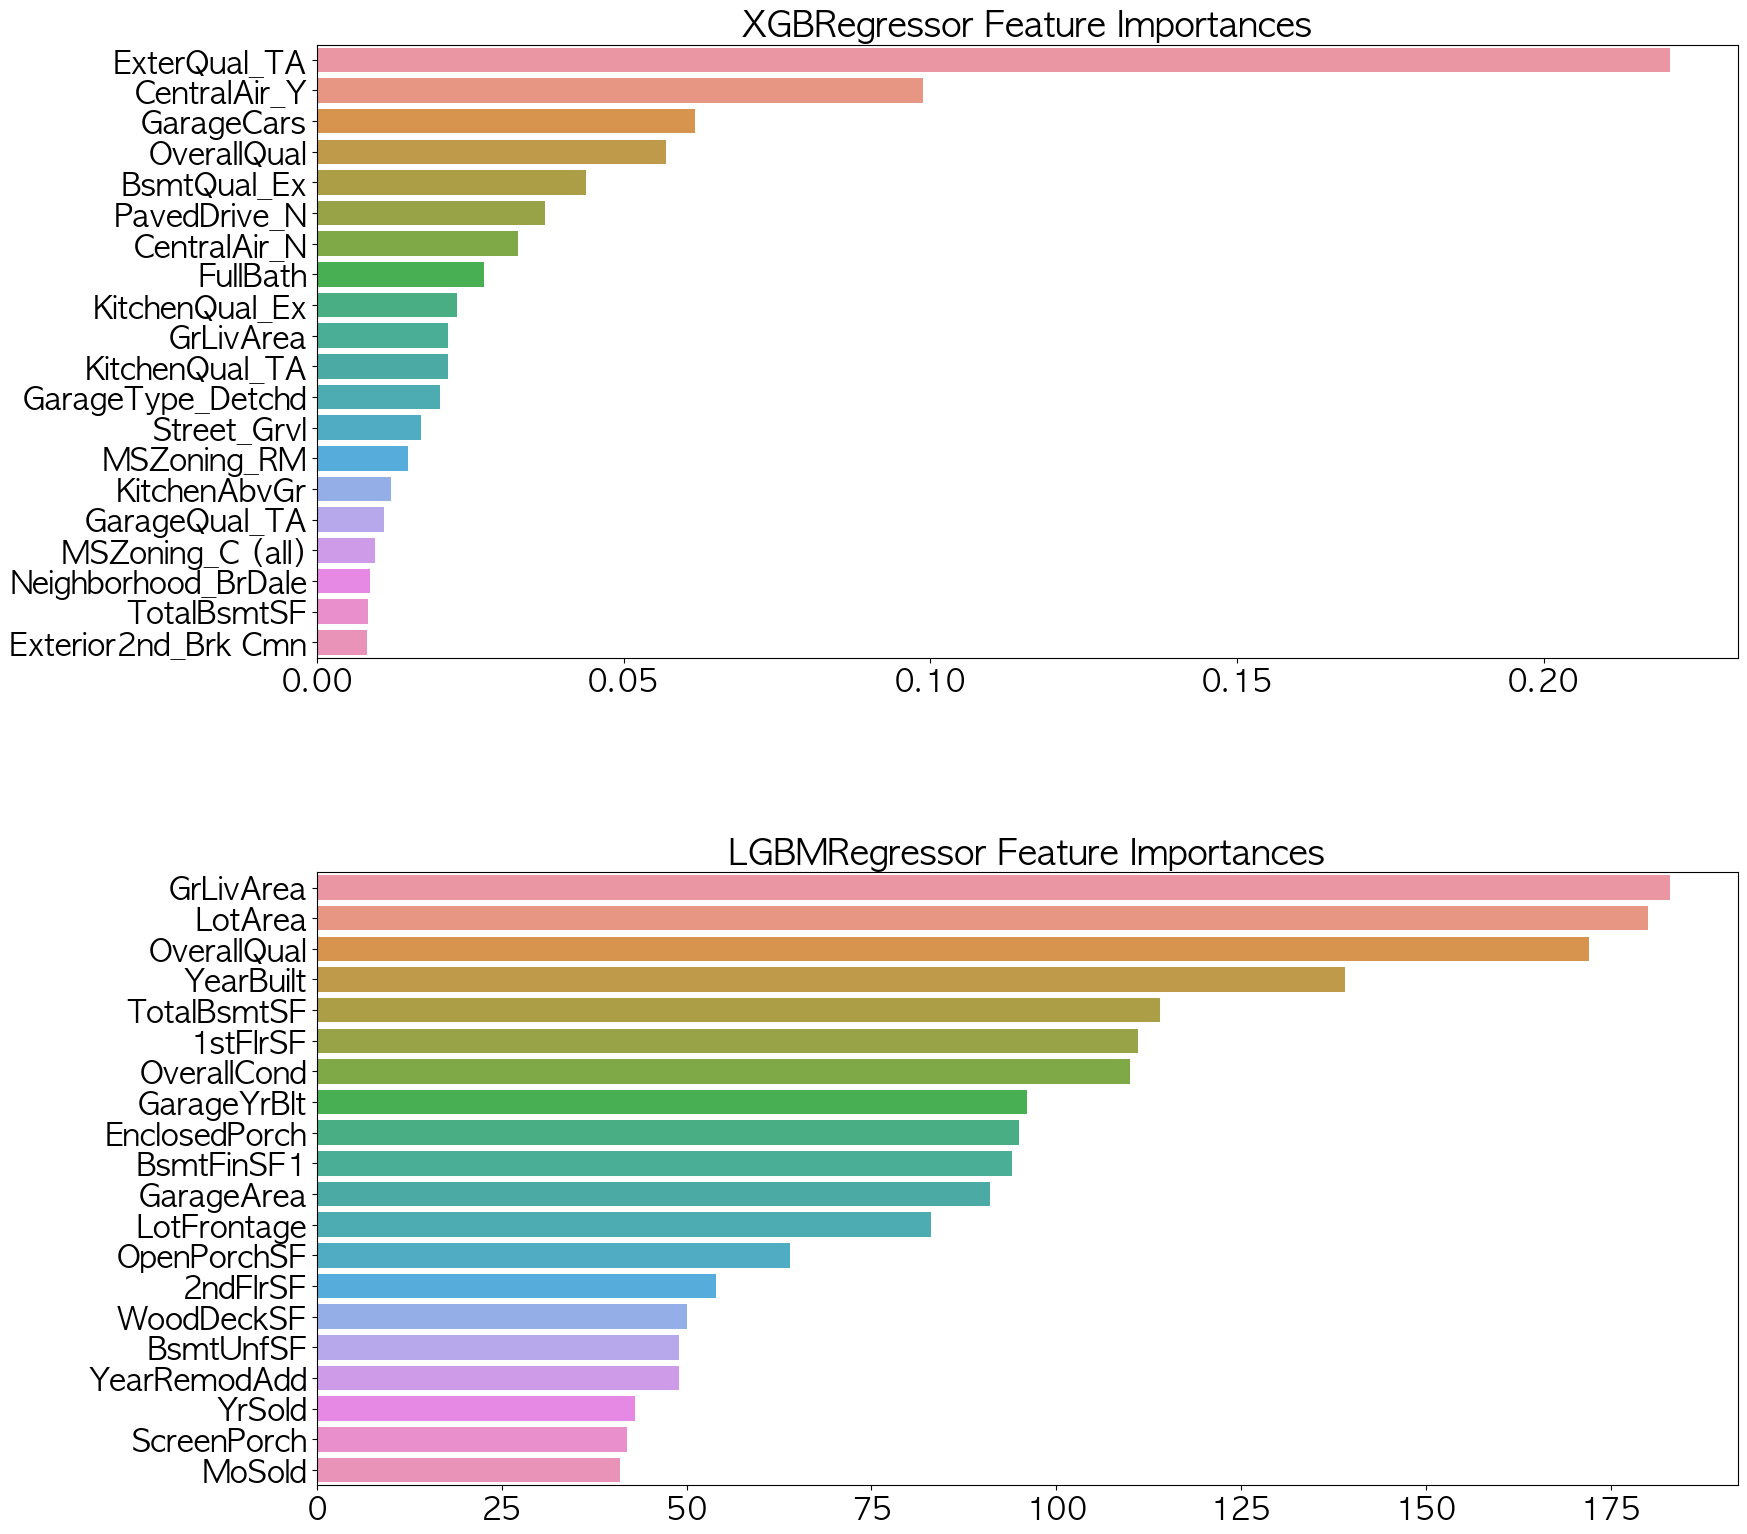

In [231]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_features.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(15,15),nrows=2, ncols=1)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        plt.subplots_adjust(hspace=0.35)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

        # 앞 예제에서 print_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화    
models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)

### 라쏘 와 릿지 모델 혼한

In [232]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

# 개별 모델의 학습
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}
#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.1000607551761522
Ridge 모델의 RMSE: 0.10340697165289371
Lasso 모델의 RMSE: 0.10024171179335356


### XGB 와 LGBM 혼합

In [233]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}
        
get_rmse_pred(preds)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3174
[LightGBM] [Info] Number of data points in the train set: 1166, number of used features: 172
[LightGBM] [Info] Start training from score 12.025343
최종 혼합 모델의 RMSE: 0.10182829899113385
XGBM 모델의 RMSE: 0.10757317945441452
LGBM 모델의 RMSE: 0.10363891833477148


### 스태킹 앙상블을 이용한 회귀

In [234]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=0)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean


# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환. 
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환. 
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)  
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
LGBMRegressor  model 시작 
	 폴드 세트:  0  시작 
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2958
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 161
[LightGBM] [Info] Start training from score 12.021282
	 폴드 세트:  1  시작 
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

In [235]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.  
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, 
                                      xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, 
                                     xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용. 
meta_model_lasso = Lasso(alpha=0.0005)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test , final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.09741896781177492
